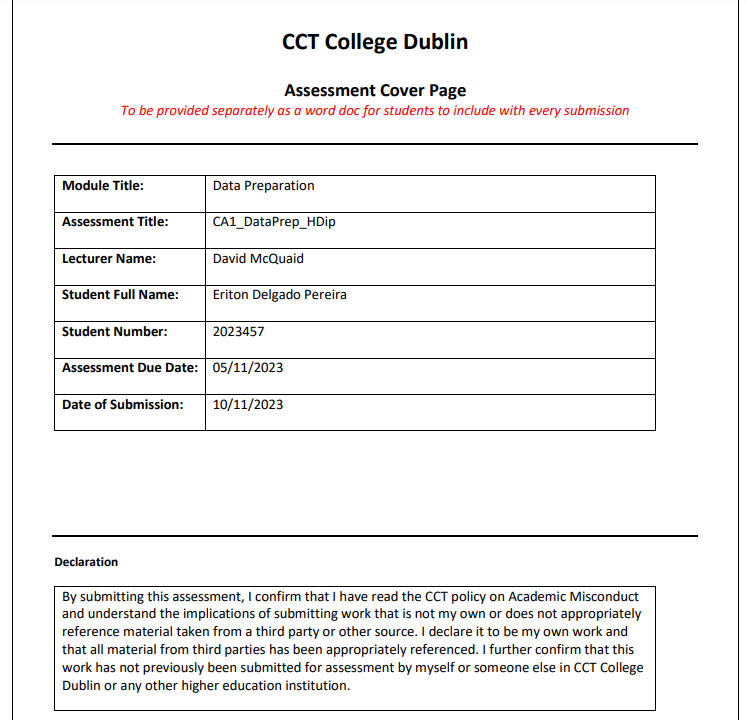

#### Step 1 - Importing all the necessary library and load the data set. ###
This is step is needed in order to run all the function to do the assingment, run all the data analysis function and execute the PCA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Load the aps_failure.csv file through the function "pd.read_csv"

In [2]:
df = pd.read_csv("aps_failure_set.csv")

df means dataframe and .csv means the type of dataset, which is "comma separated value", aps_failure_set.csv is the dataset provided and it will be used to do all teh data preparation aand EDA (Early Data Analysis Visualization) and perform the PCA.

### Step 2 Charactarization of the Dataset ###
- Display basic information about the dataset
- Display the head
- Display summary statistics
- Checking the shape
- Checking for missing values

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB
None


Information about the dataset to indentify the data types, columns, memory usage and entries.

In [4]:
df.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

Above I displayed the head of the data set, it first 5 rows and also we can see the header which has 171 columns.

In [5]:
print(df.describe())

             aa_000
count  6.000000e+04
mean   5.933650e+04
std    1.454301e+05
min    0.000000e+00
25%    8.340000e+02
50%    3.077600e+04
75%    4.866800e+04
max    2.746564e+06


Displaying summary statistics to analyze the data.

In [6]:
df.shape

(60000, 171)

Shape is to identify how many rows and columns are in the dataset.

In [7]:
print(df.isnull().sum())

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


This is to see the outline of missing values

### Step 3 - Data Preparation/Evaluation Methods and EDA Visualizations ###

Handle missing values (if any) This is to convert the Non Available to 0

In [13]:
import pandas as pd

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("aps_failure_set.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan 

This is important to indentify all the missing value formats and convert it to NAN.
Below I will use the command df.head to see if the dataset changed with NaN instead of all the missing value formats.

In [15]:
df.head()

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0     0.0     0.0     0.0  
1   97576.0  1500.0     0.0     0.0  
2   95128.0   514.0     0.0     0.0  
3       0.0     0.0     4.0    32.0  
4  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [16]:
df.fillna(0,inplace=True)

This is used to convert the NA to 0.

Running df.head() to see again inside the dataset after the converstion of NAN to 0.

In [17]:
df.head()

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     0.0  0.000000e+00     0.0     0.0     0.0     0.0     0.0   
2   neg   41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0     0.0     0.0     0.0  
1   97576.0  1500.0     0.0     0.0  
2   95128.0   514.0     0.0     0.0  
3       0.0     0.0     4.0    32.0  
4  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

This is part of EDA, I will execute code to show a histogram for each column and see the distribution

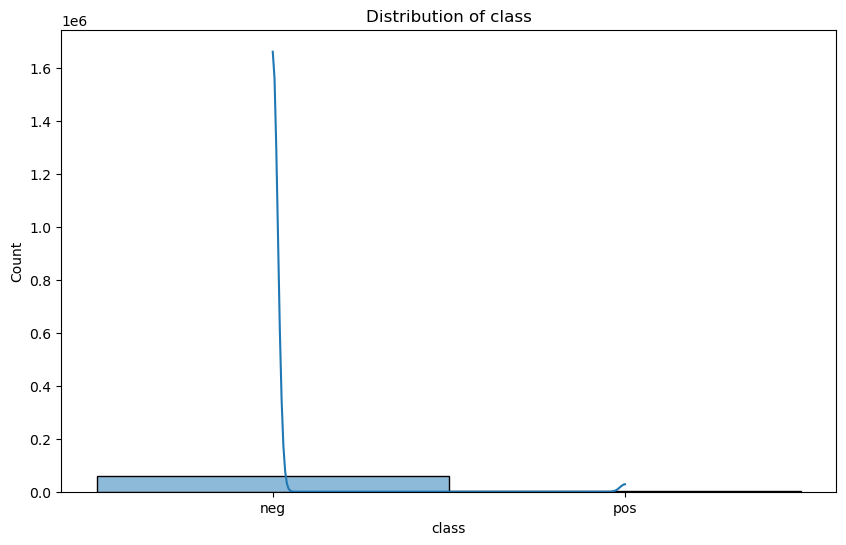

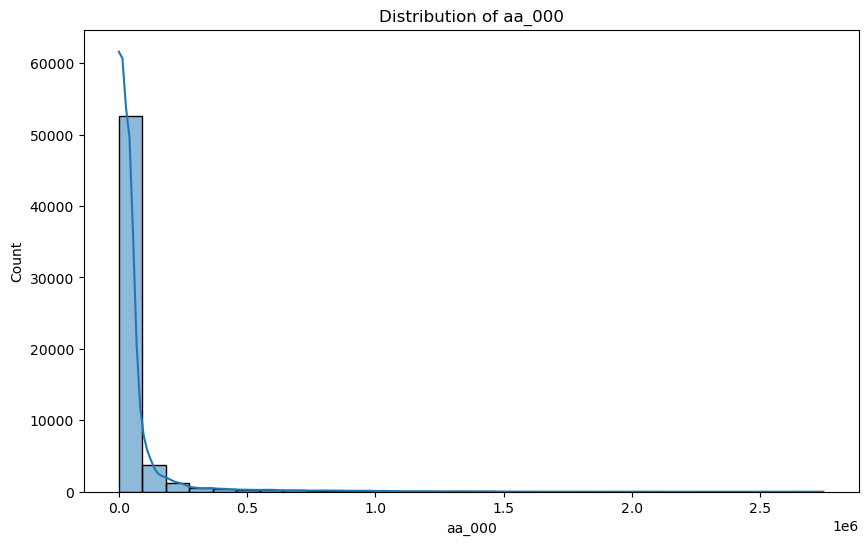

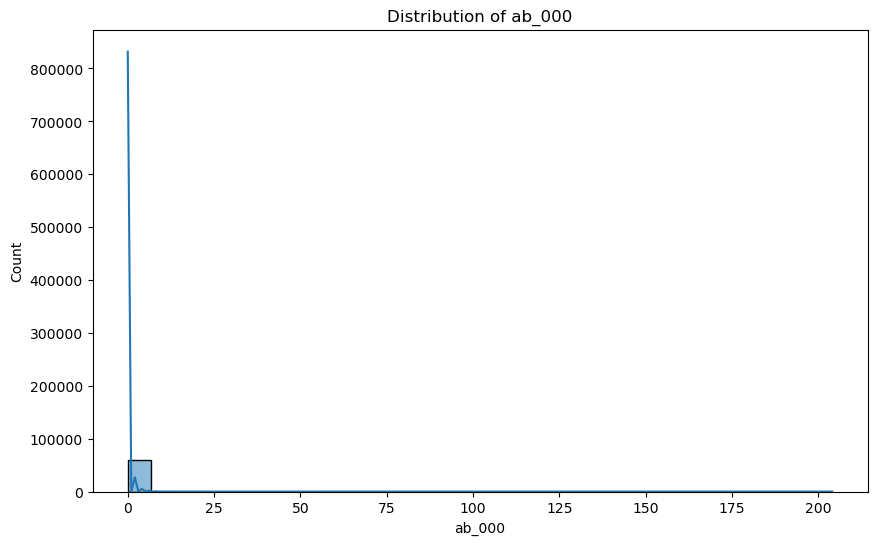

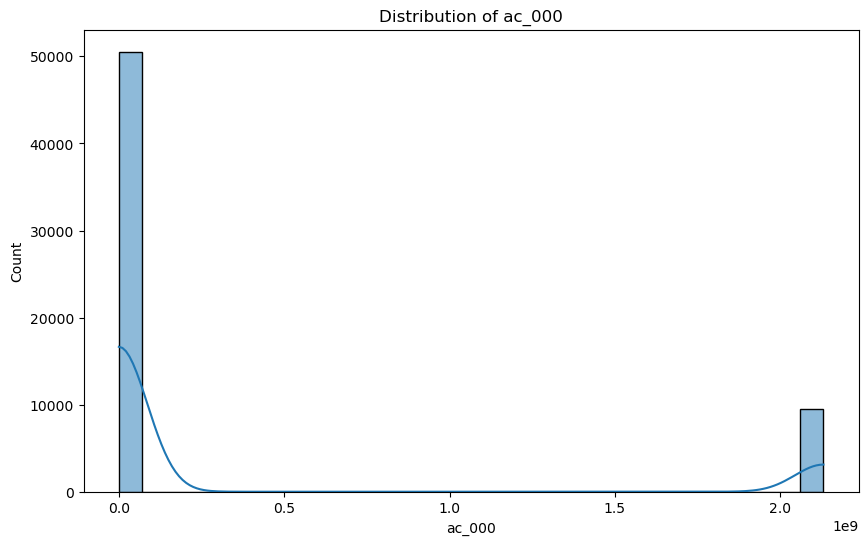

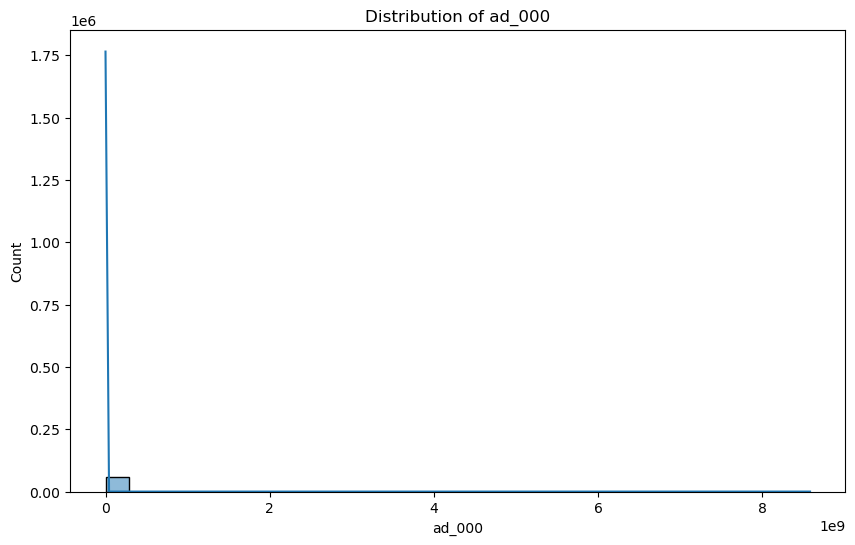

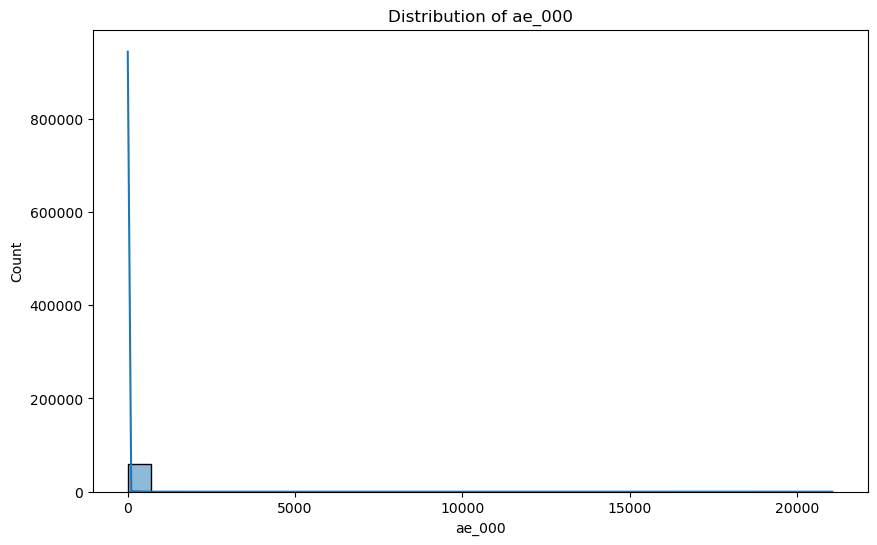

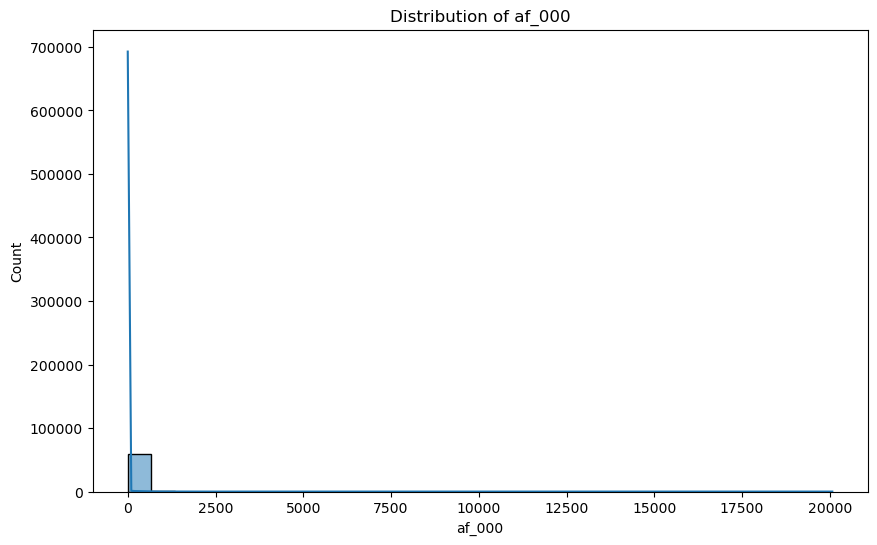

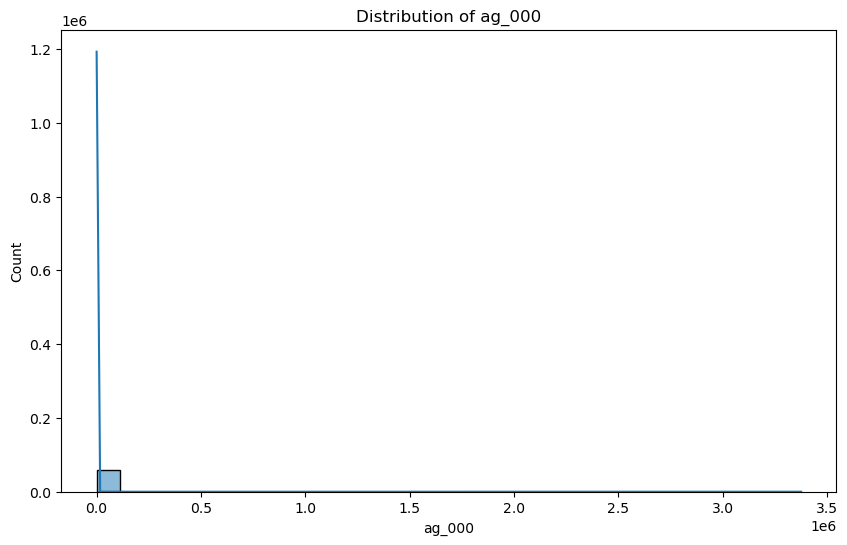

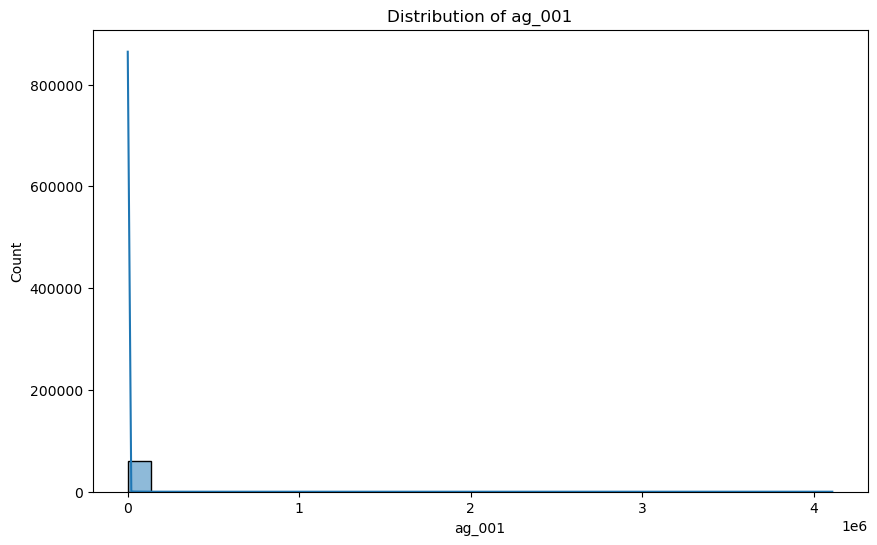

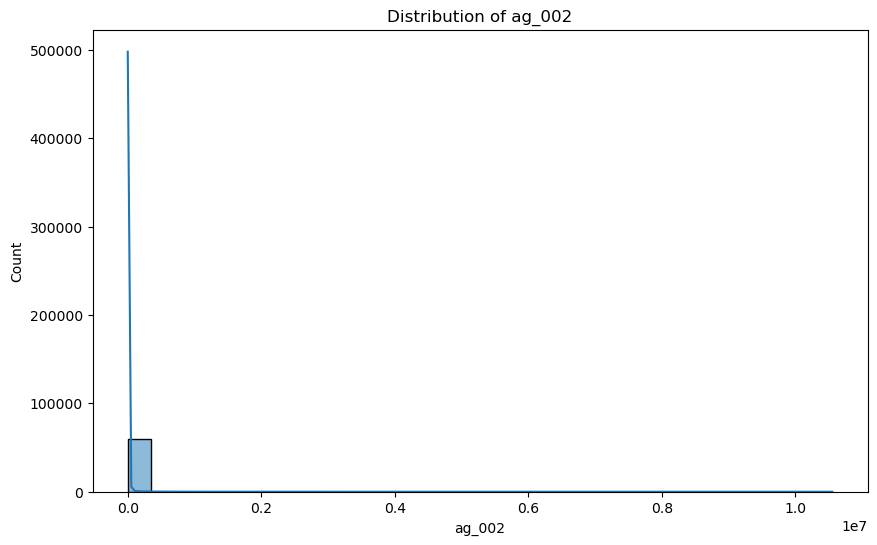

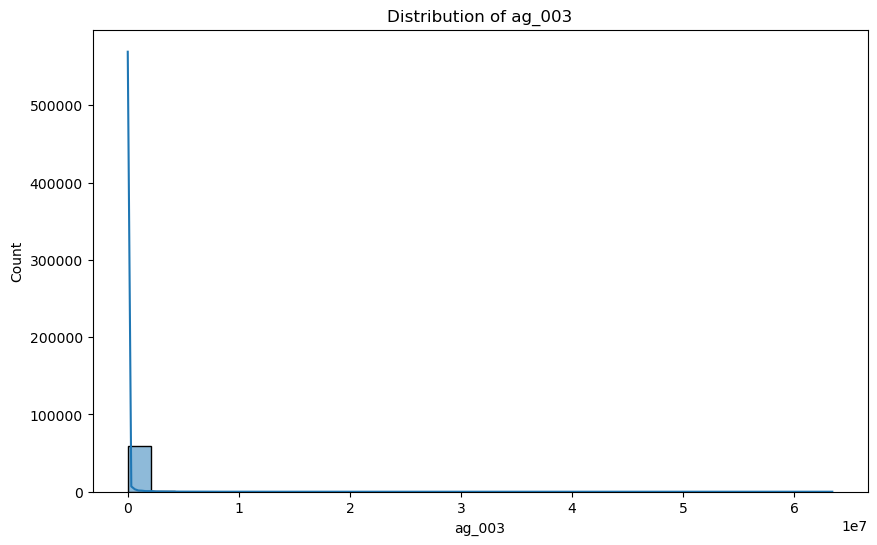

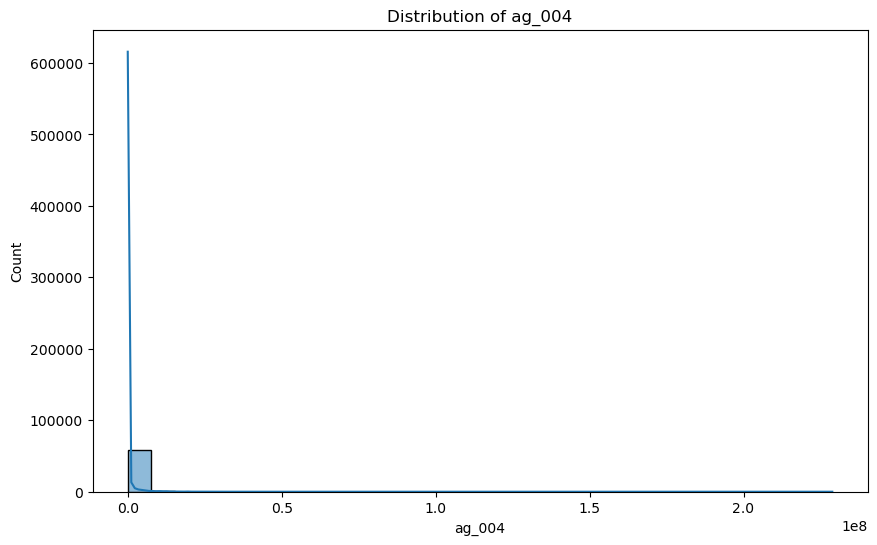

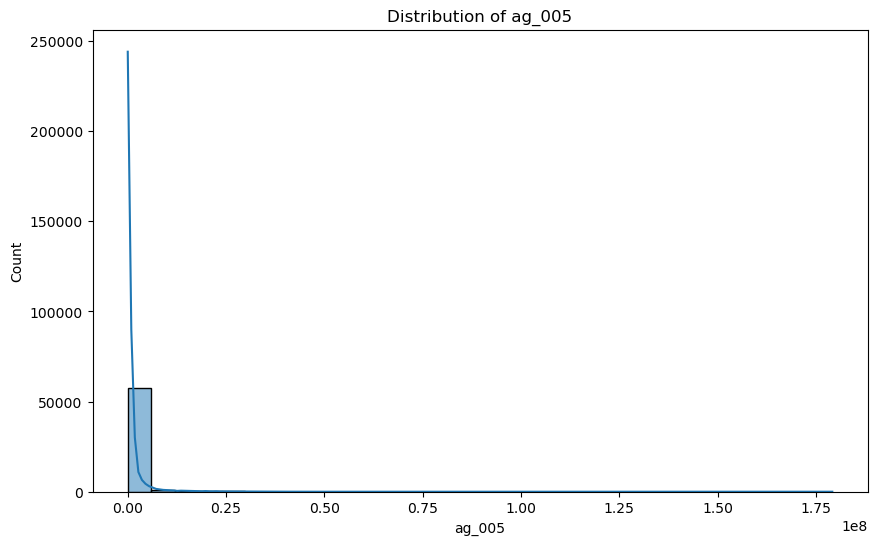

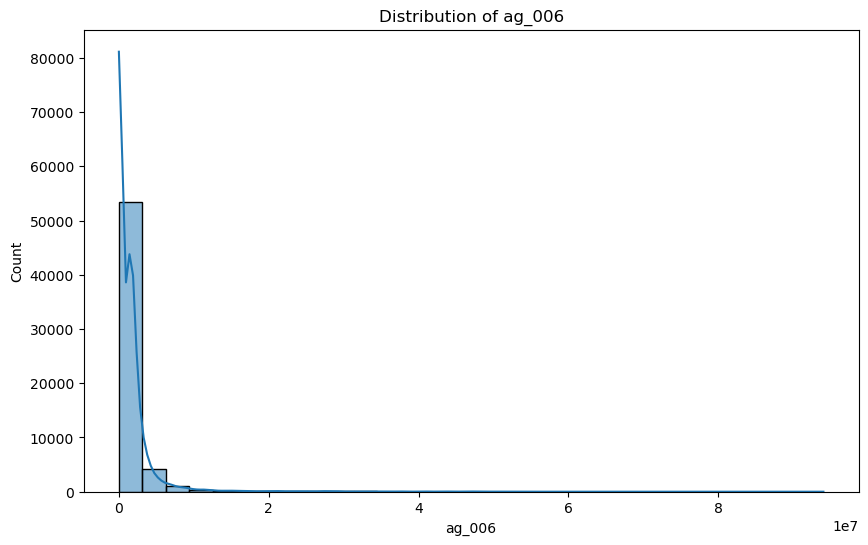

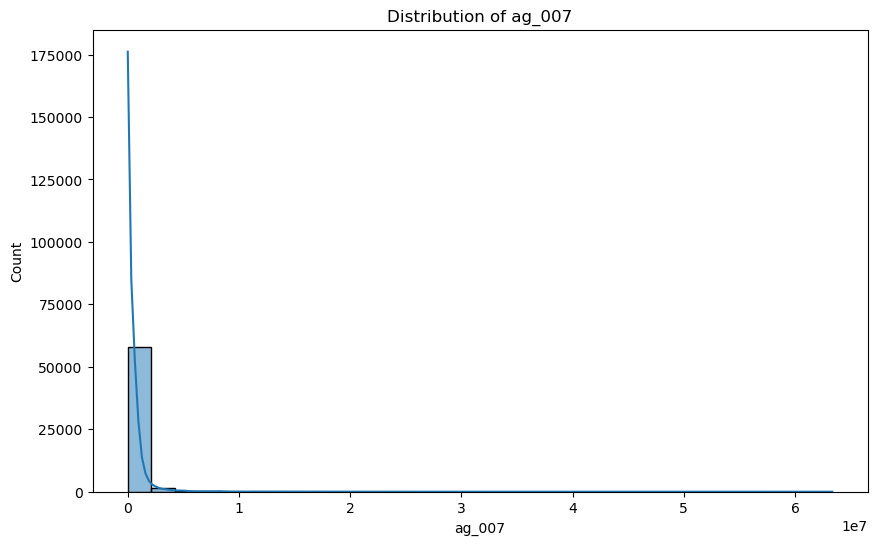

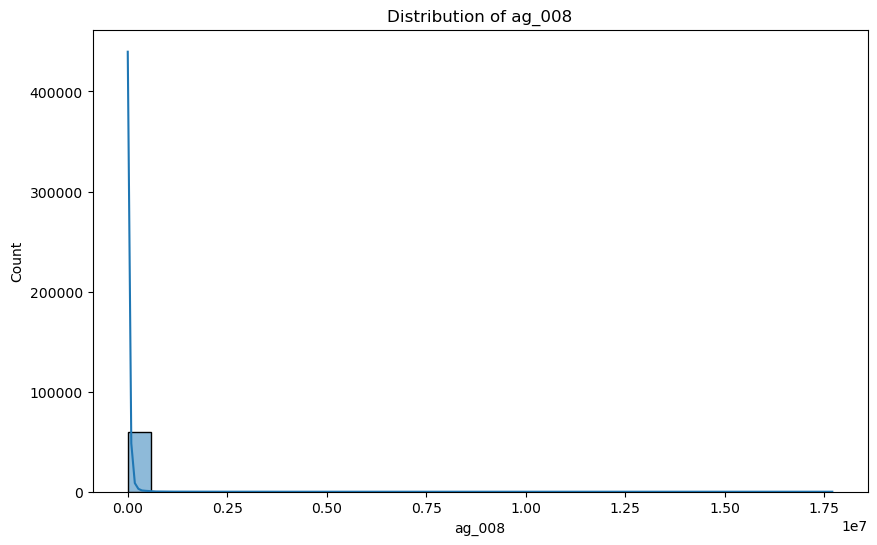

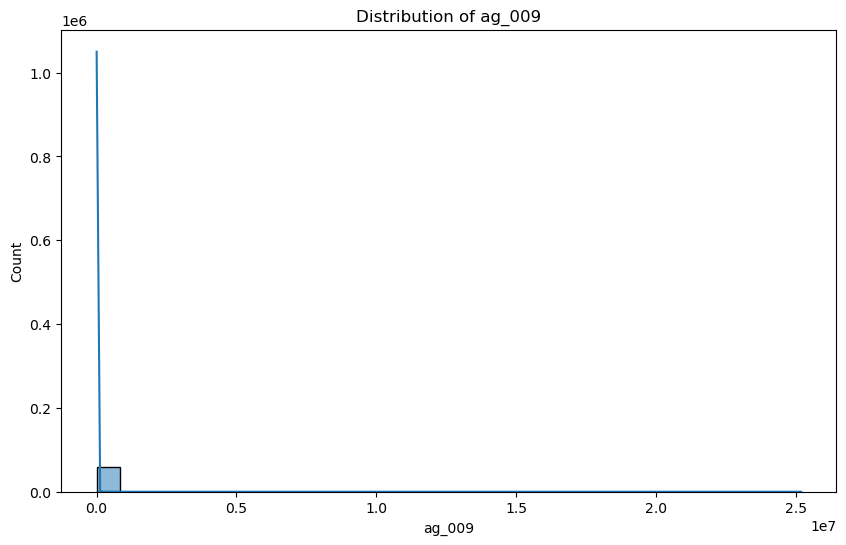

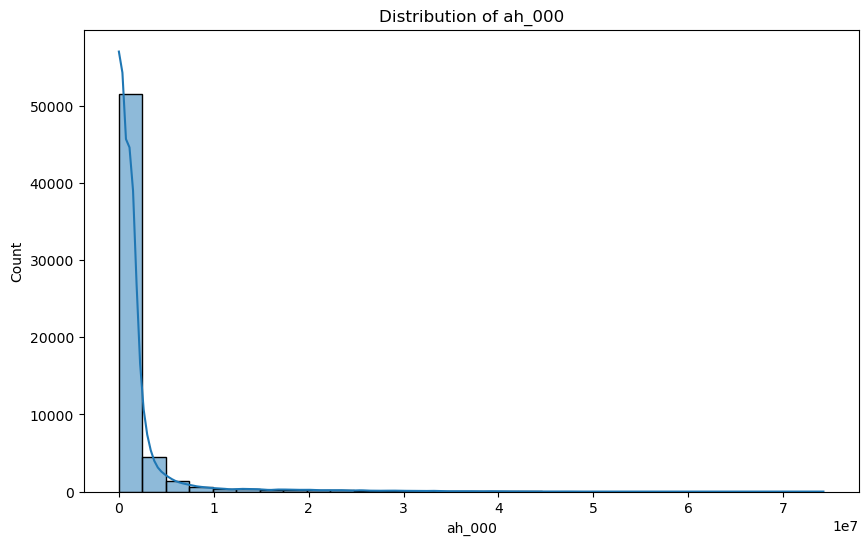

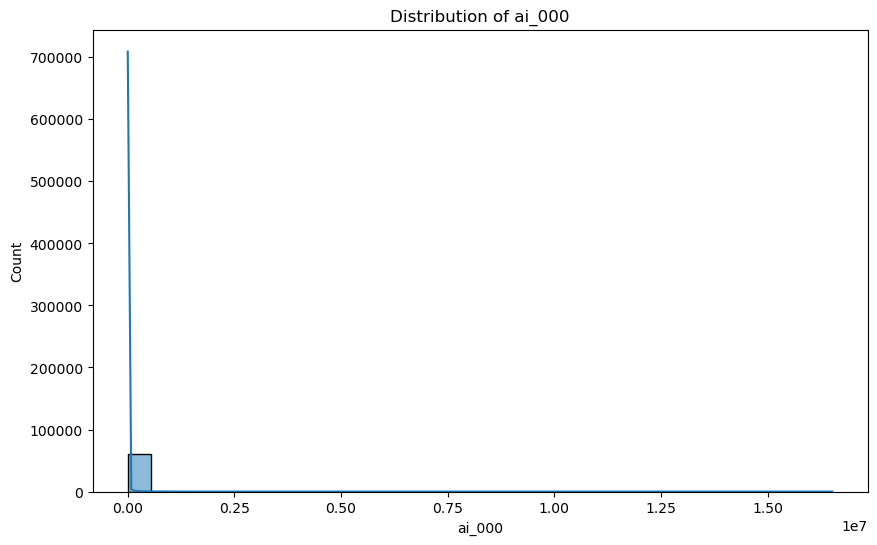

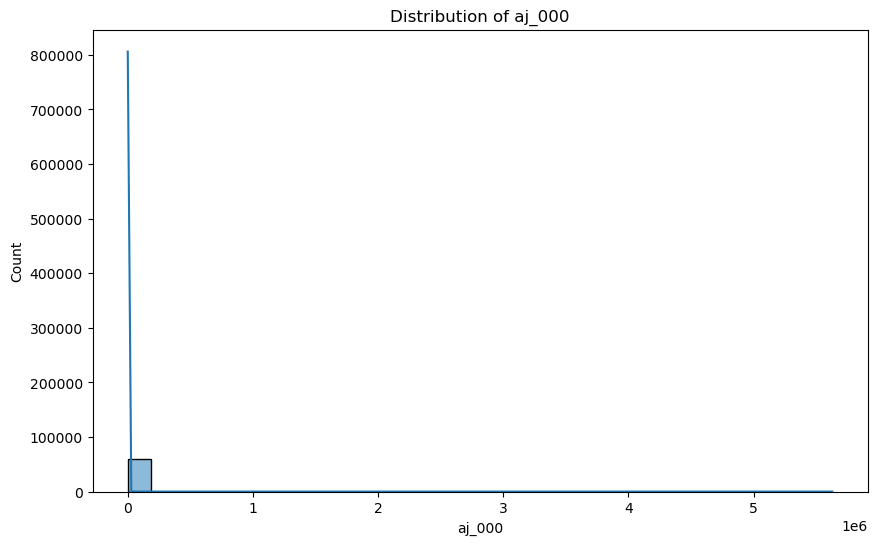

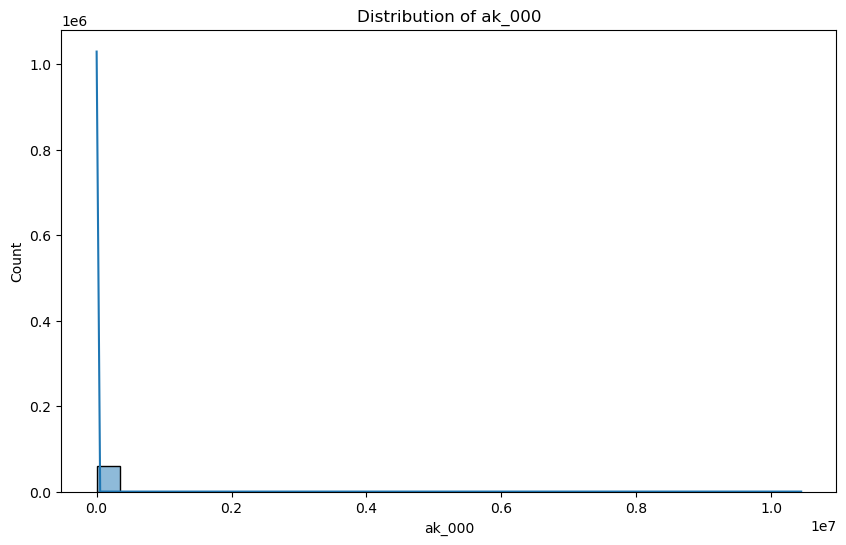

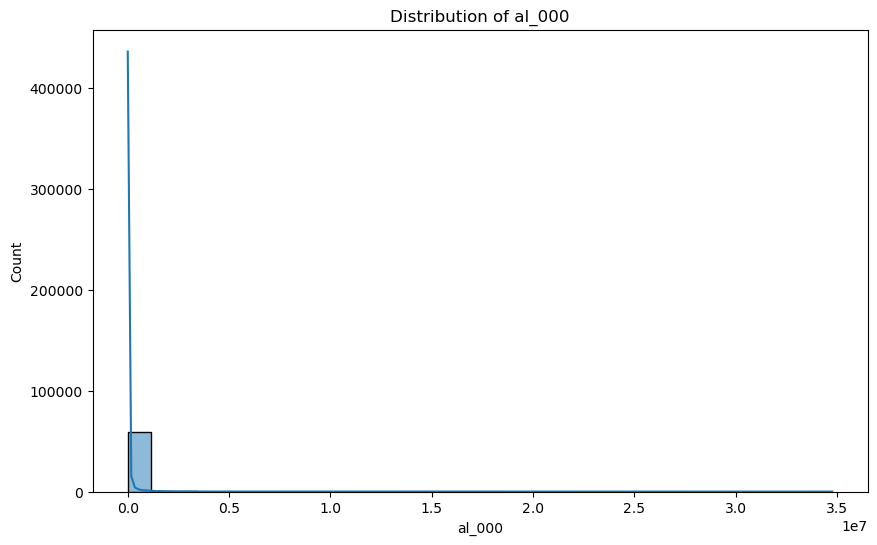

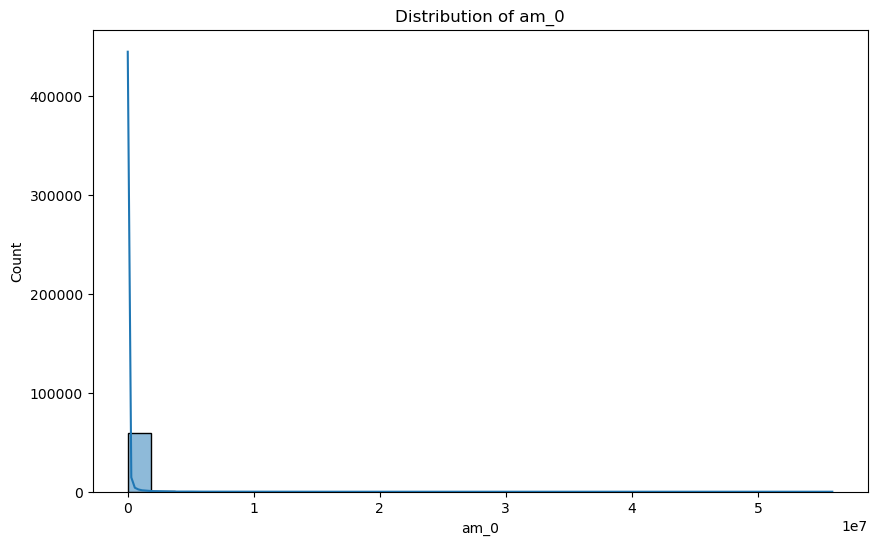

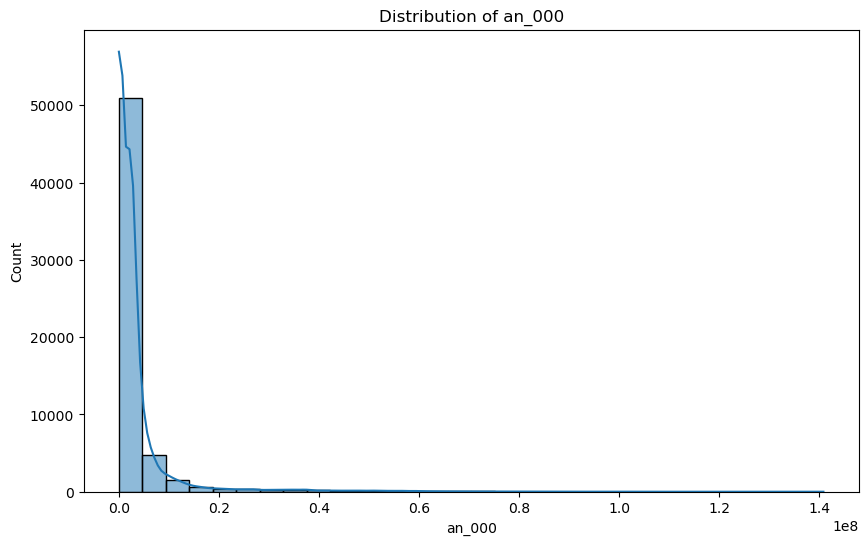

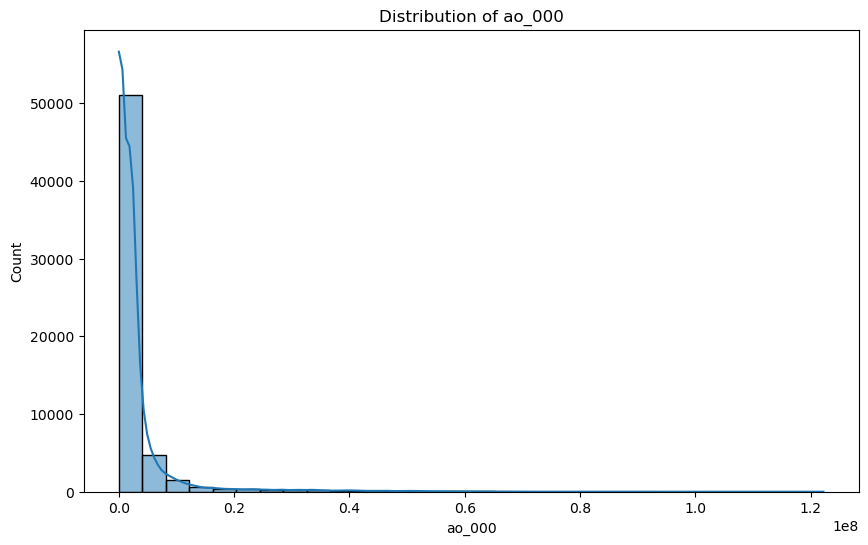

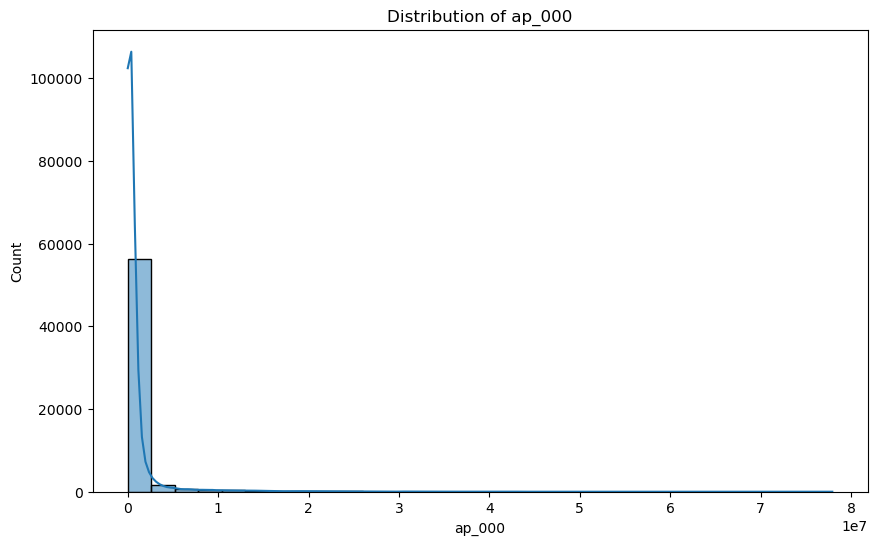

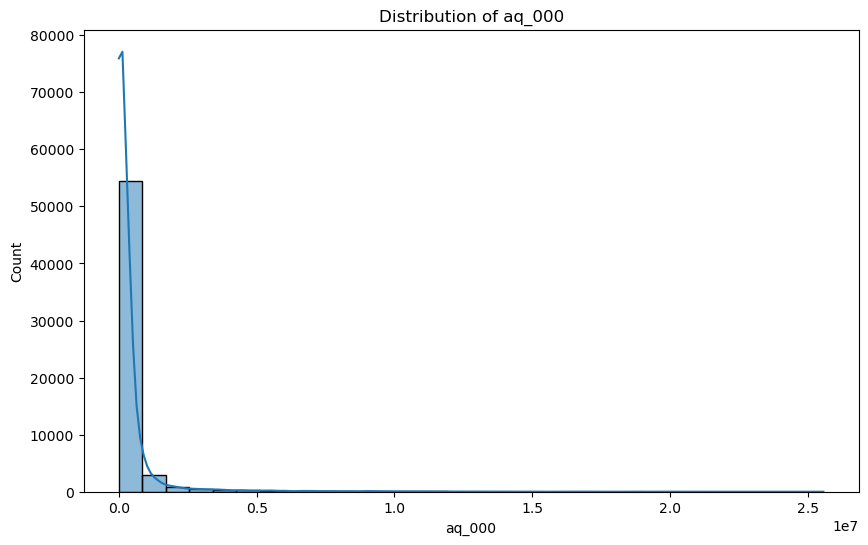

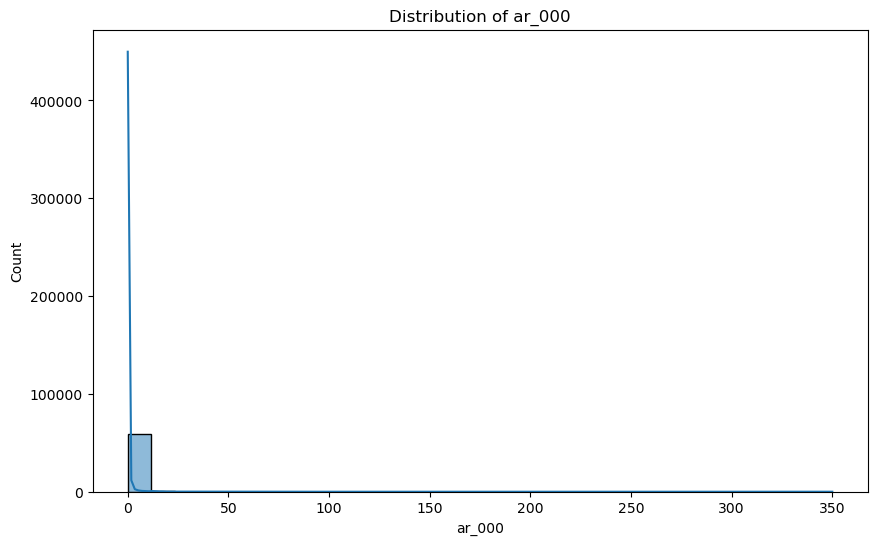

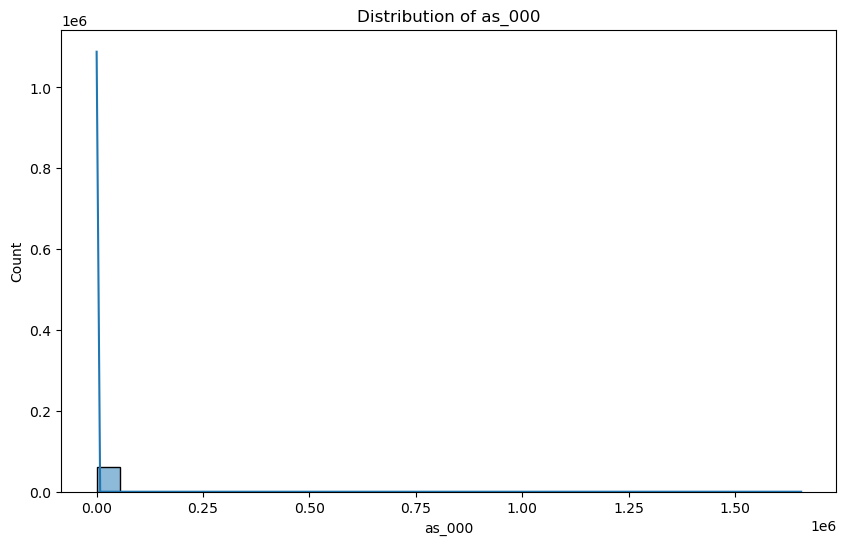

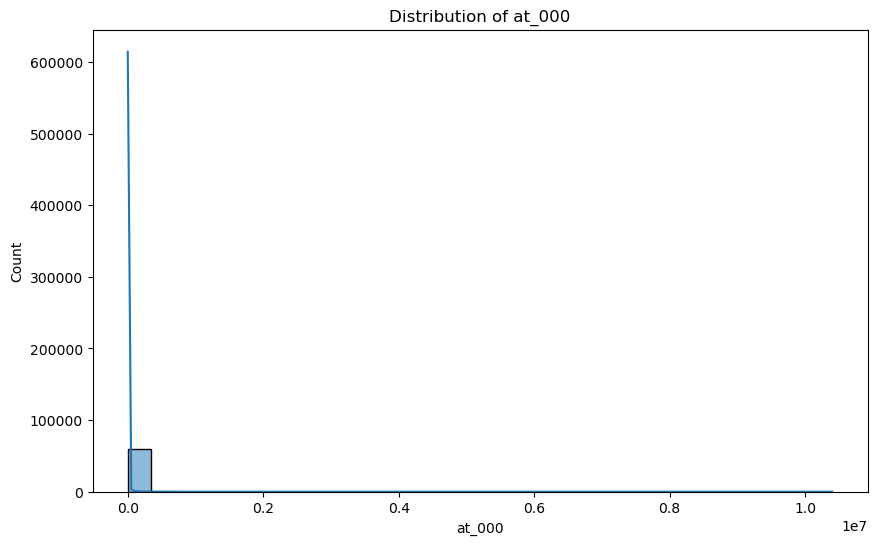

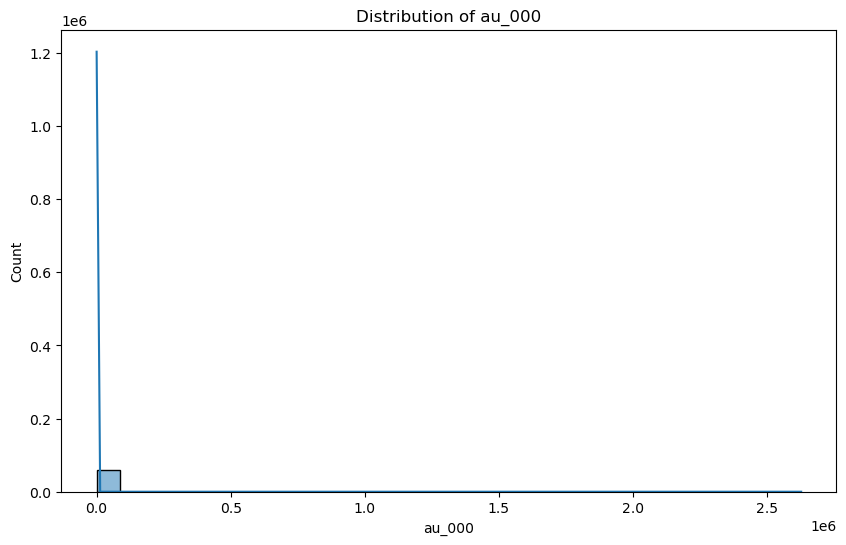

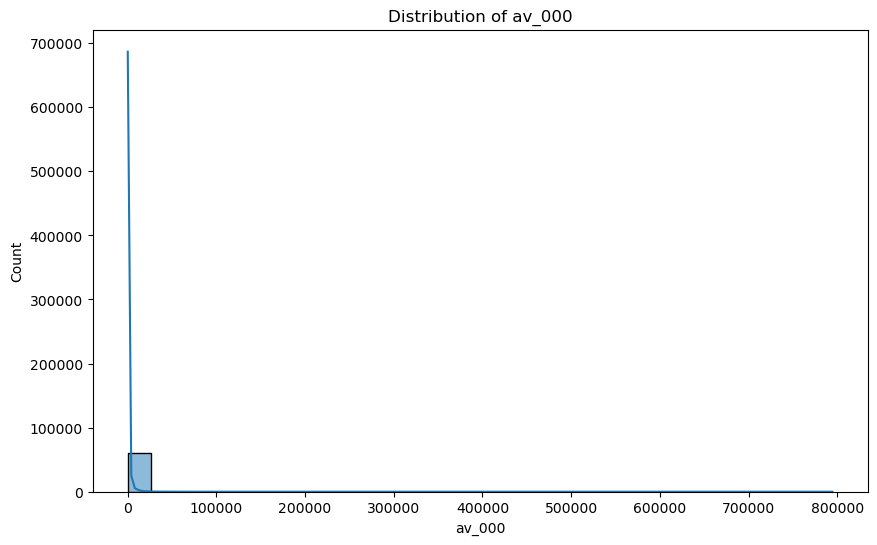

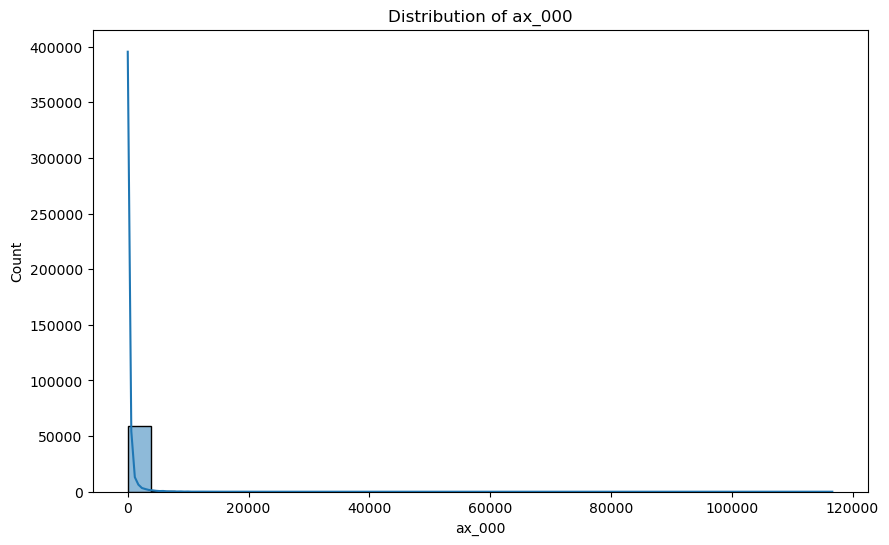

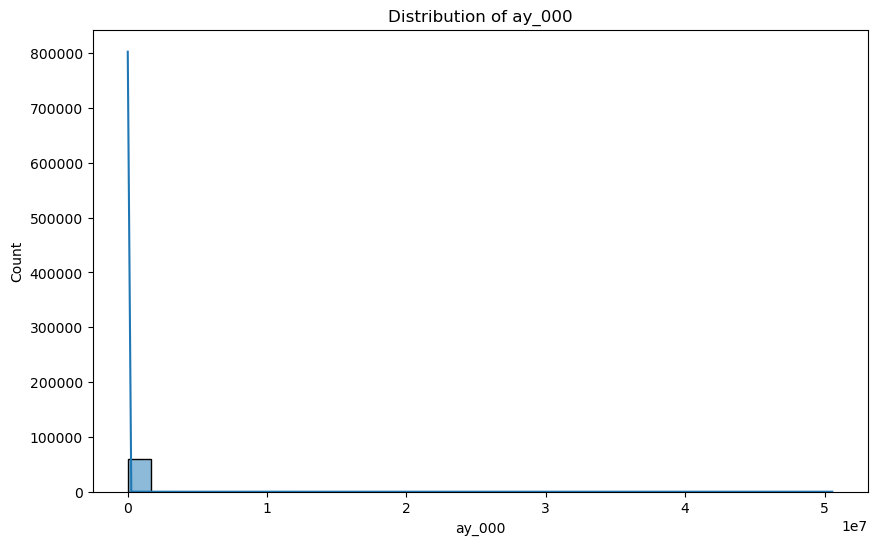

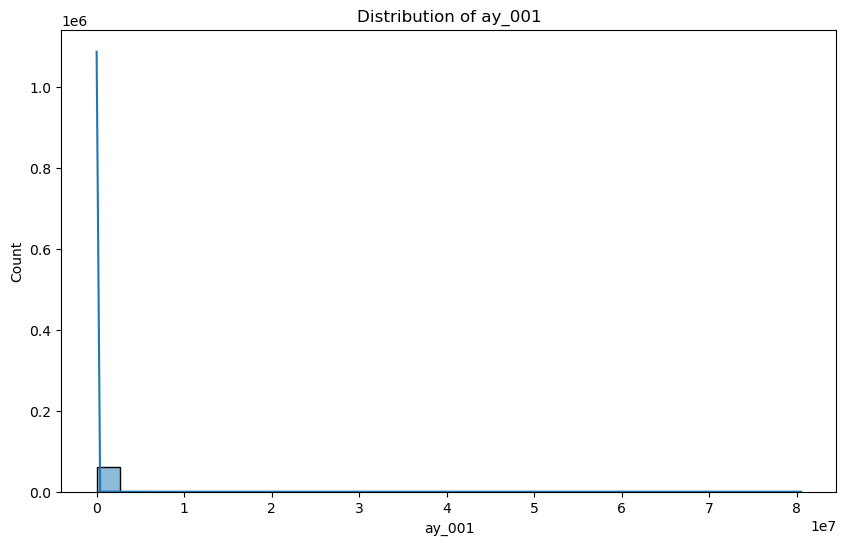

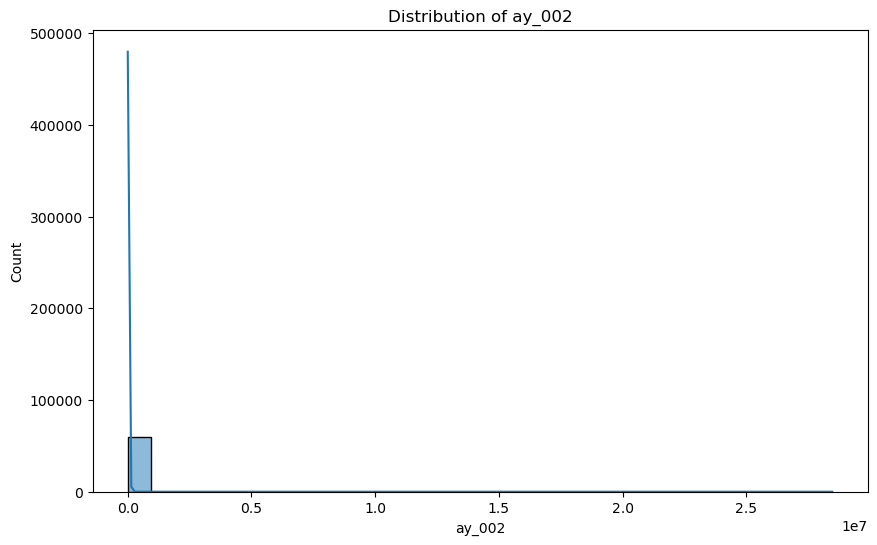

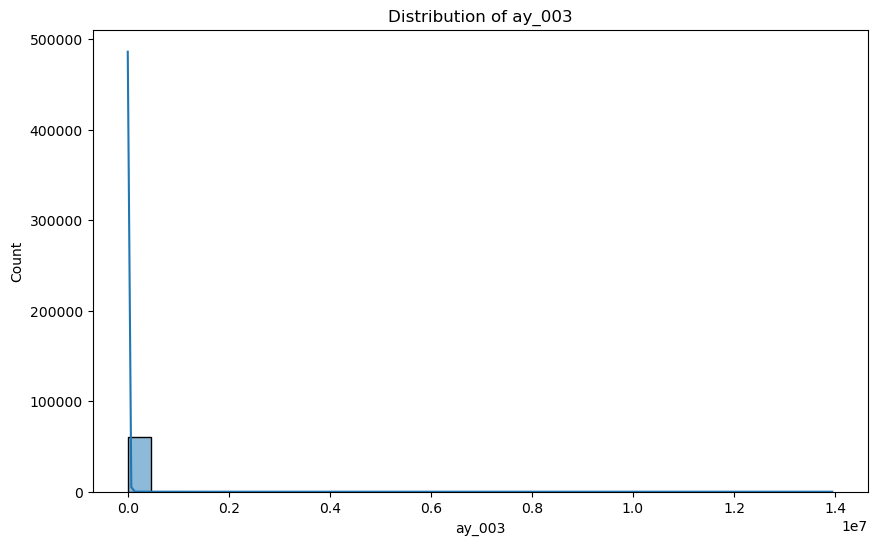

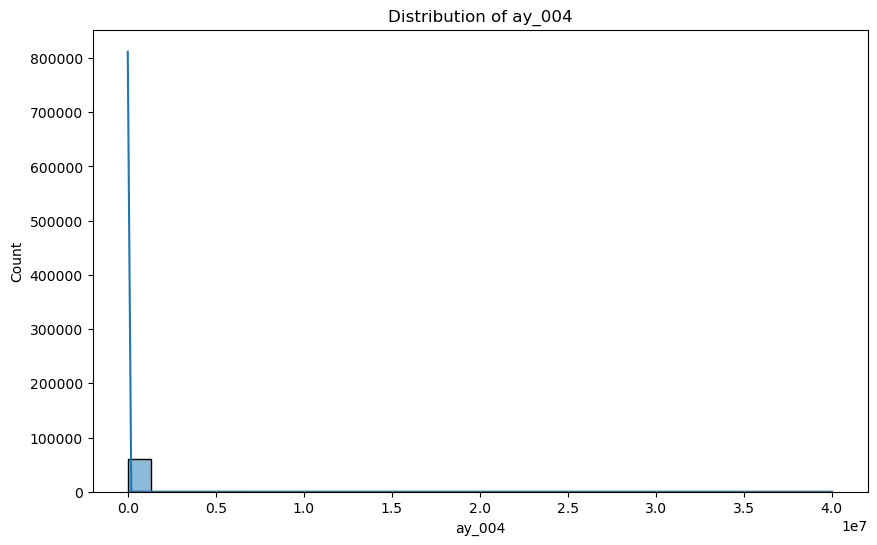

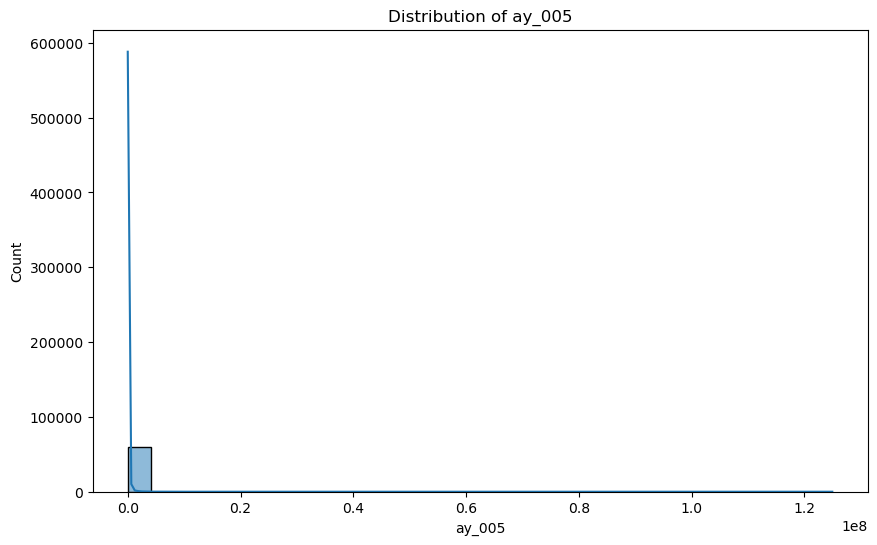

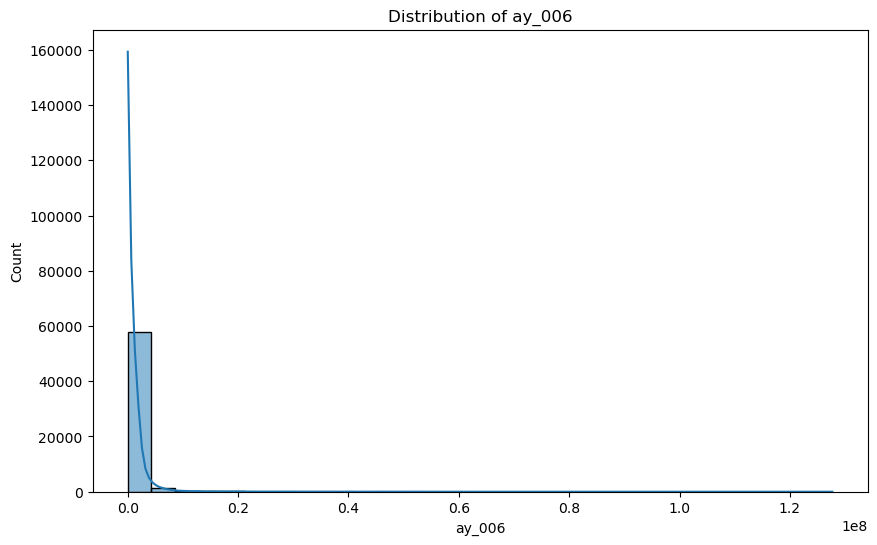

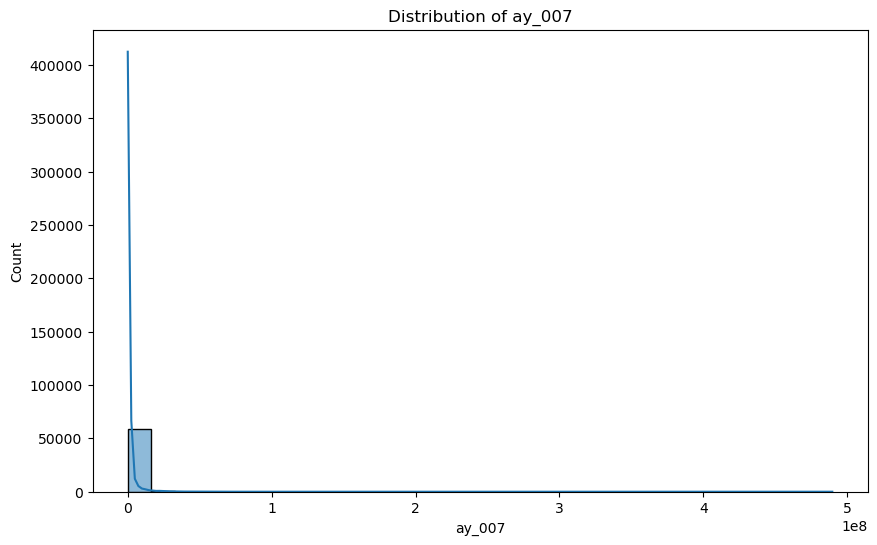

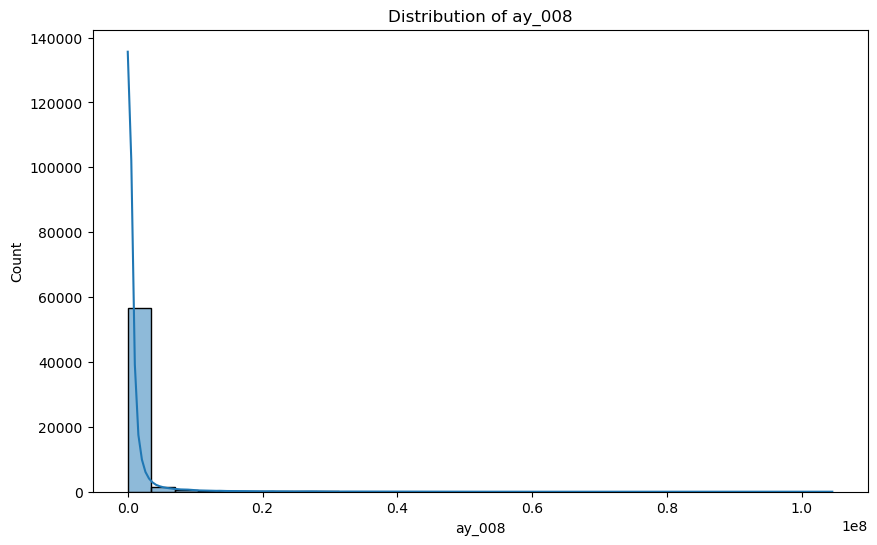

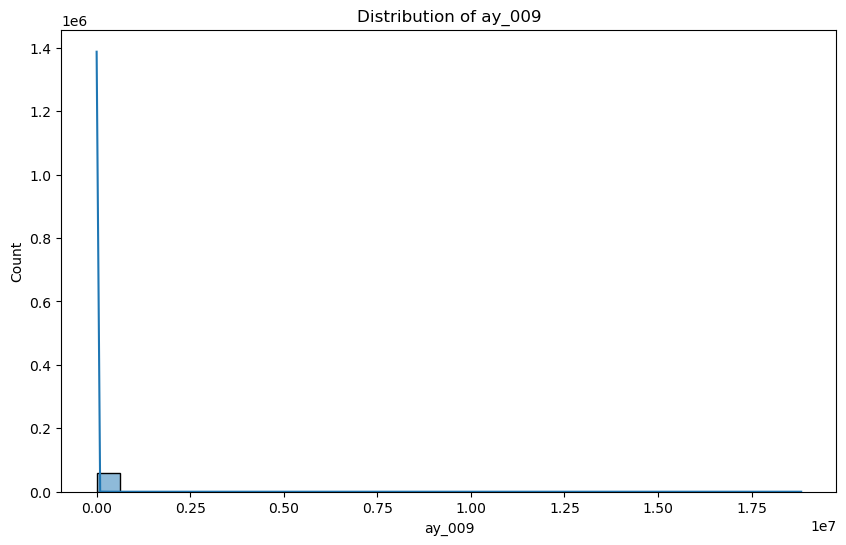

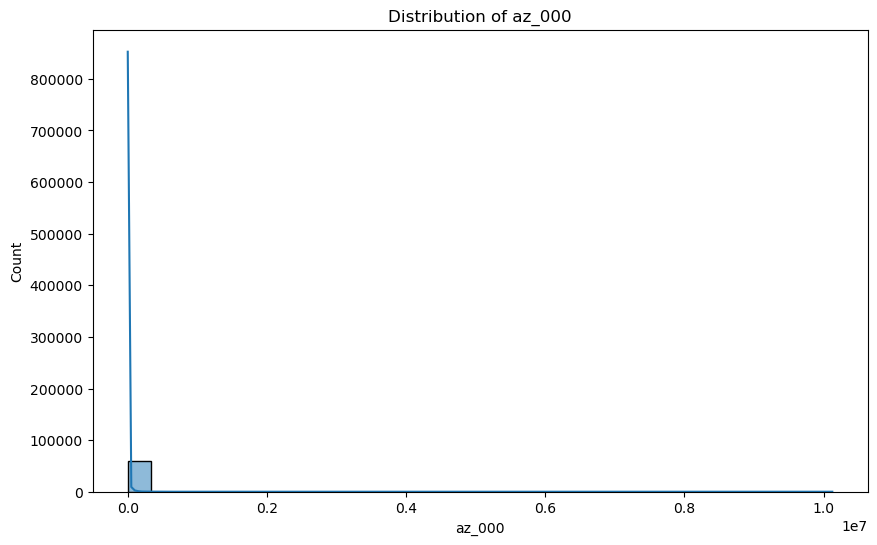

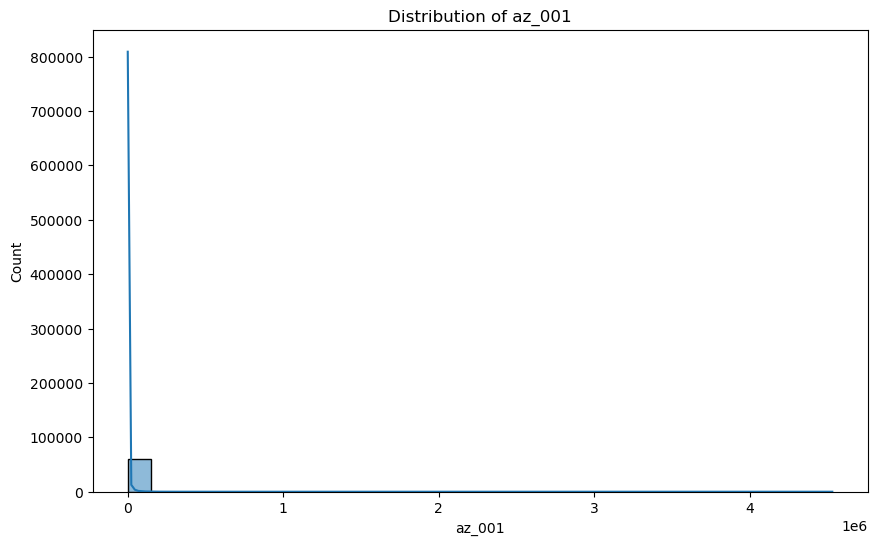

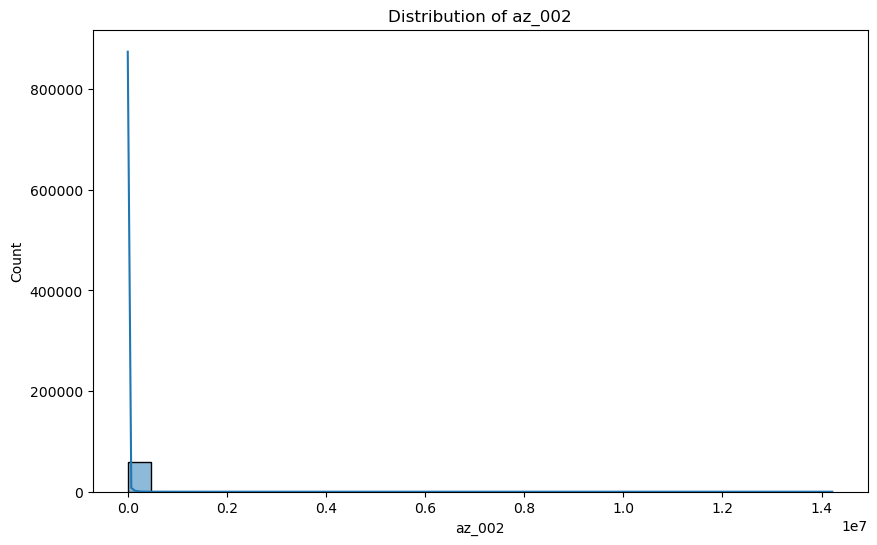

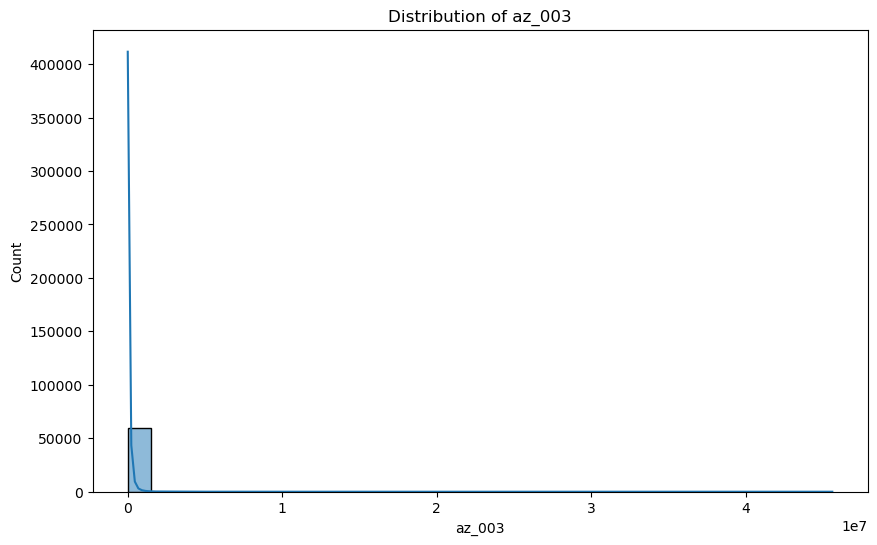

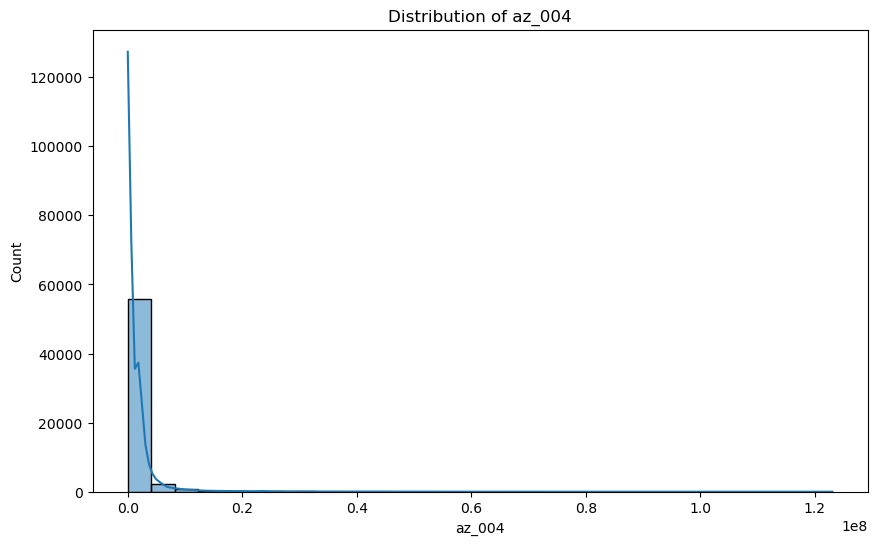

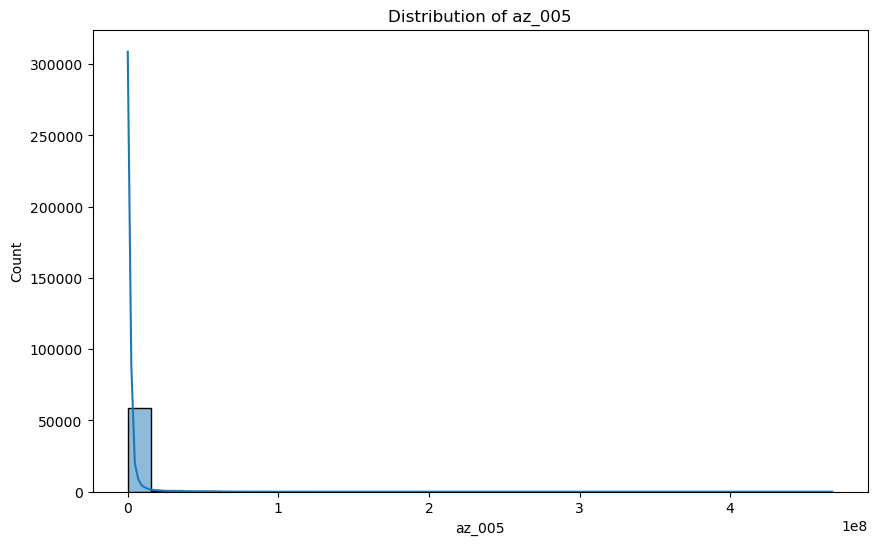

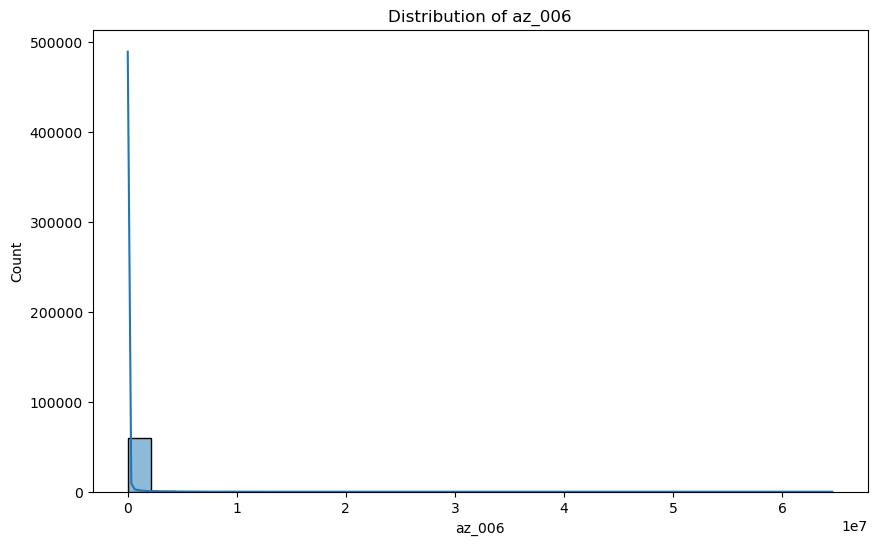

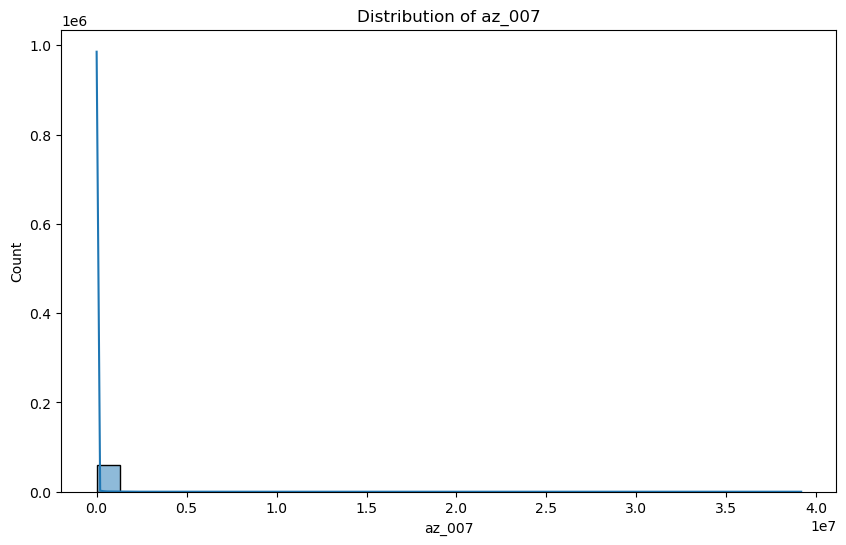

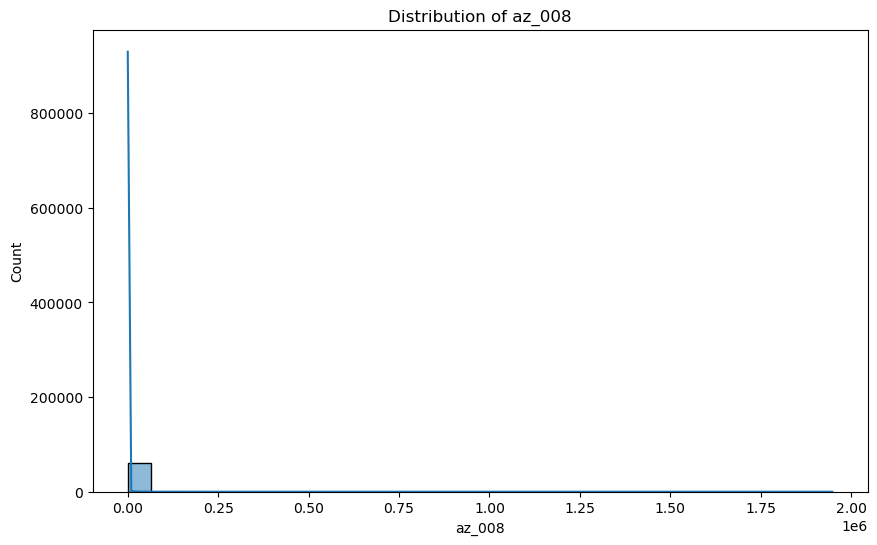

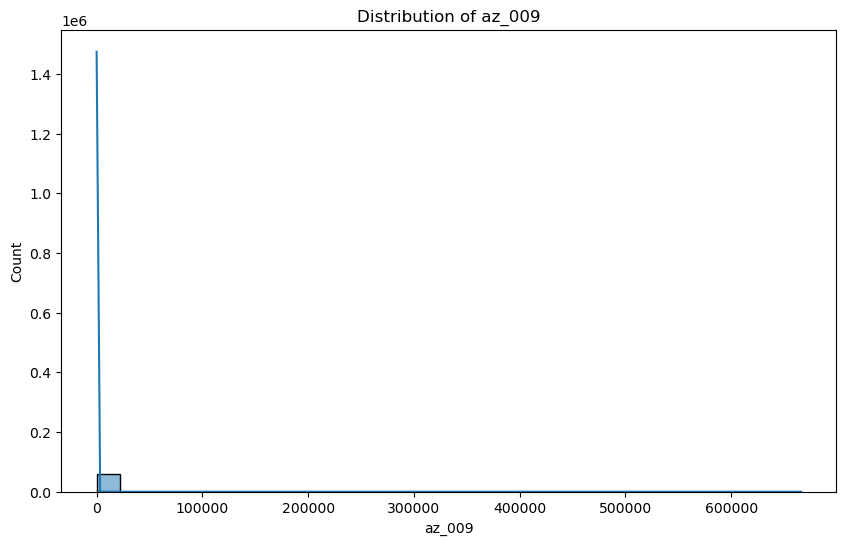

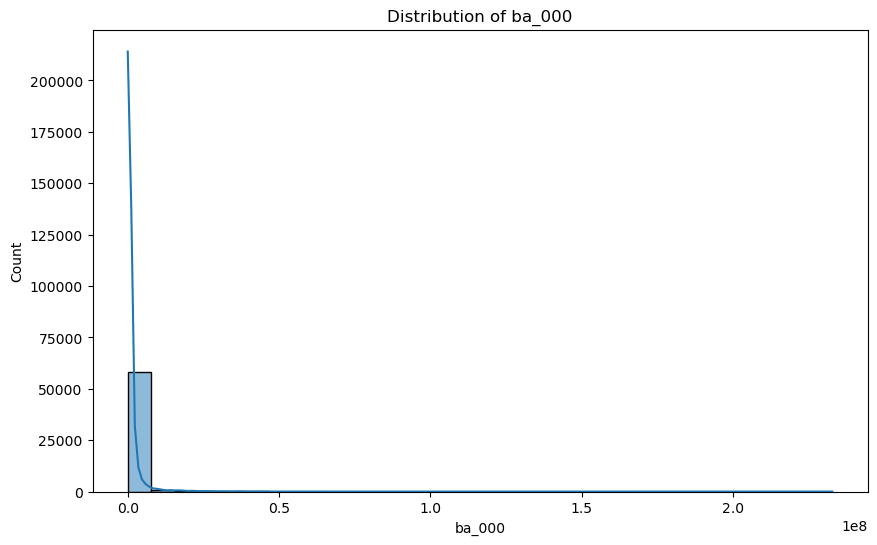

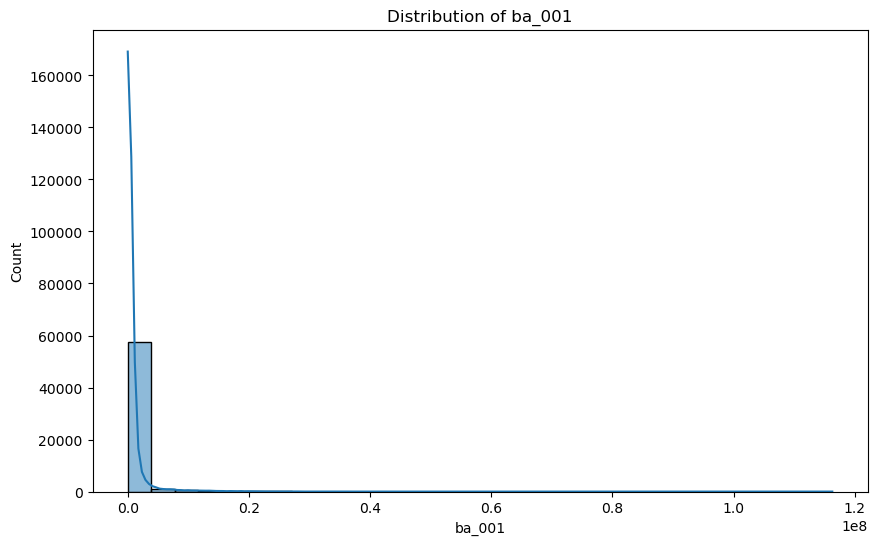

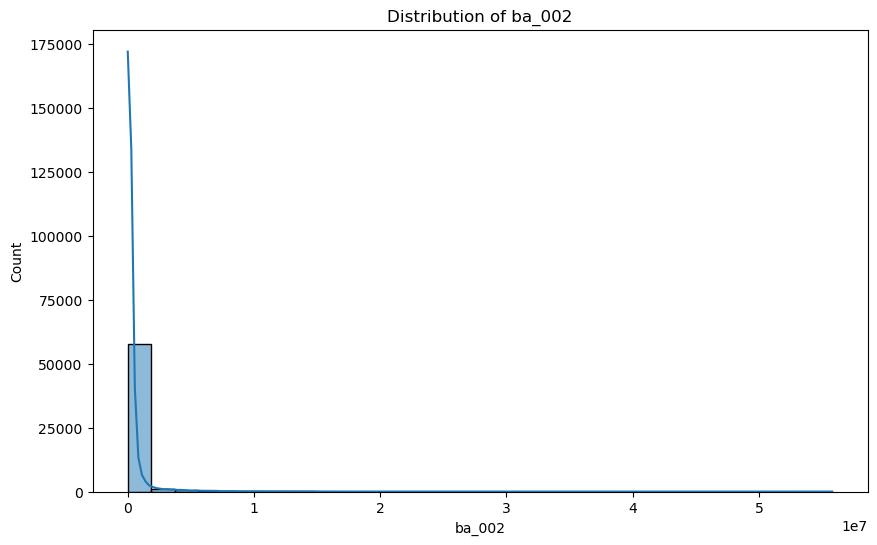

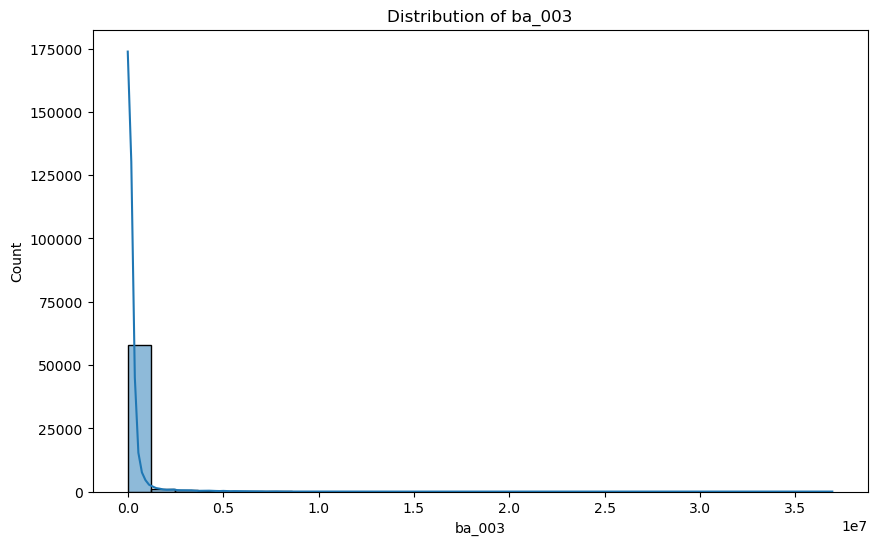

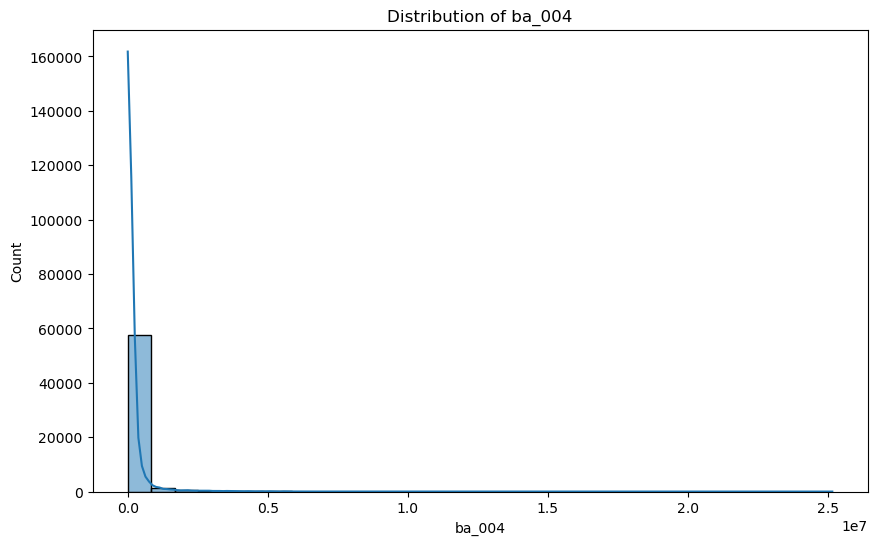

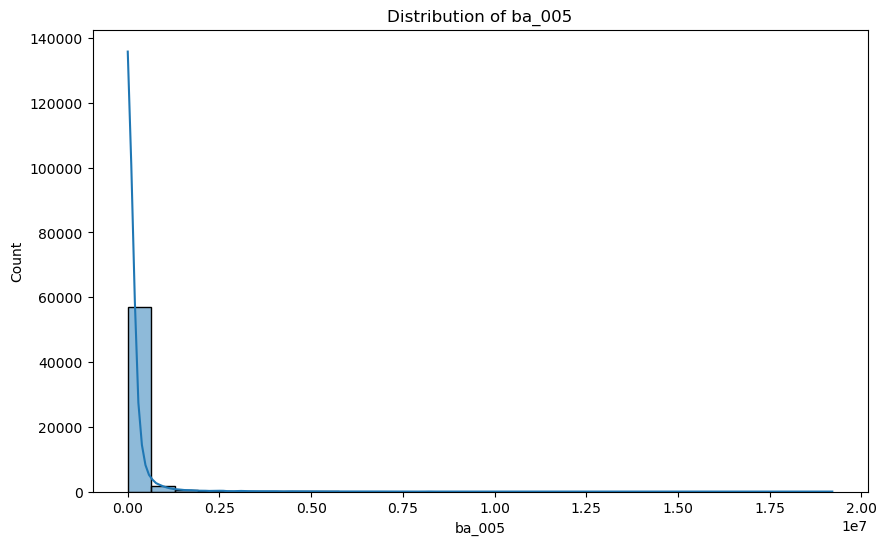

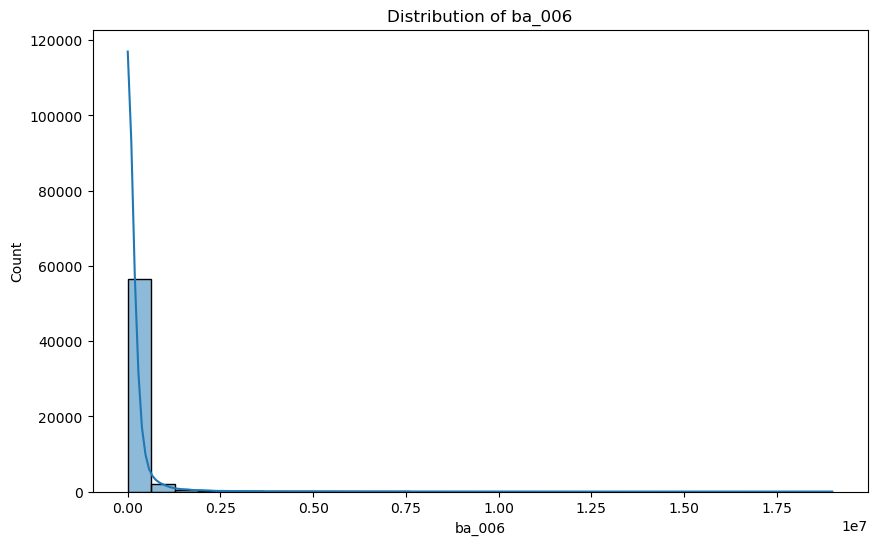

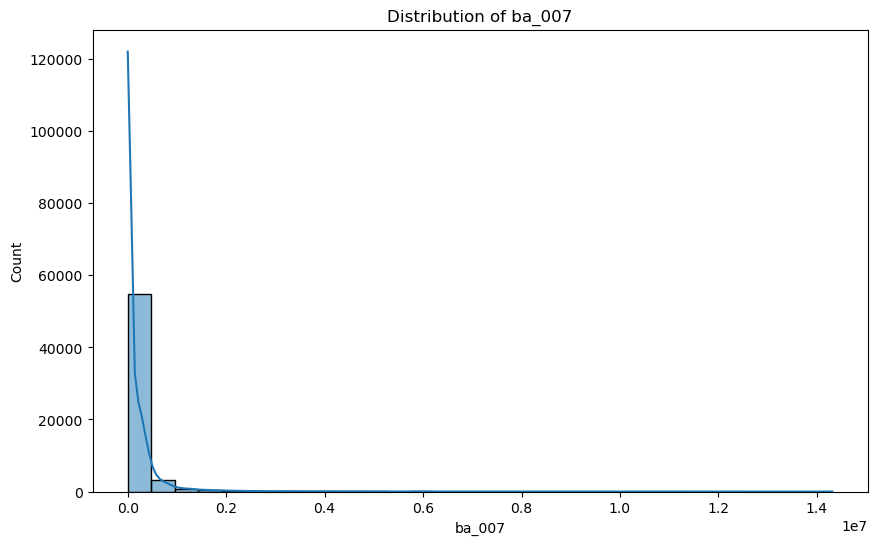

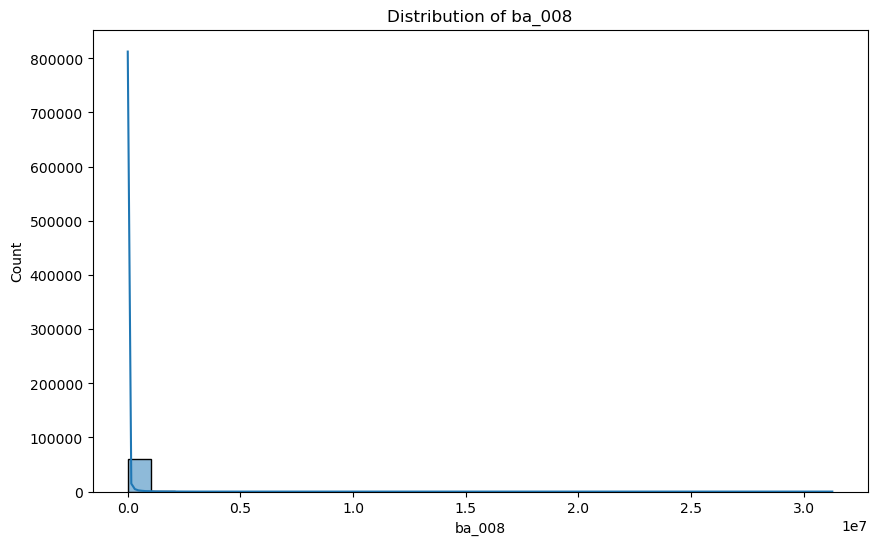

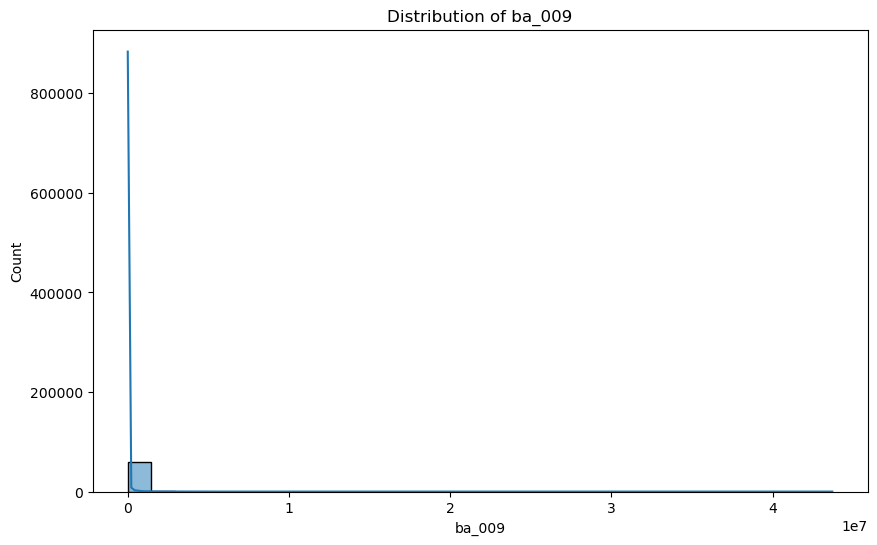

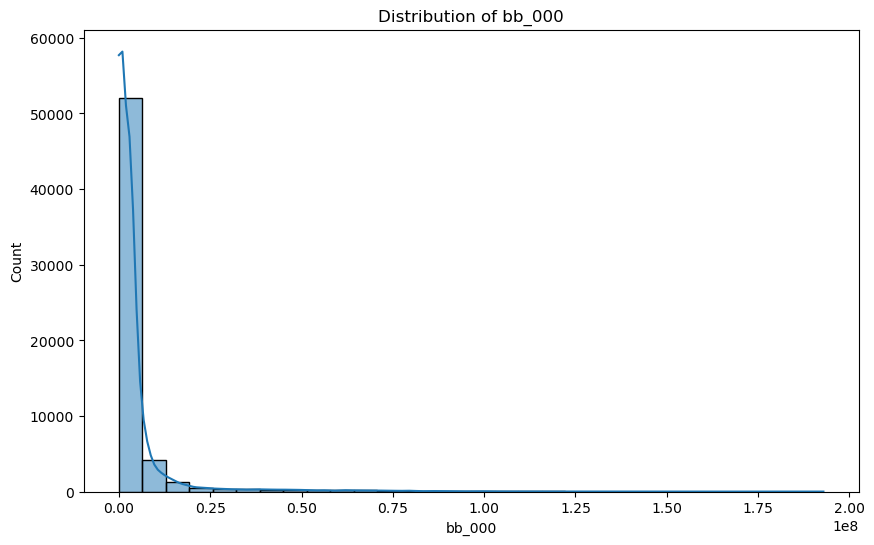

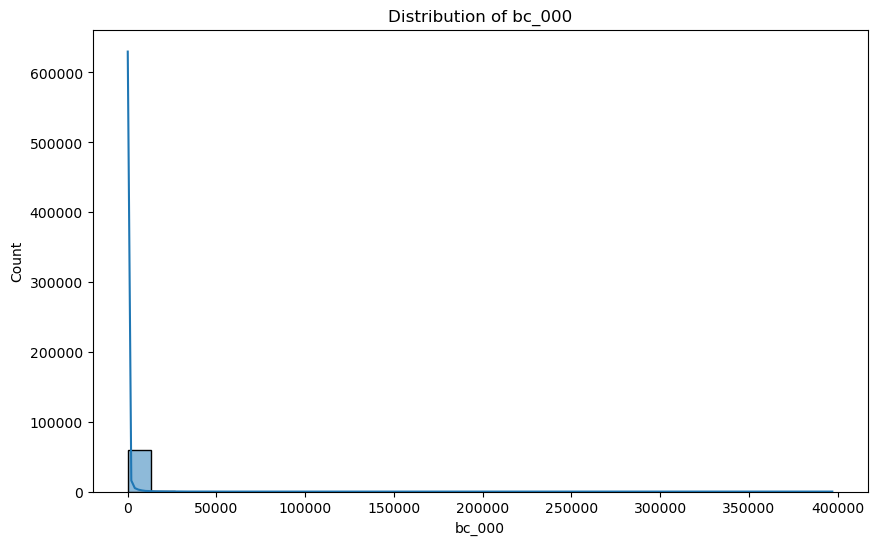

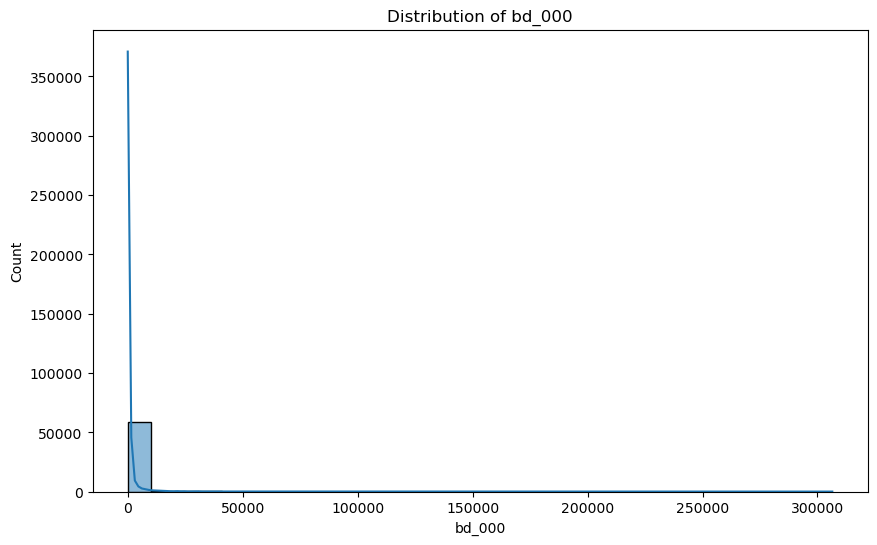

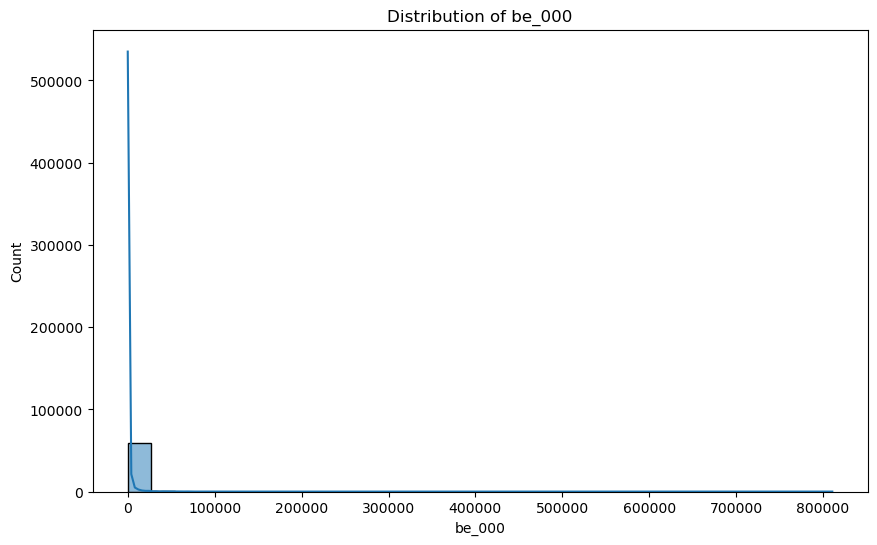

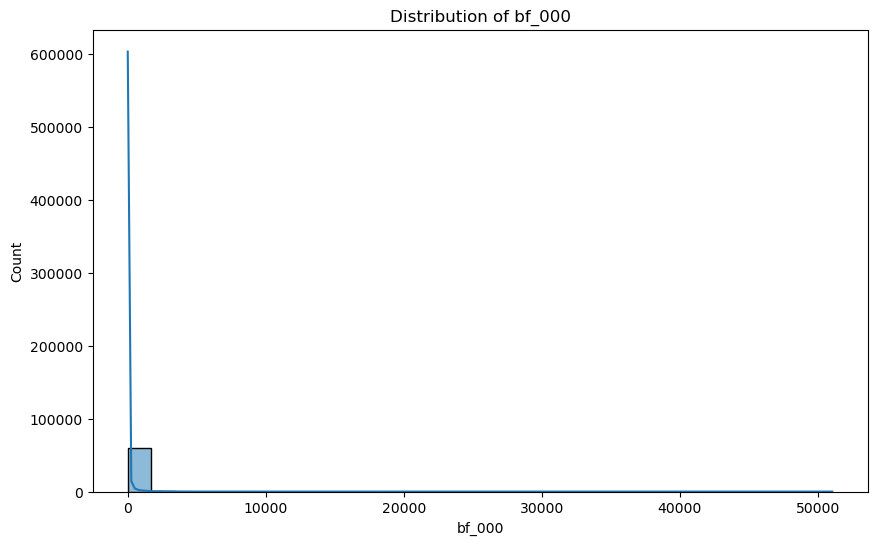

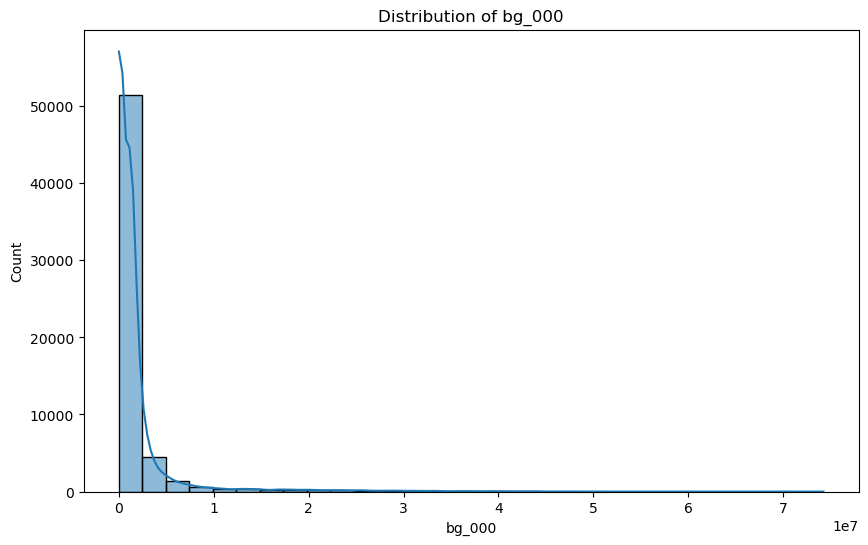

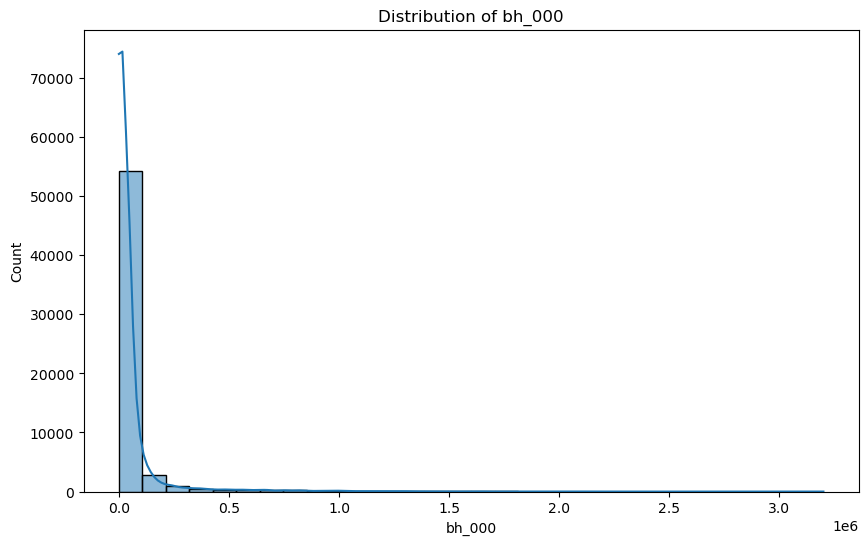

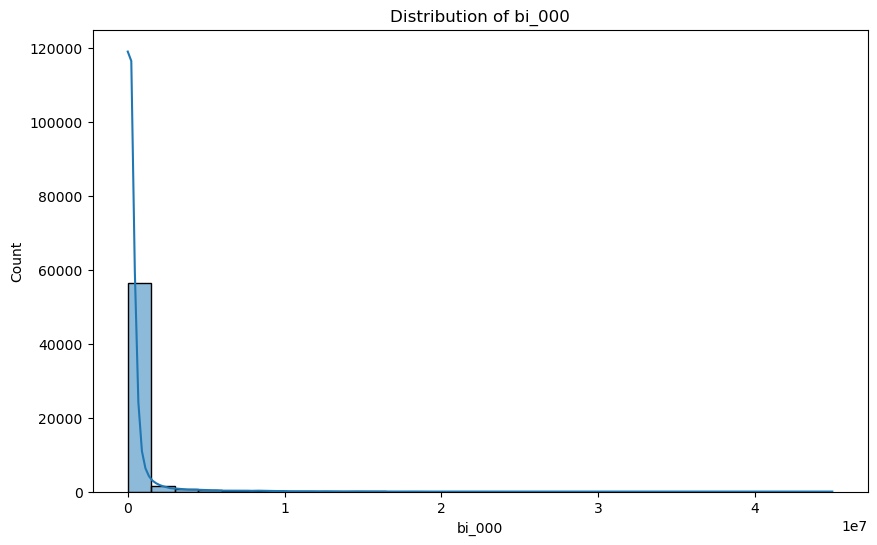

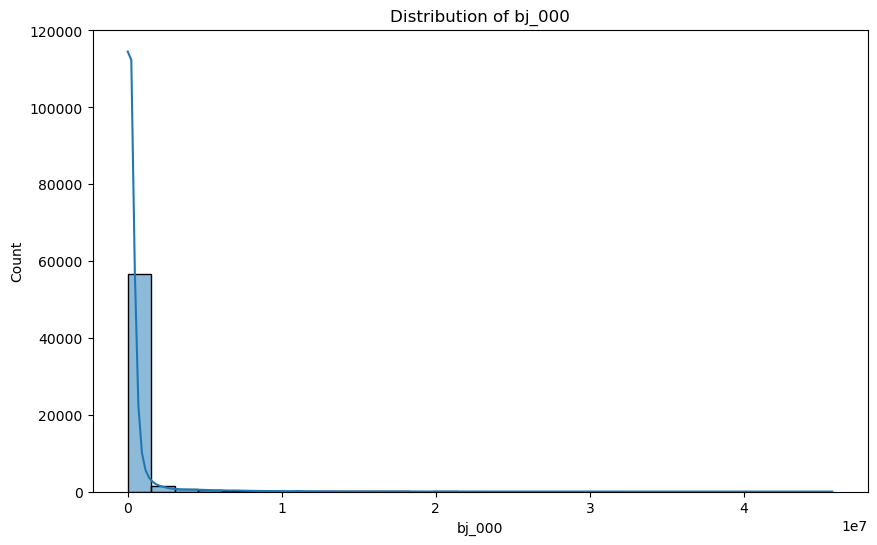

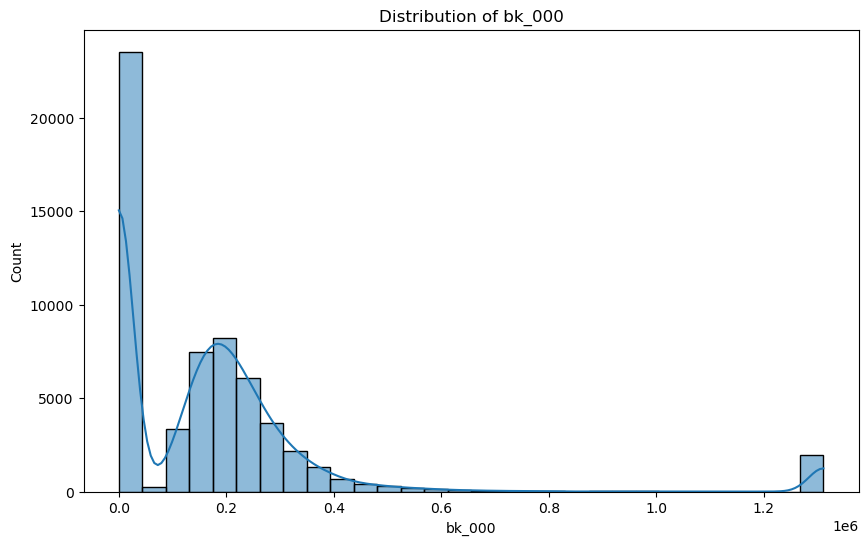

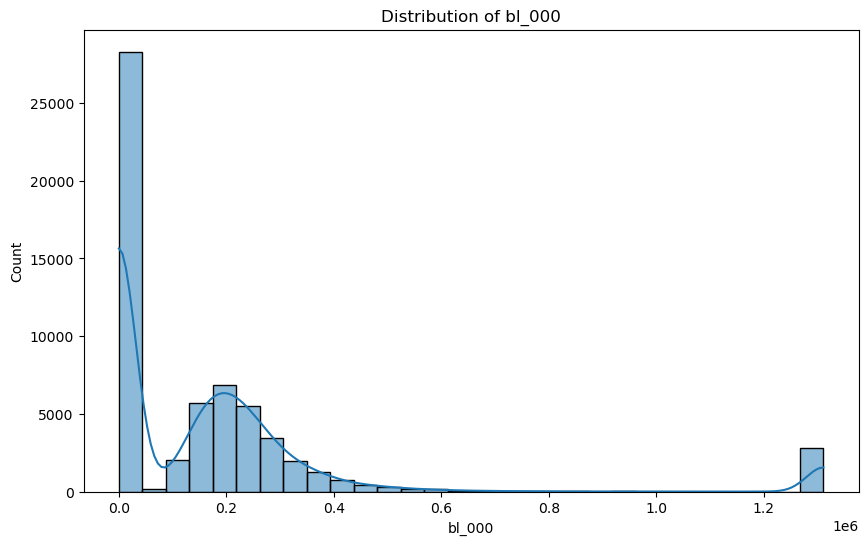

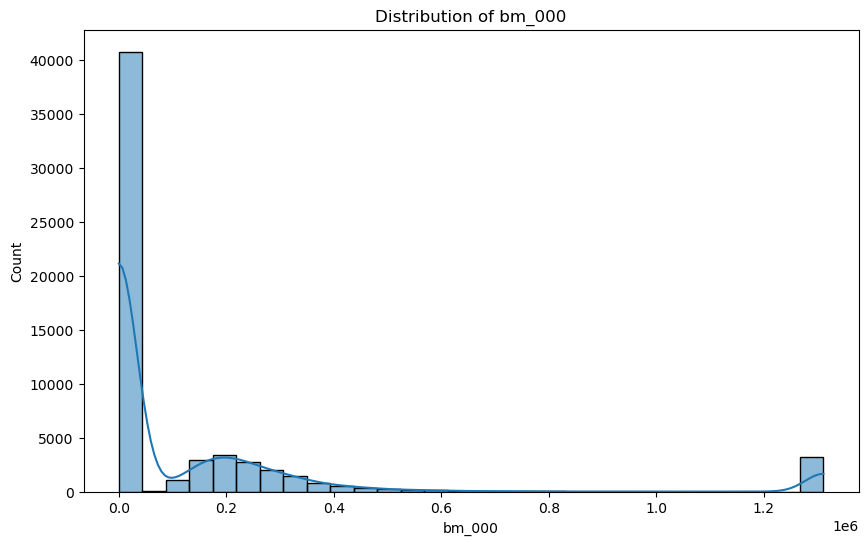

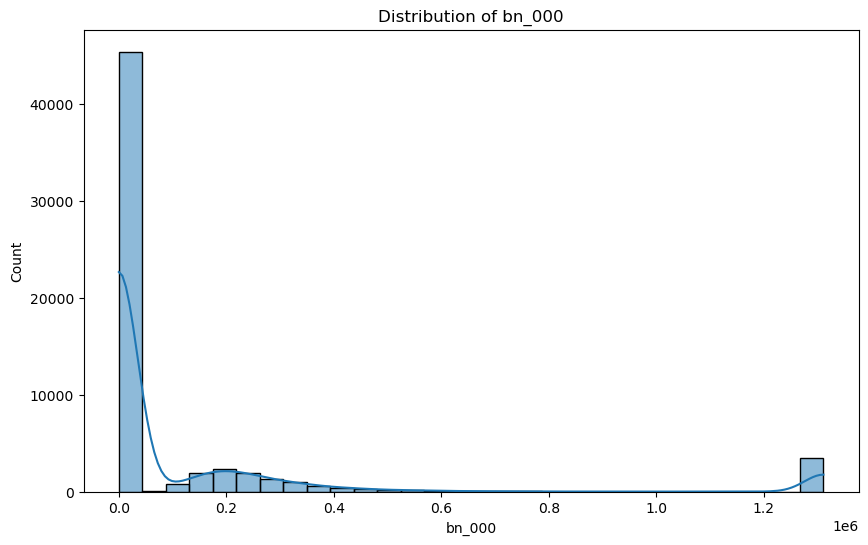

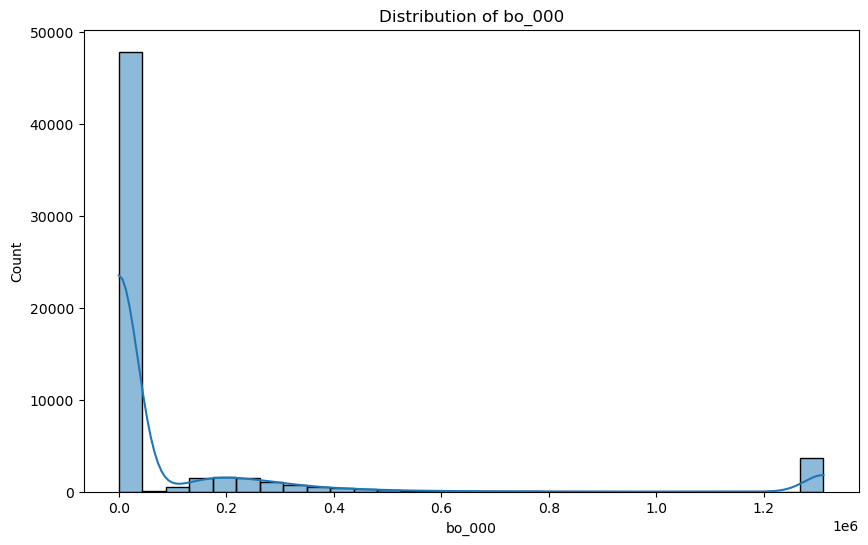

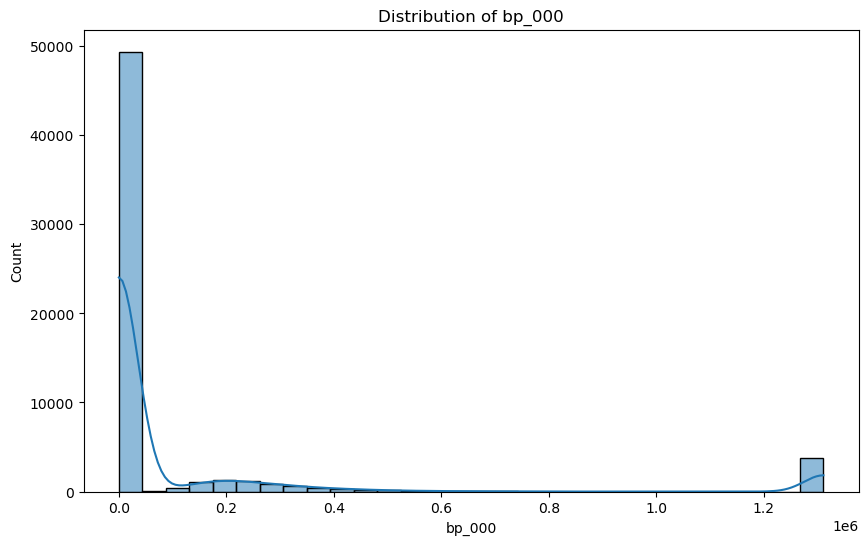

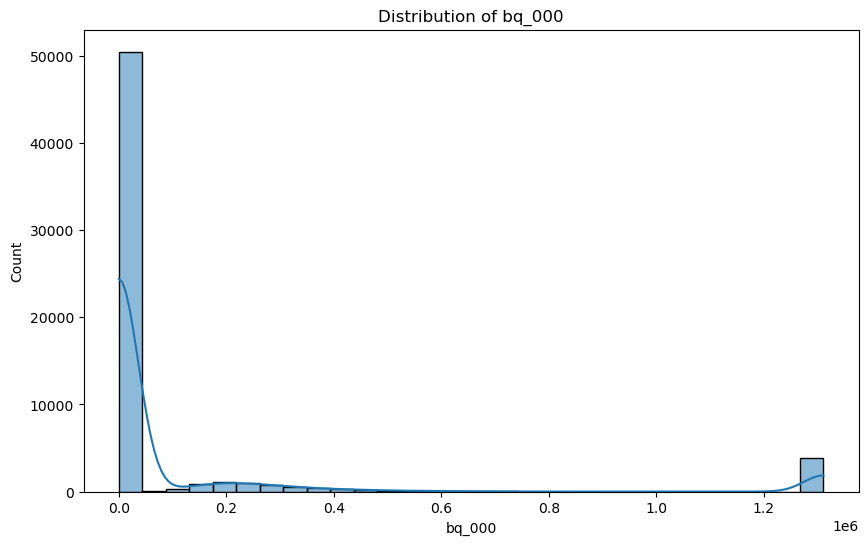

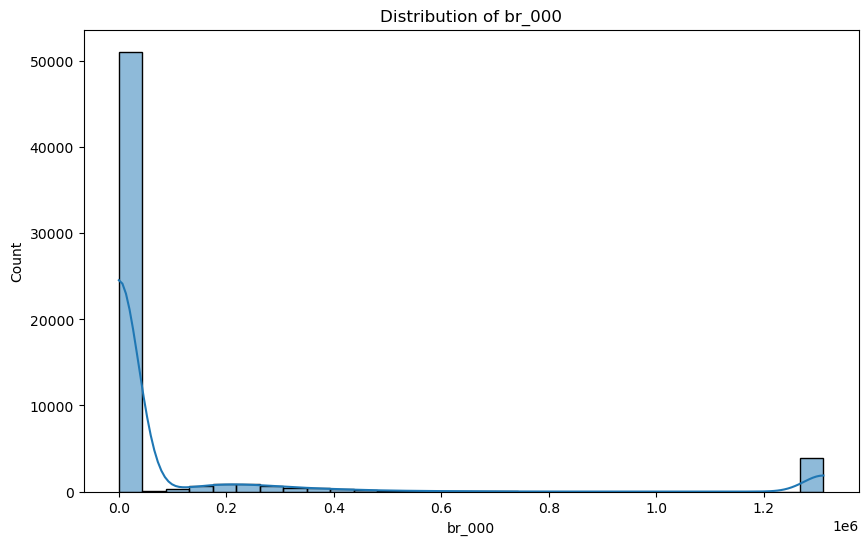

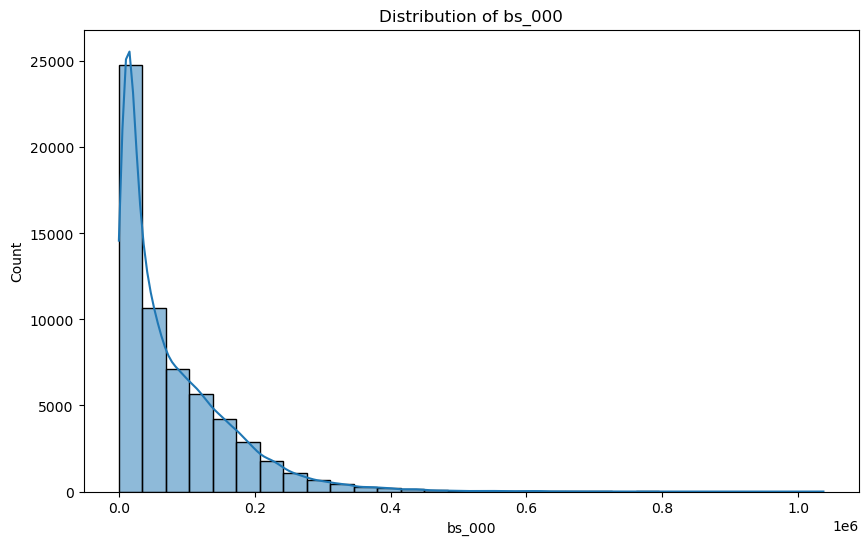

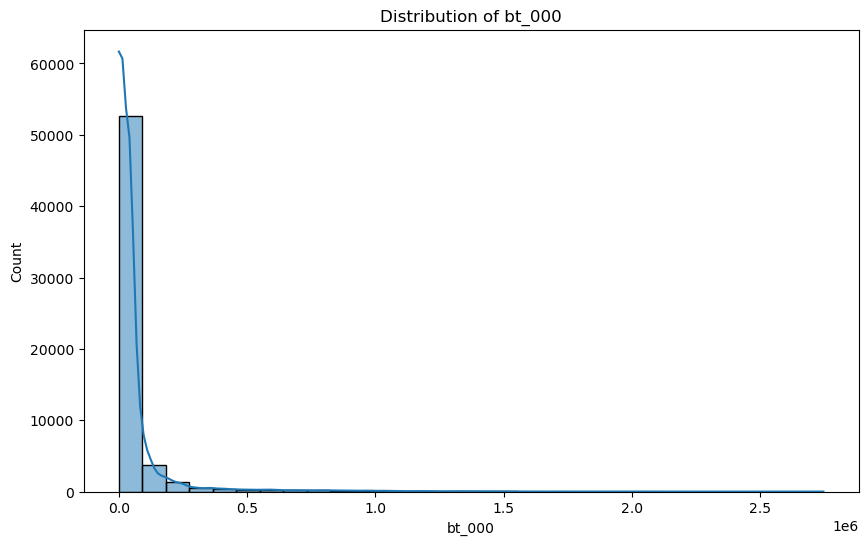

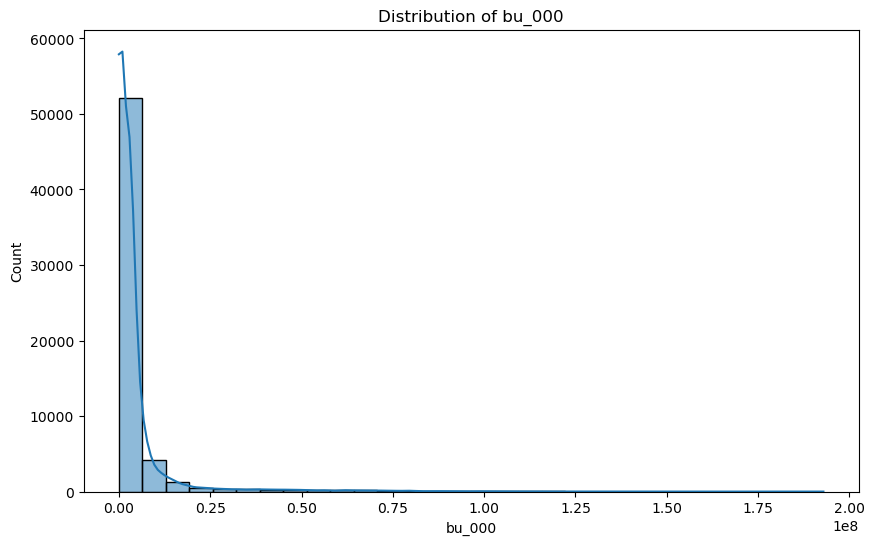

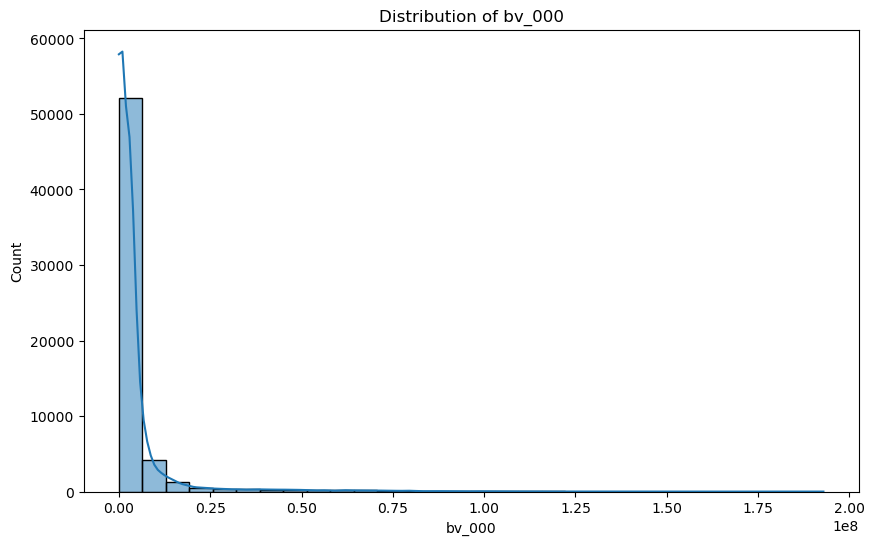

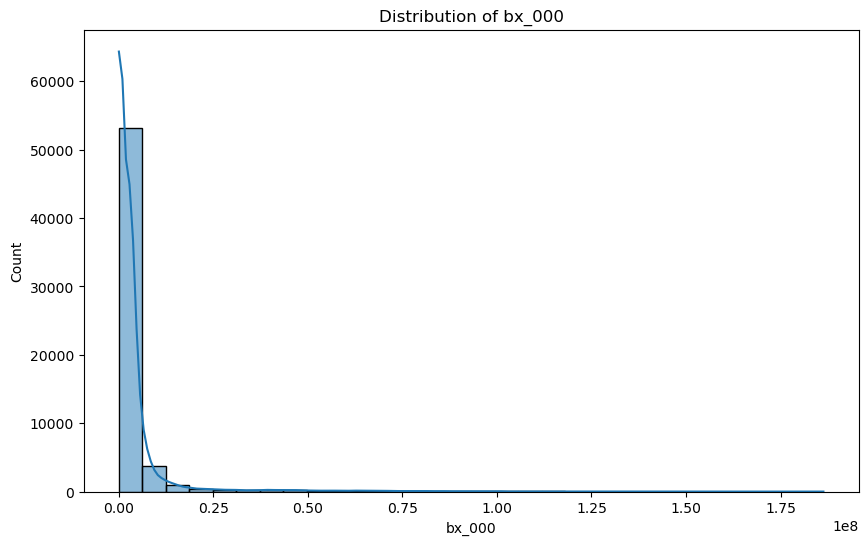

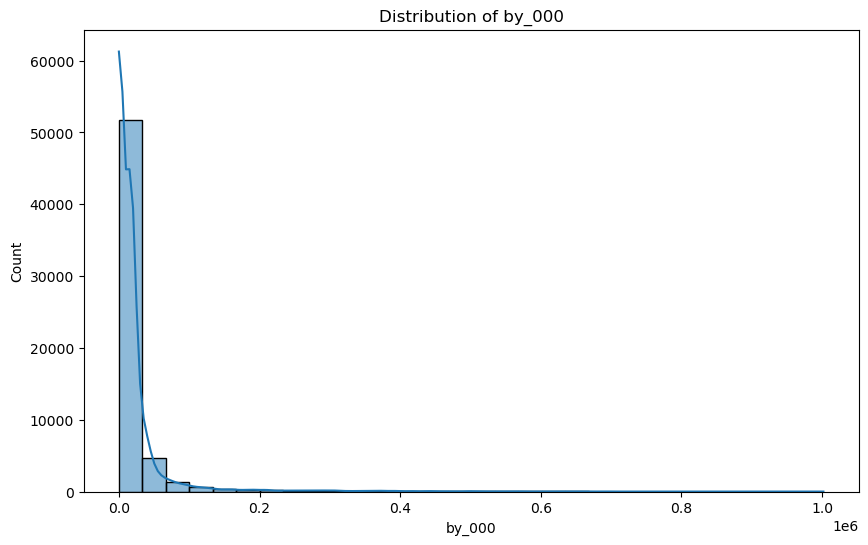

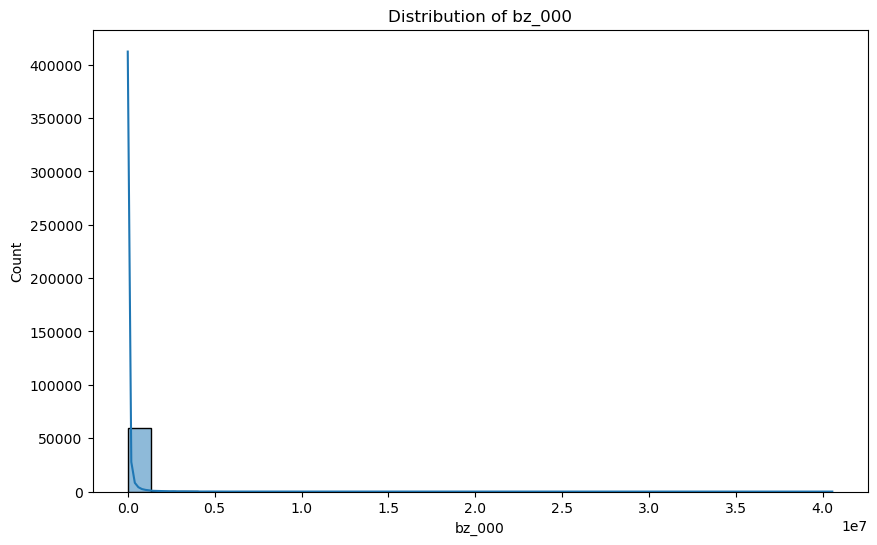

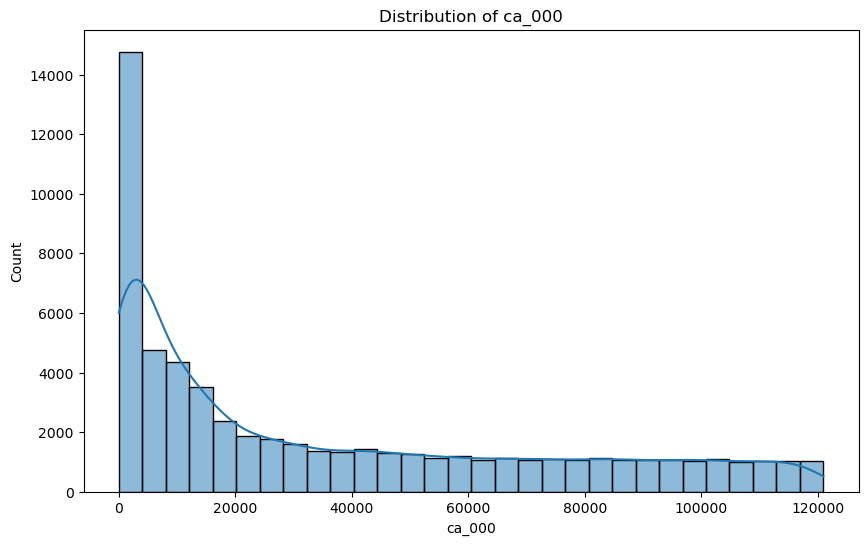

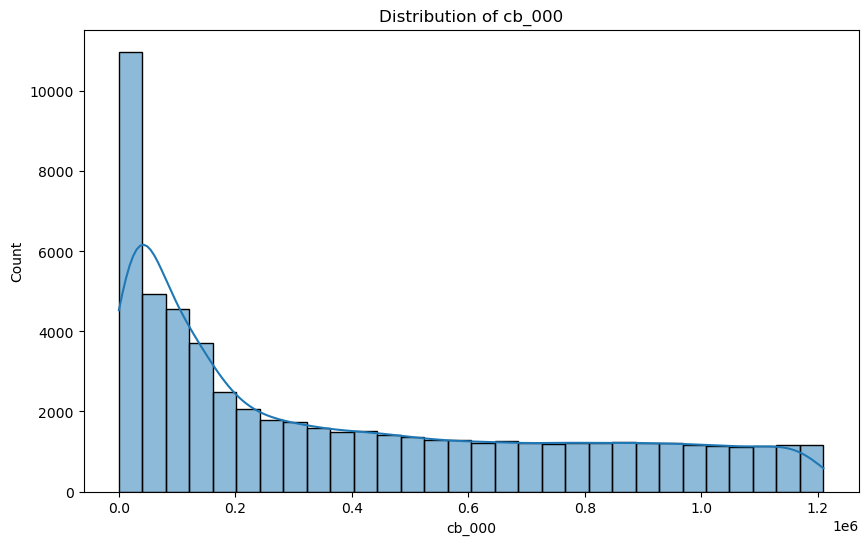

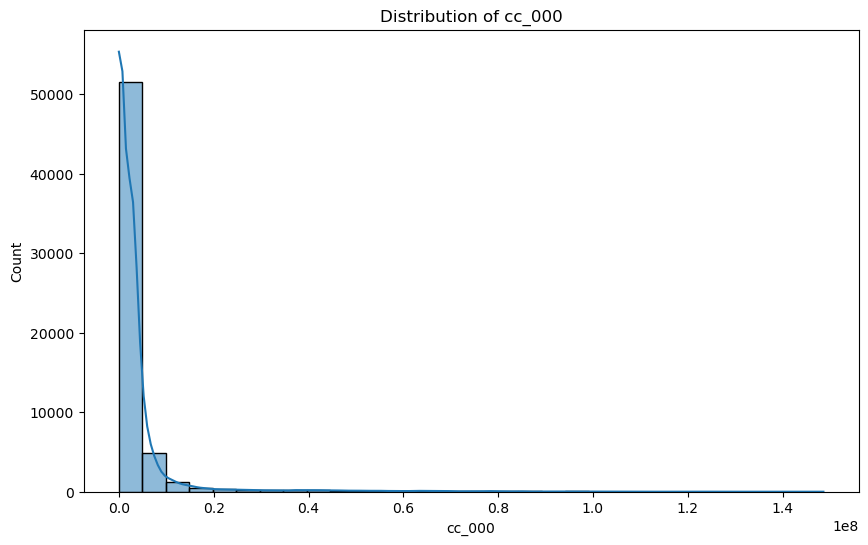

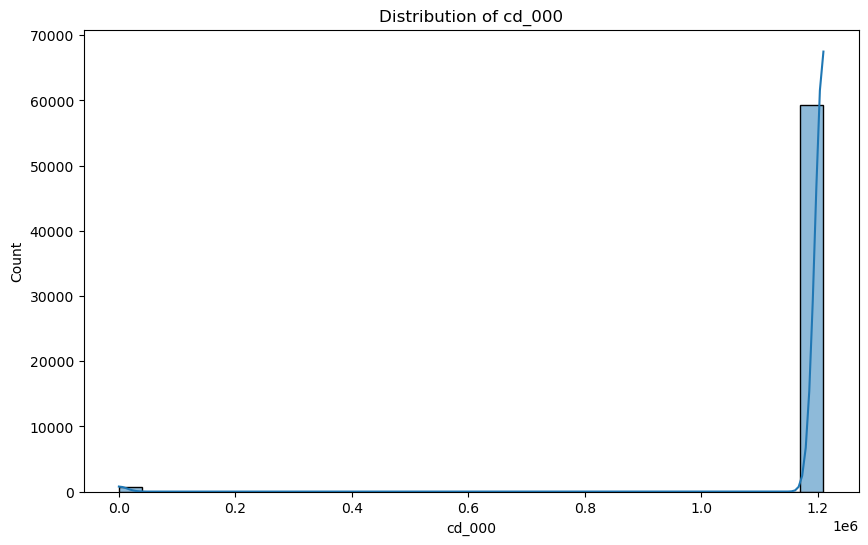

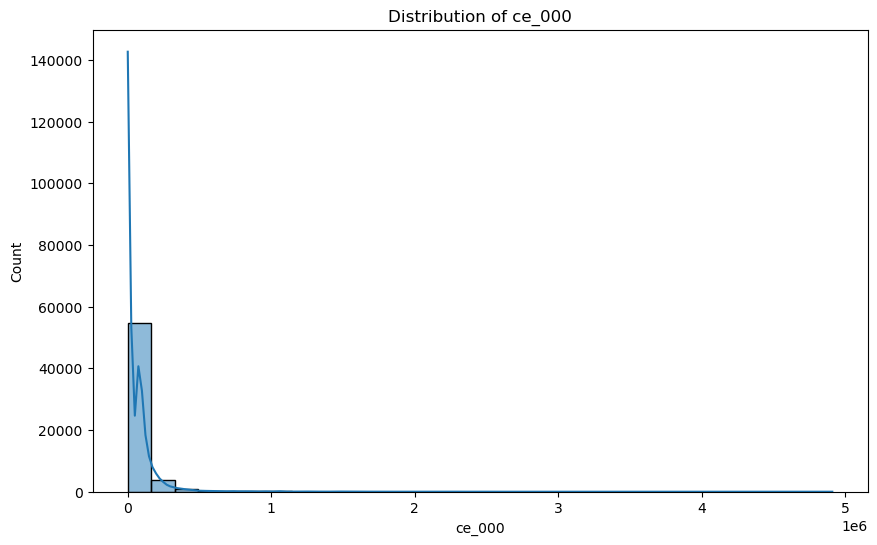

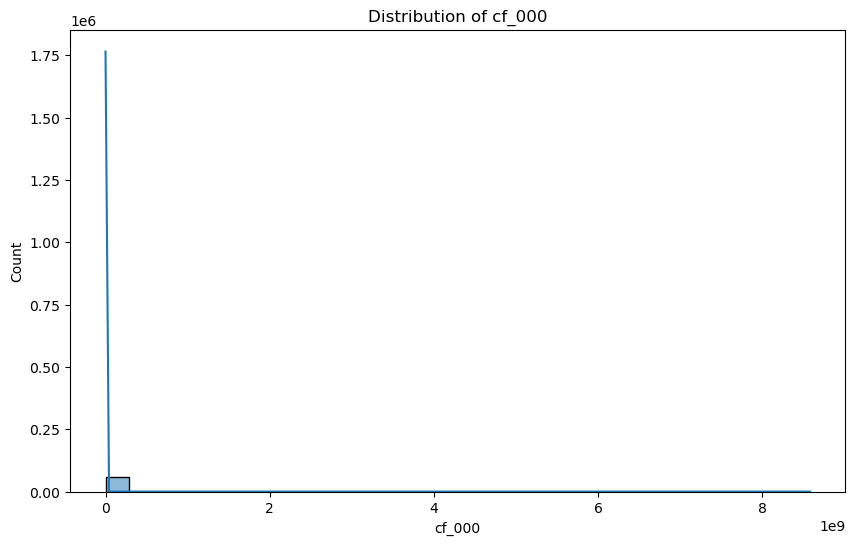

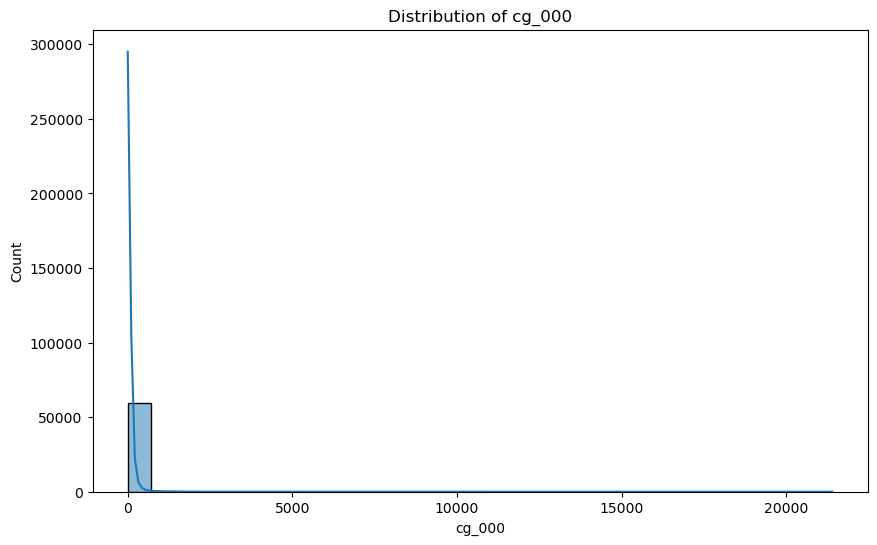

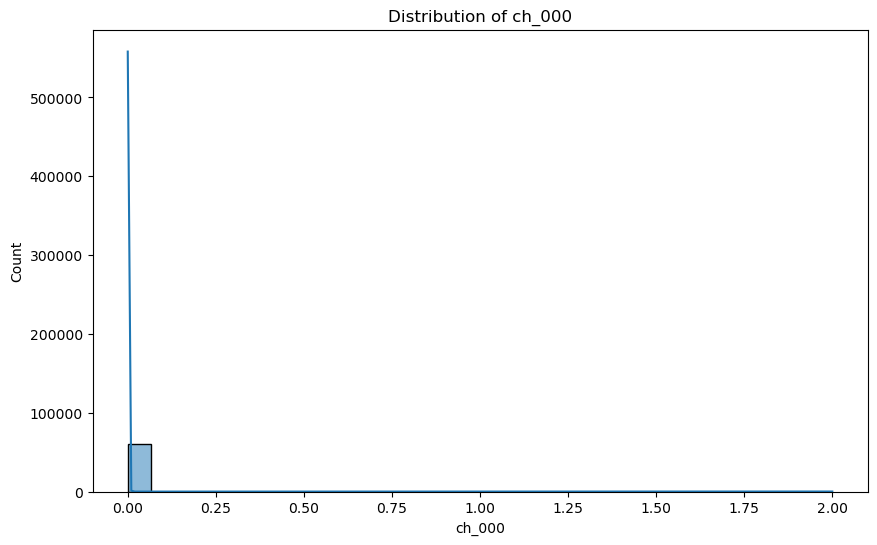

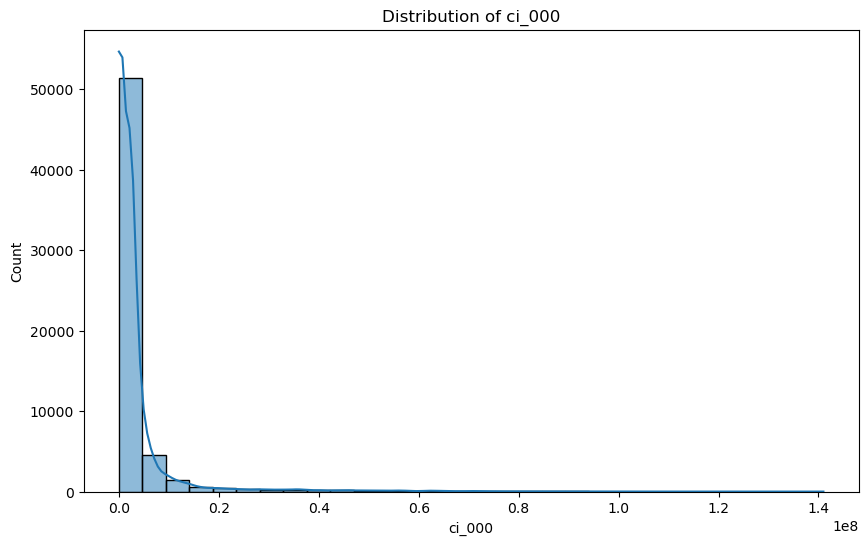

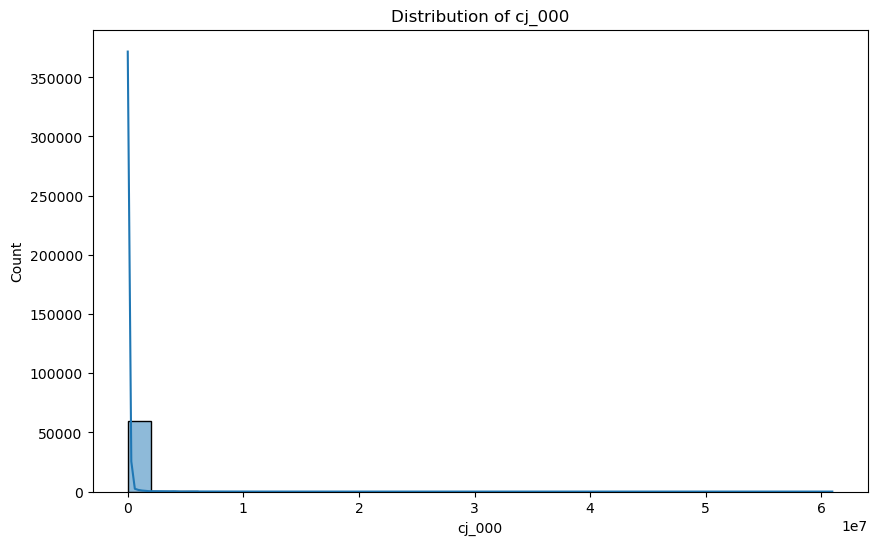

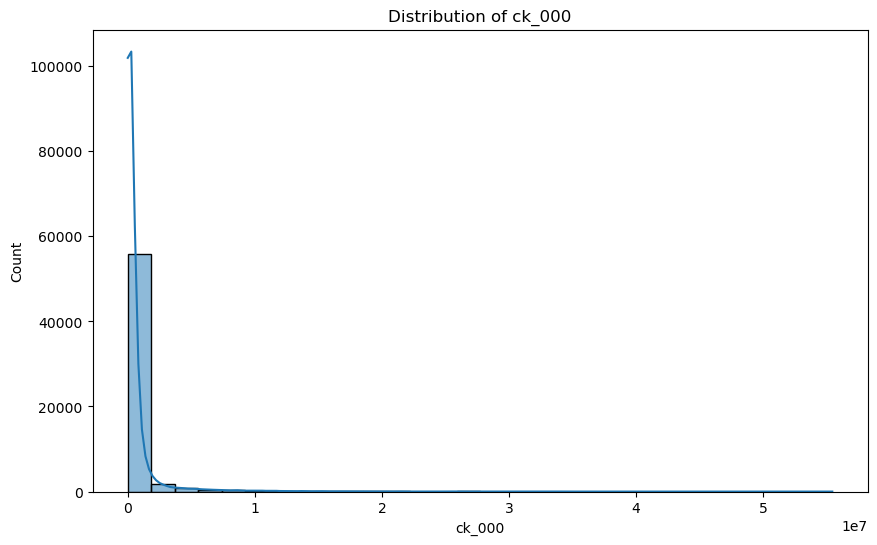

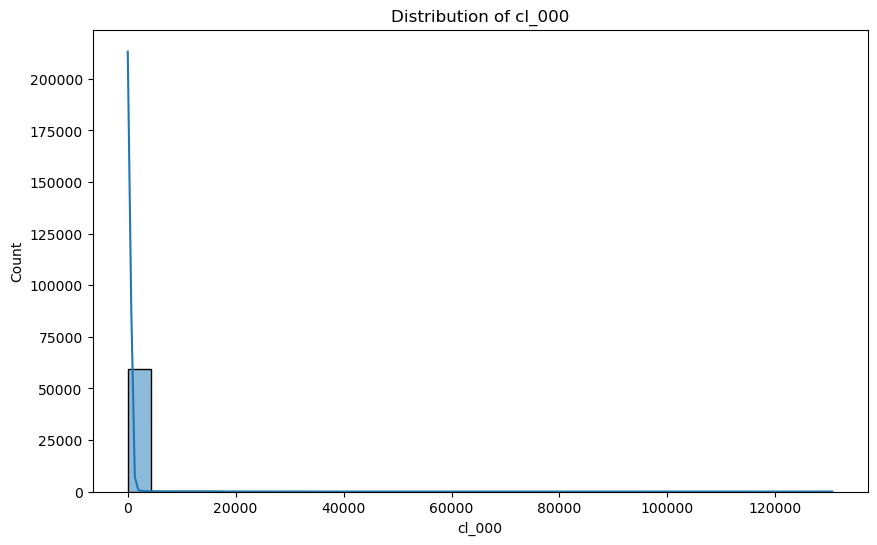

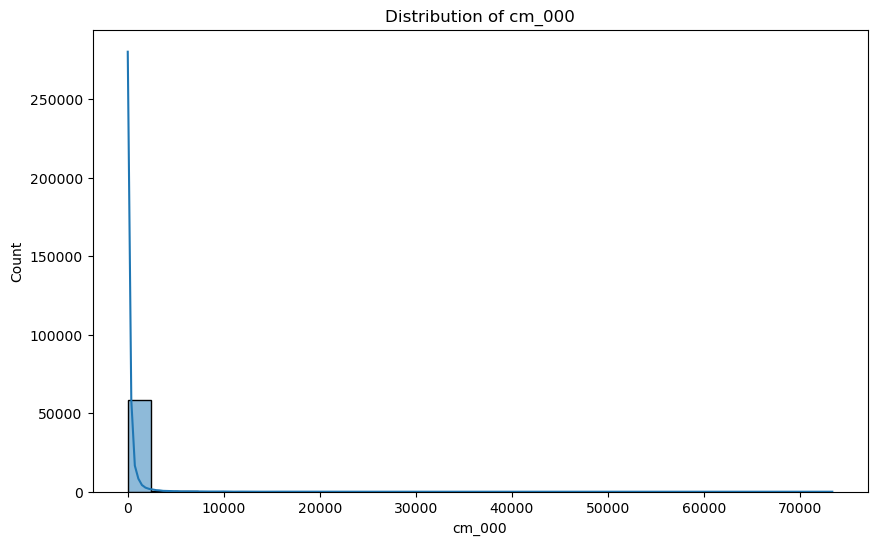

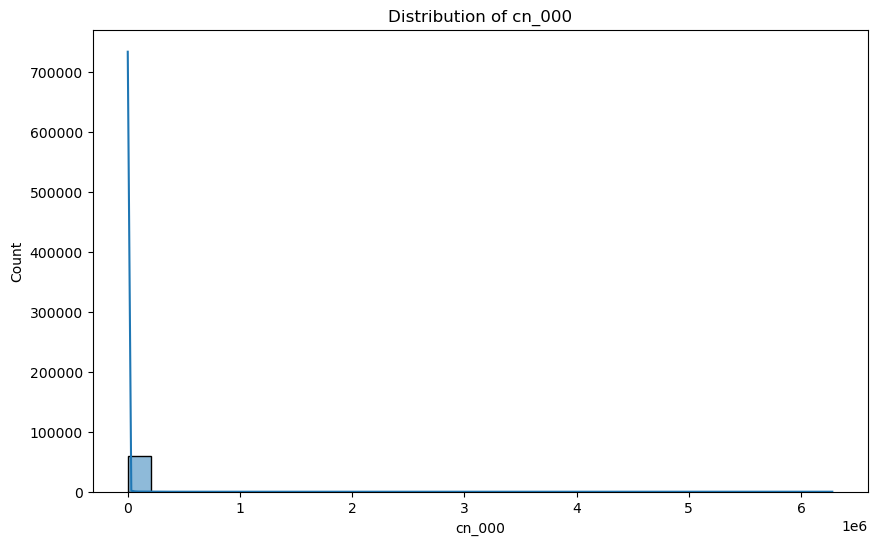

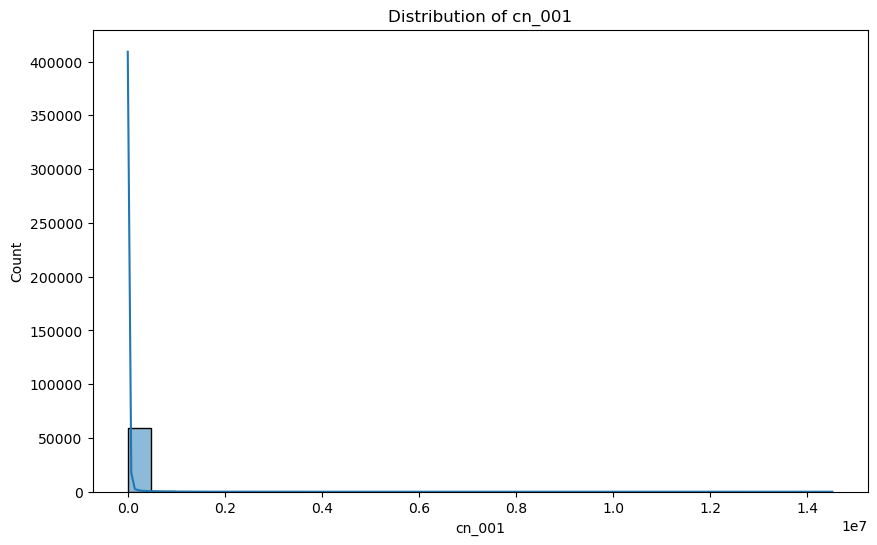

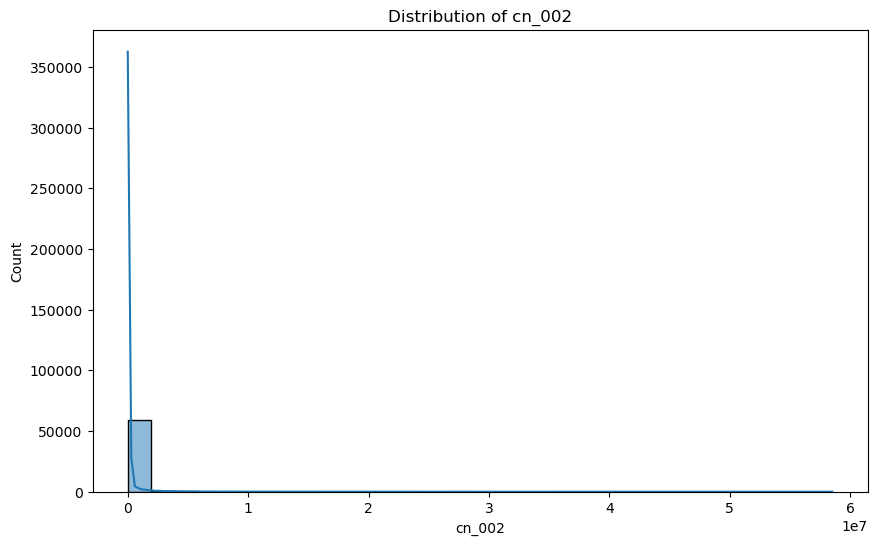

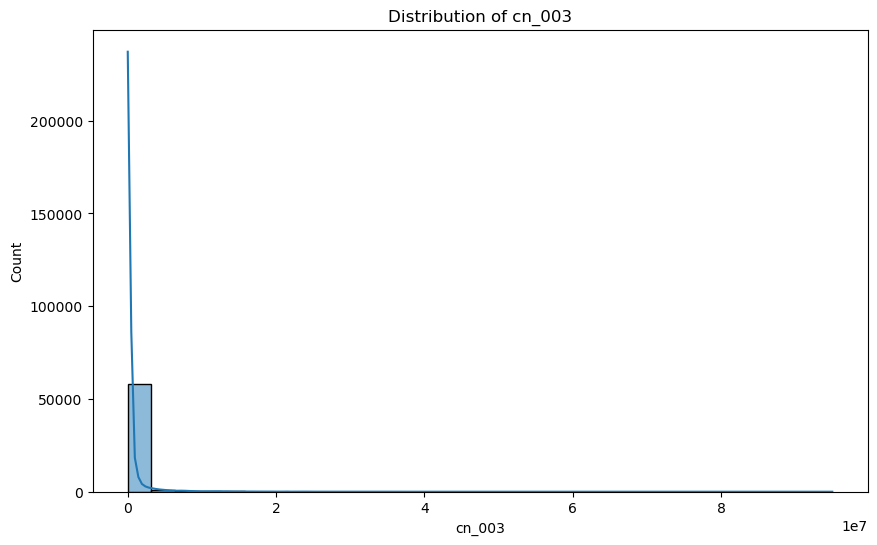

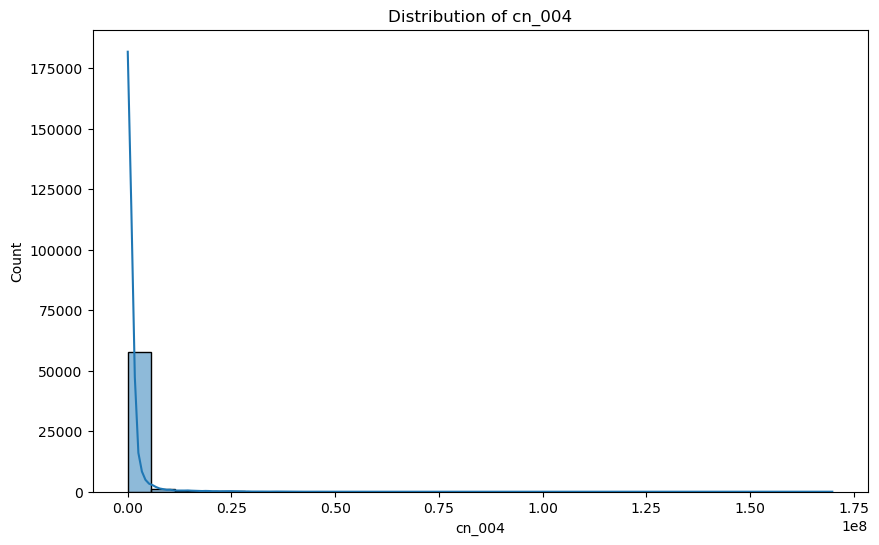

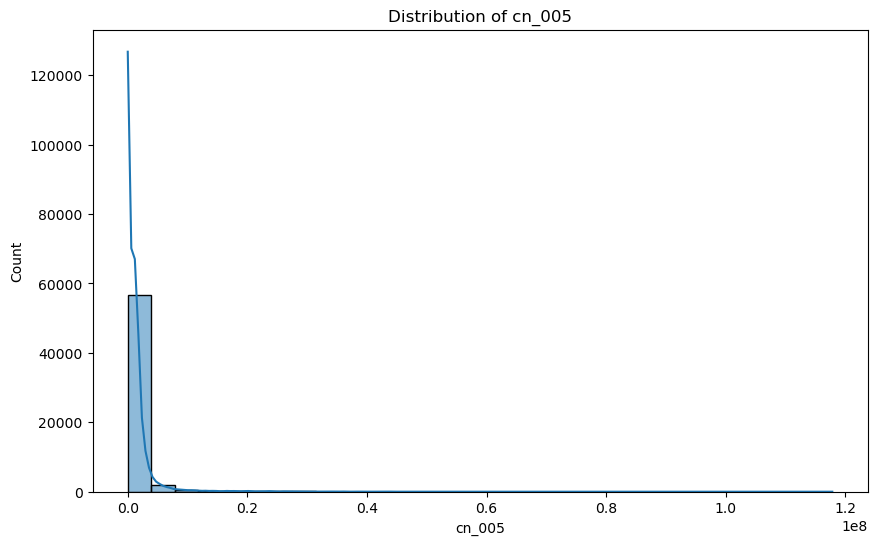

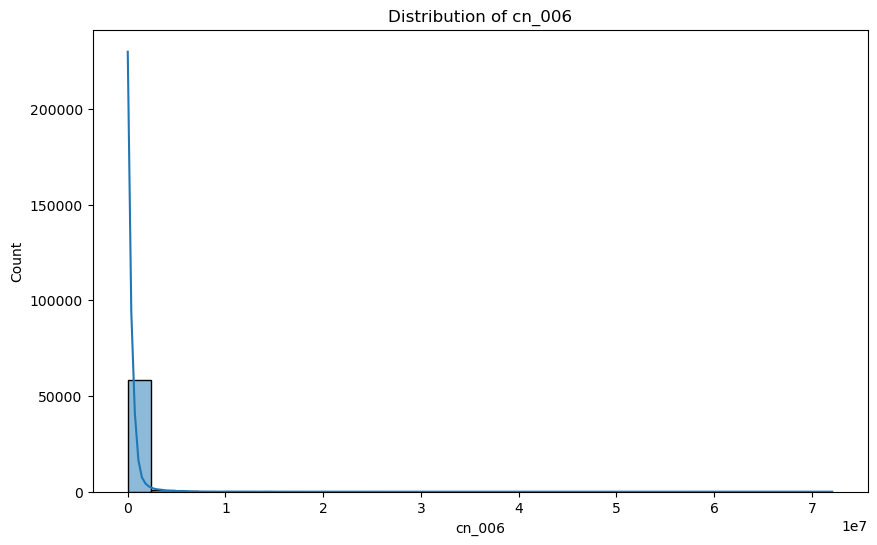

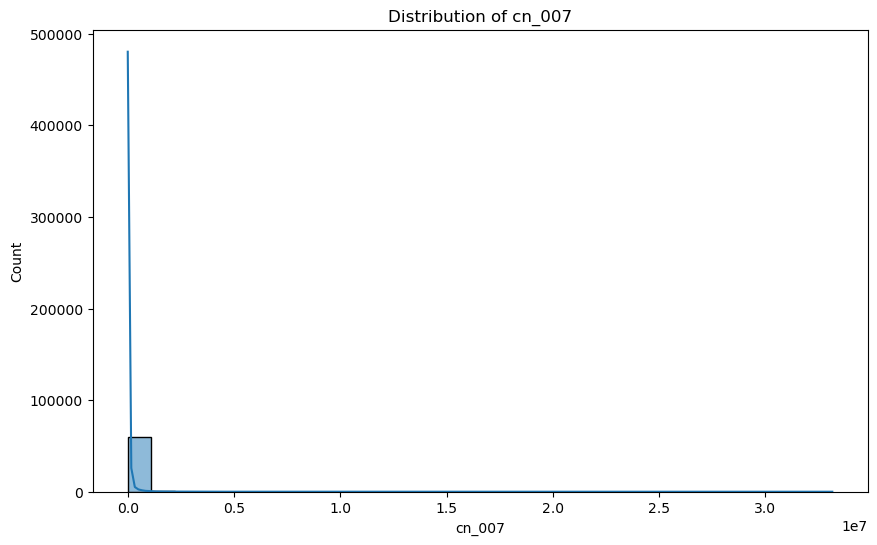

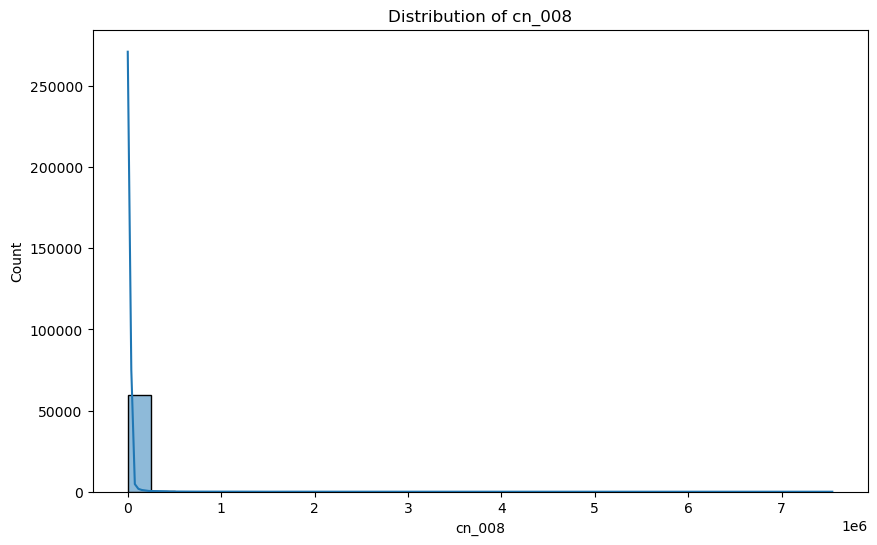

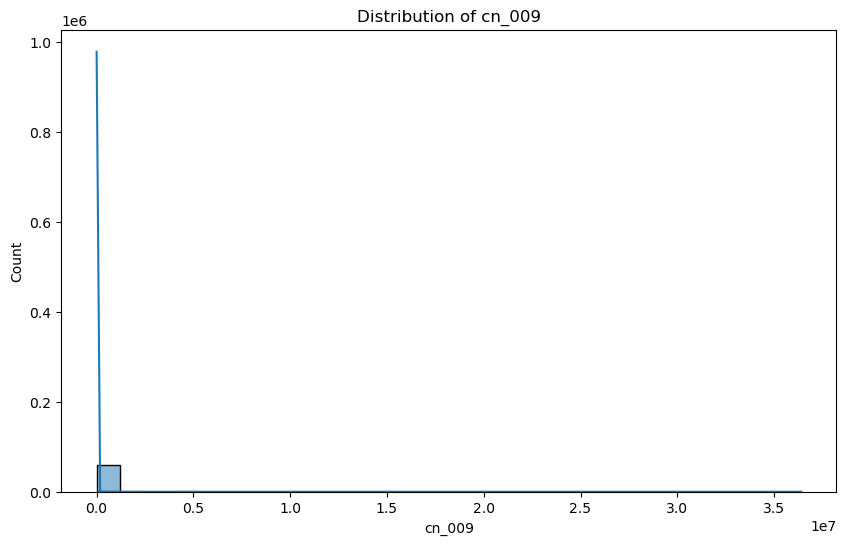

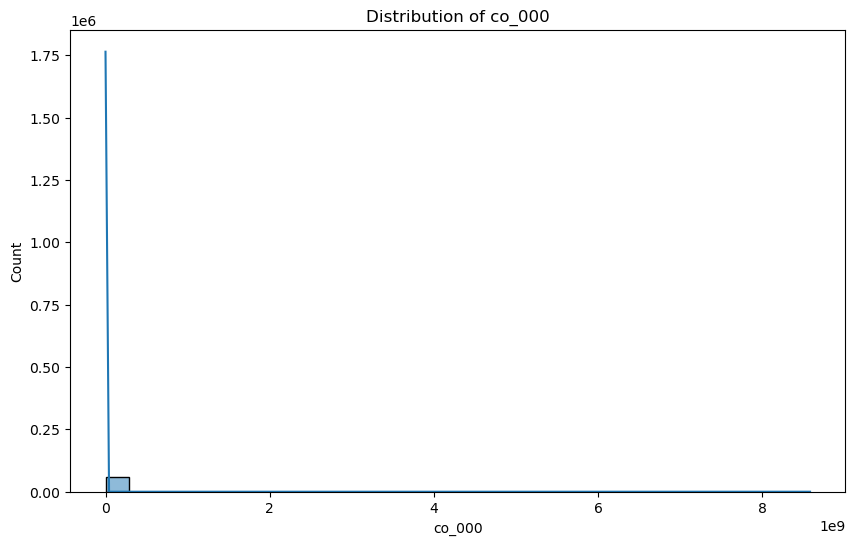

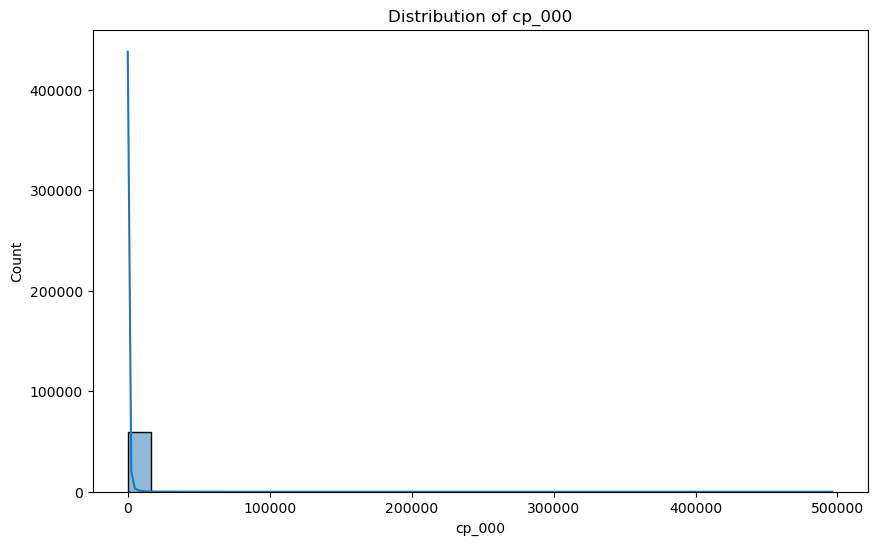

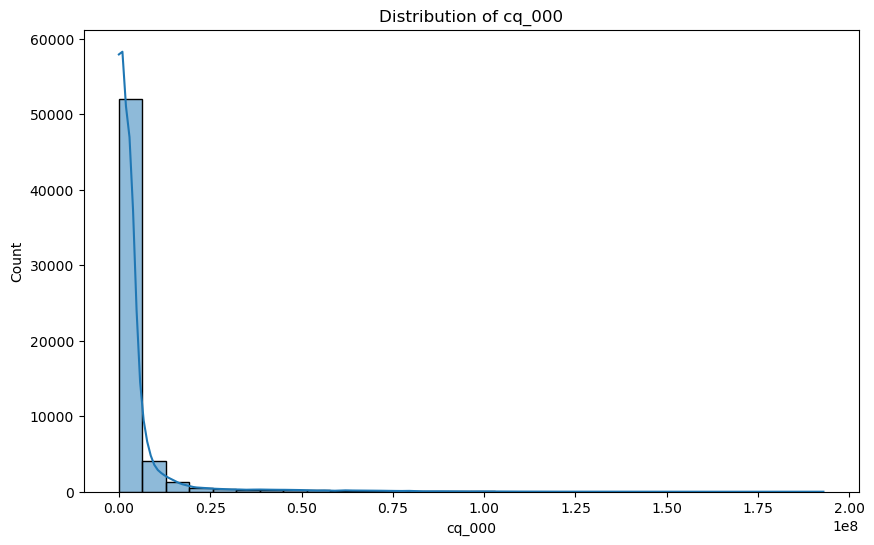

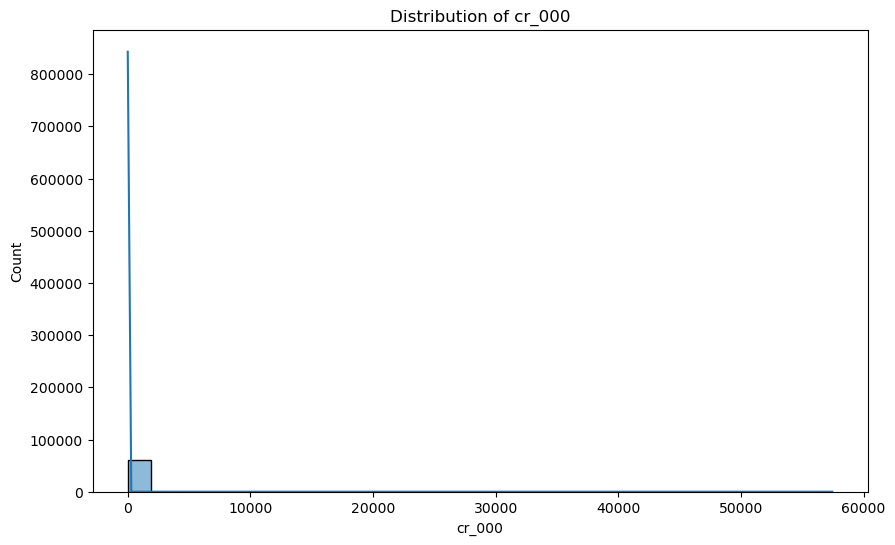

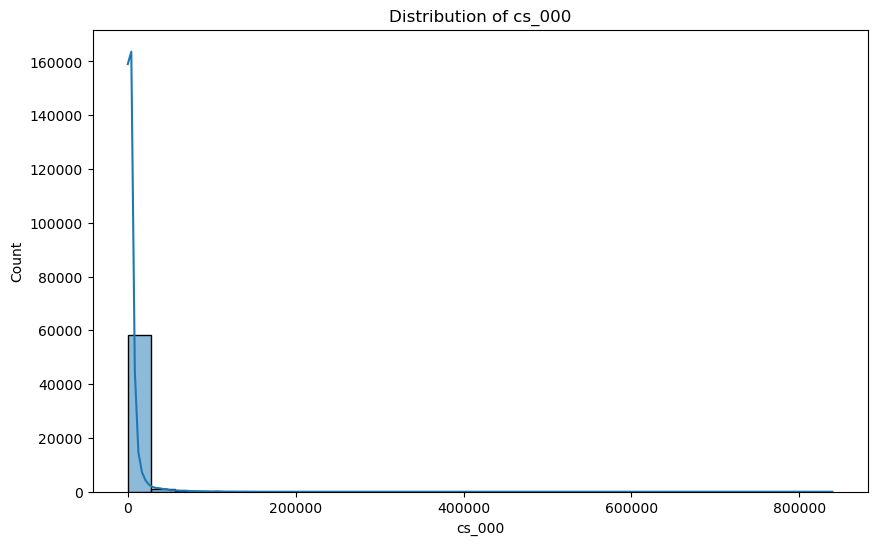

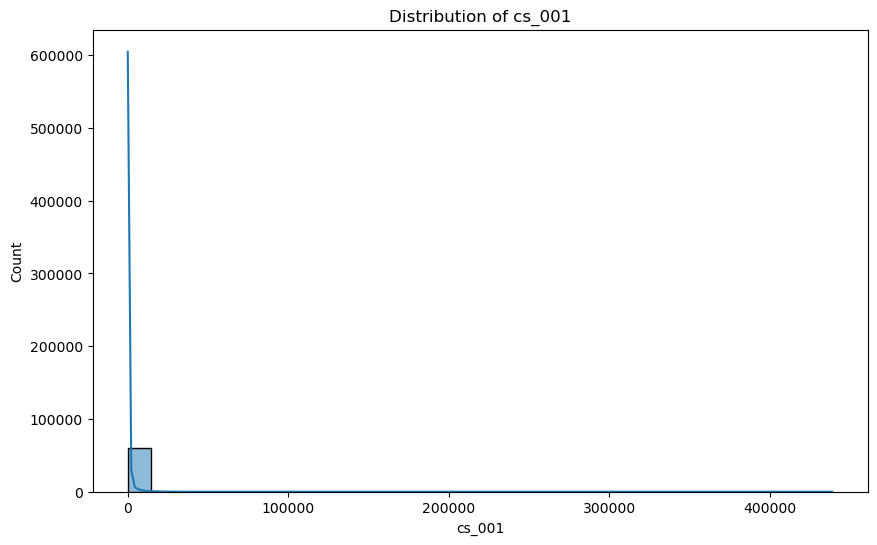

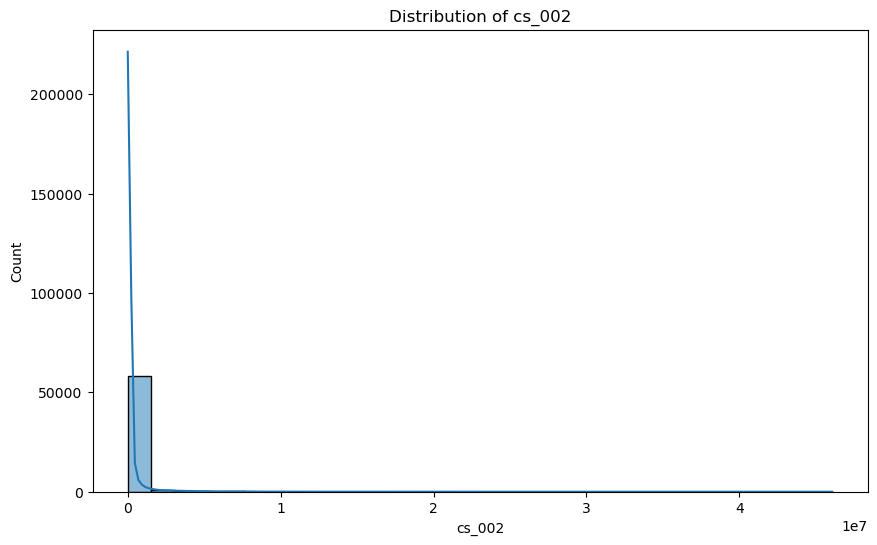

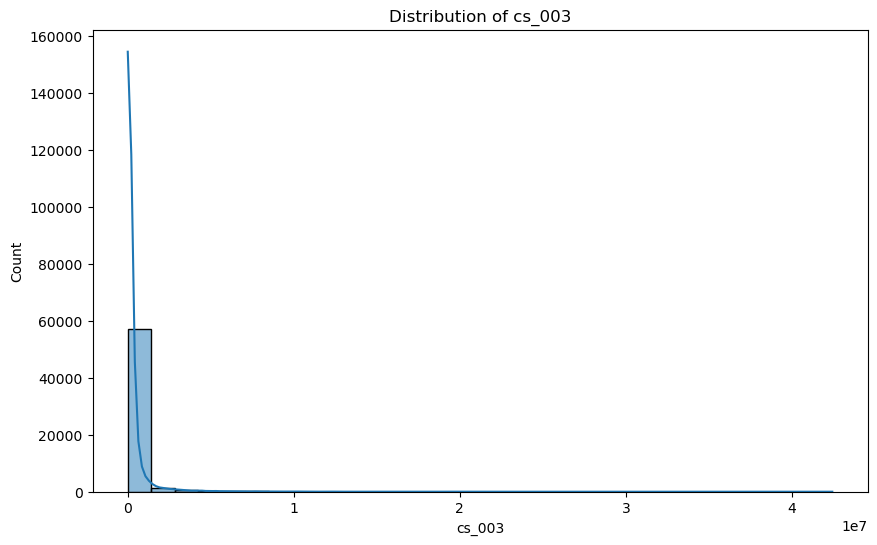

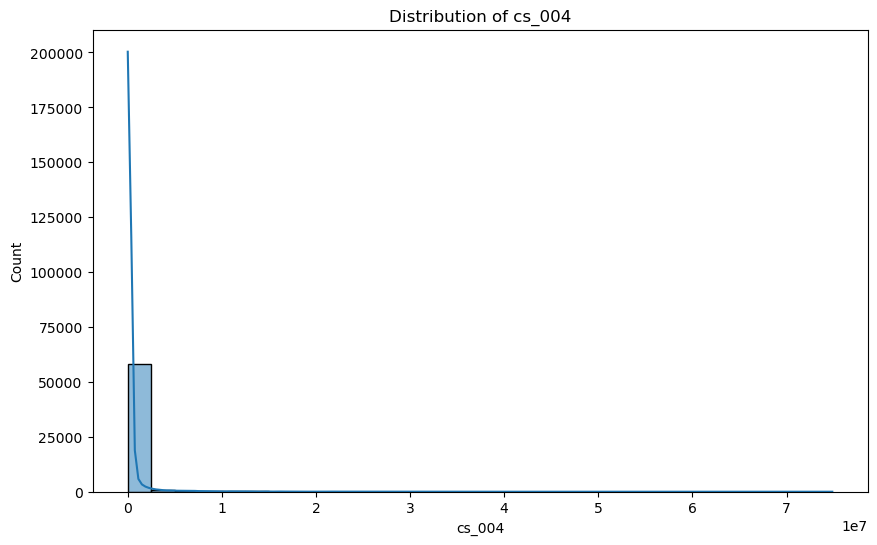

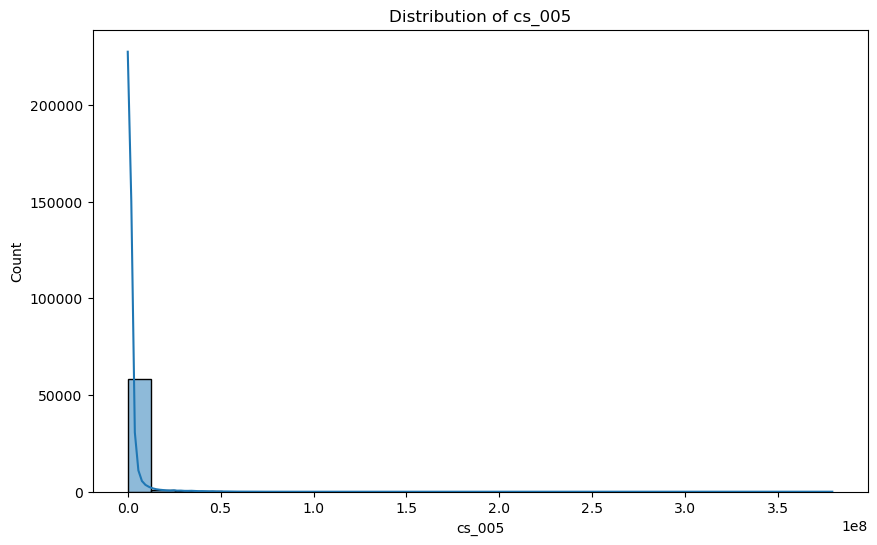

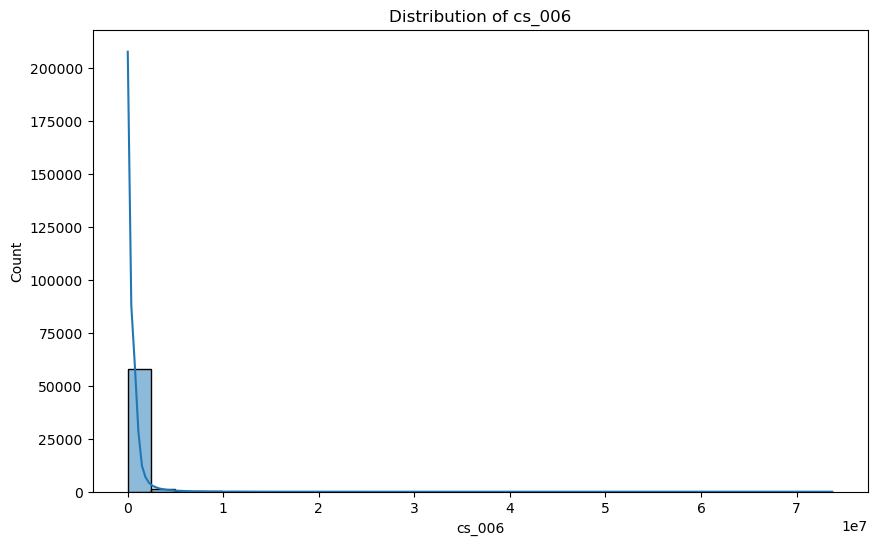

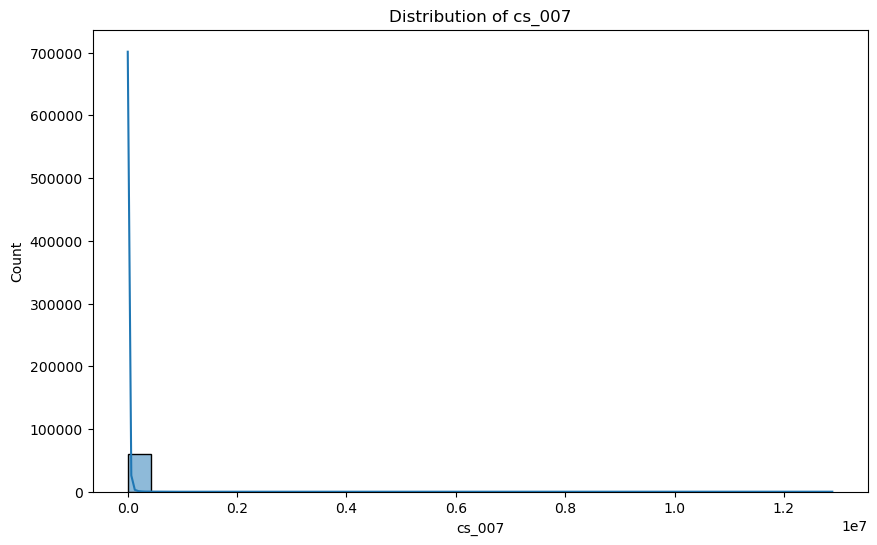

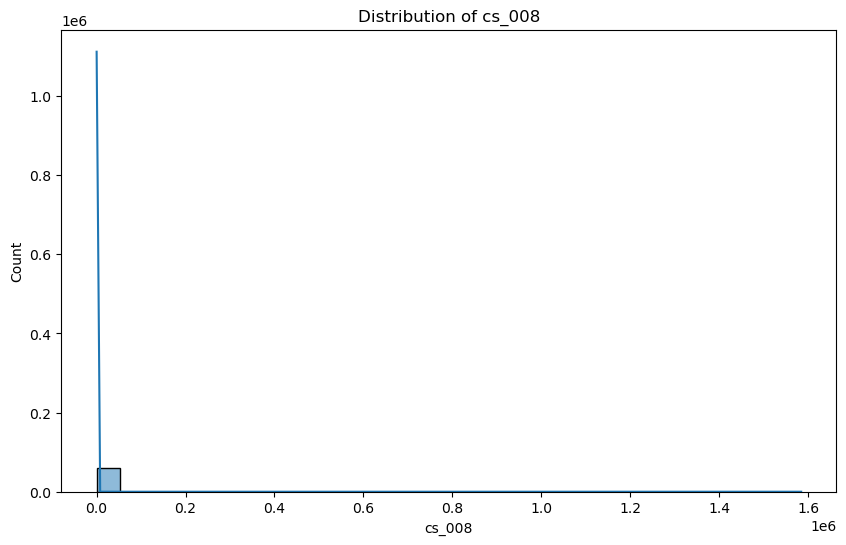

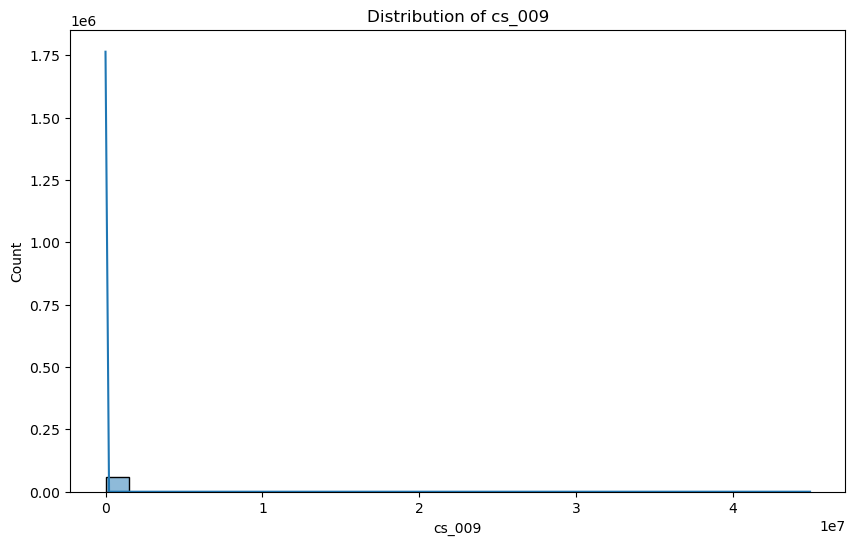

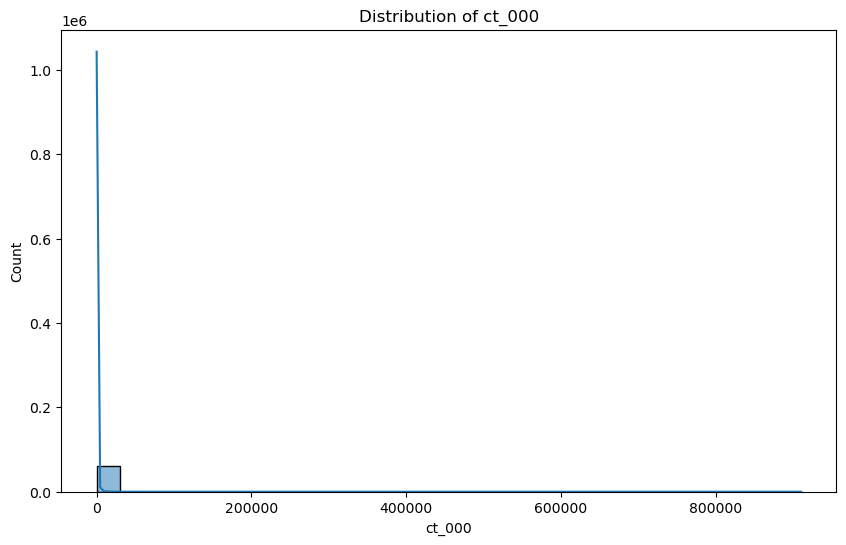

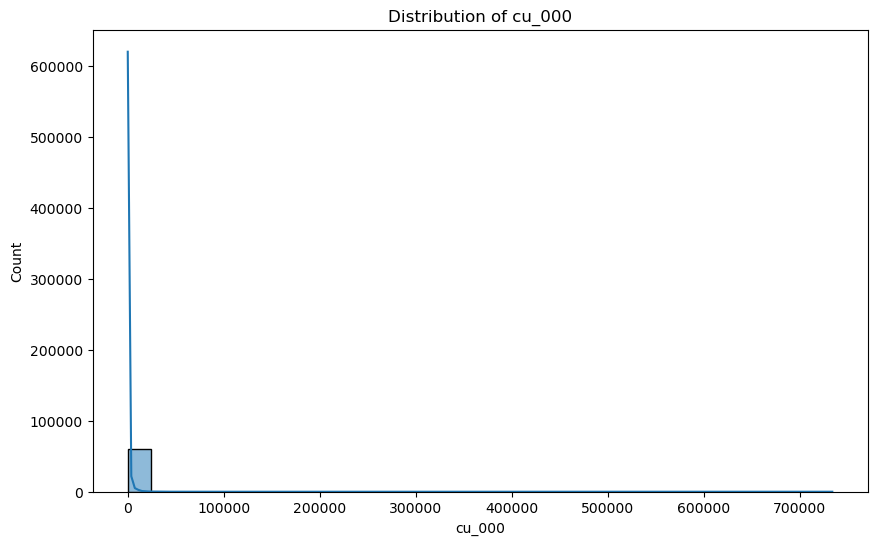

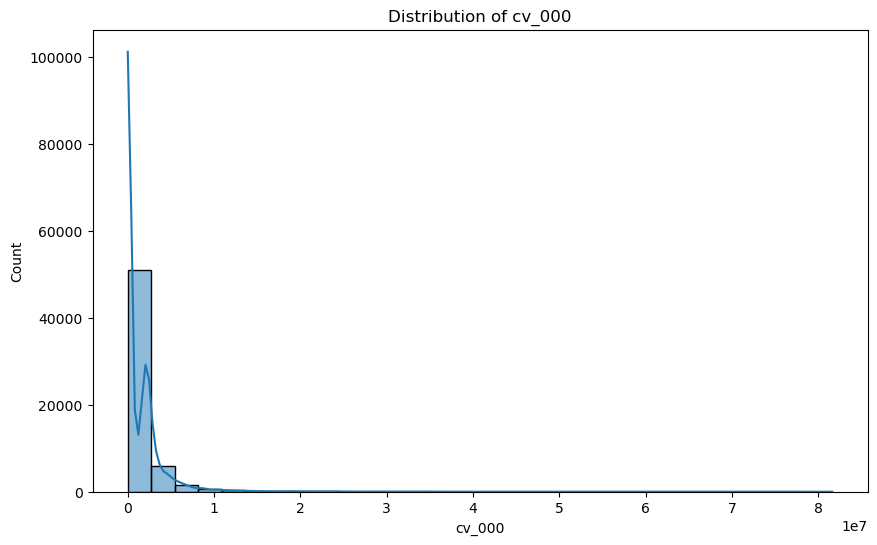

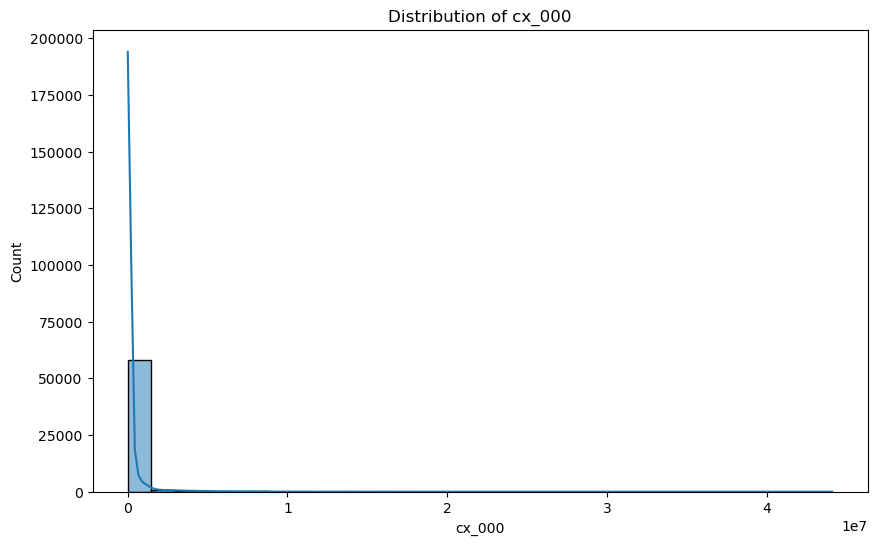

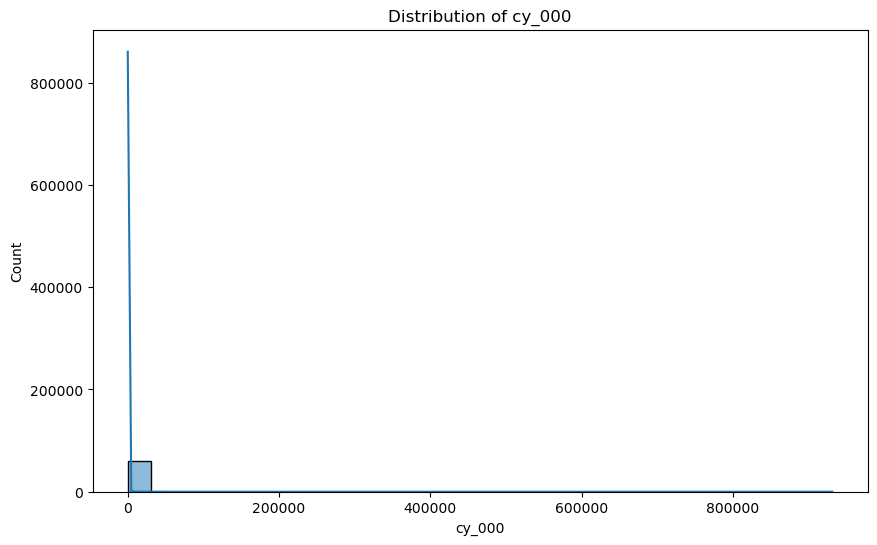

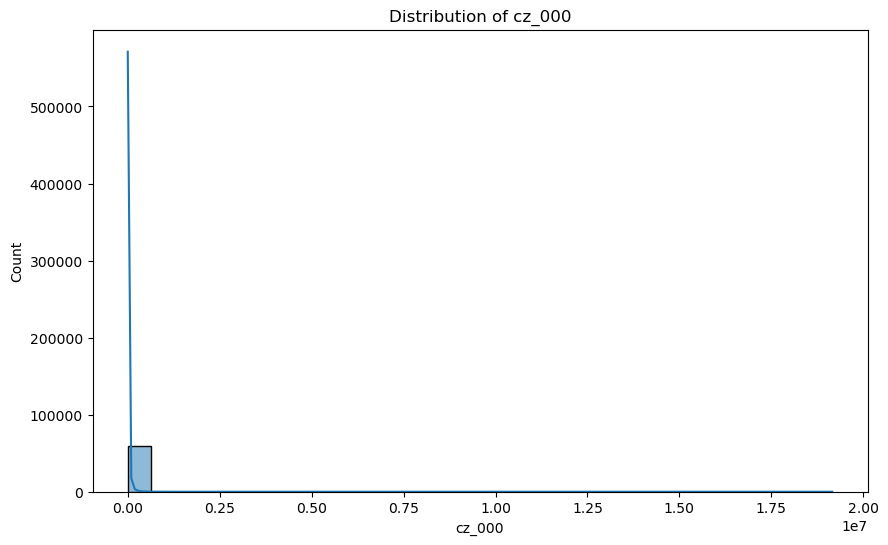

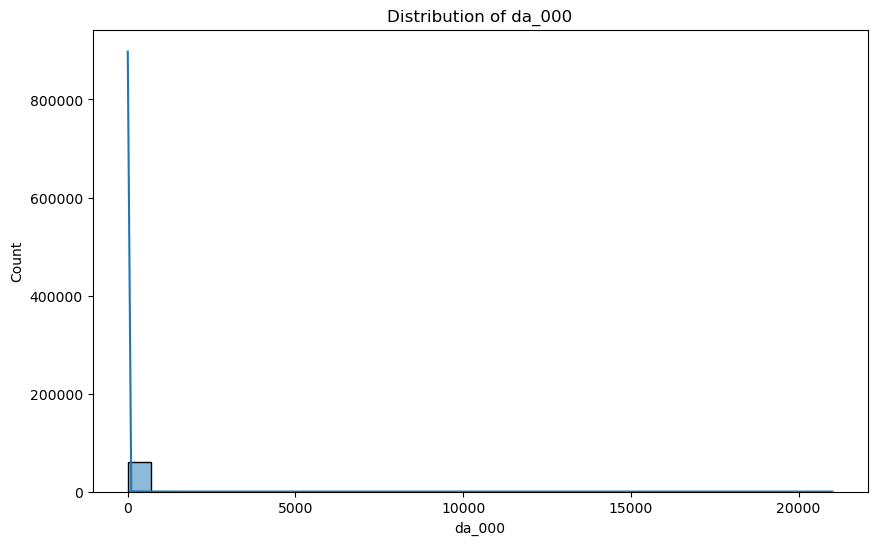

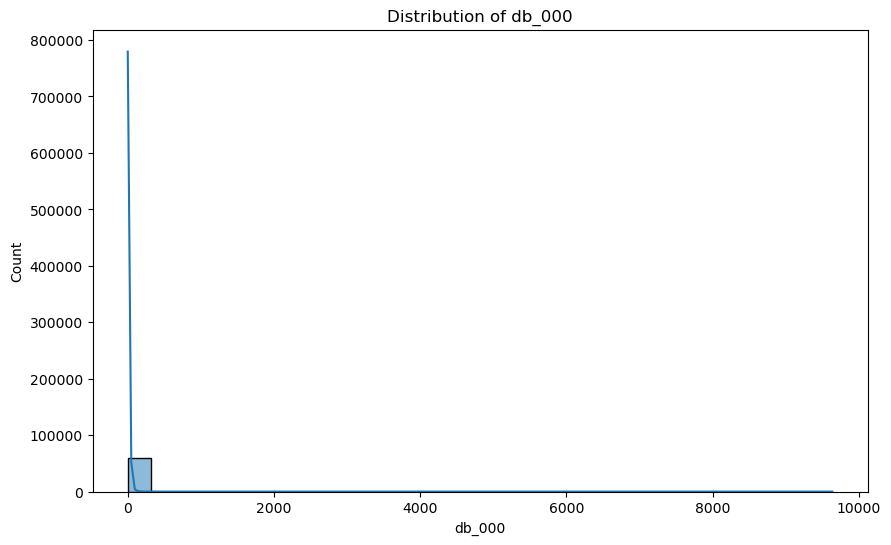

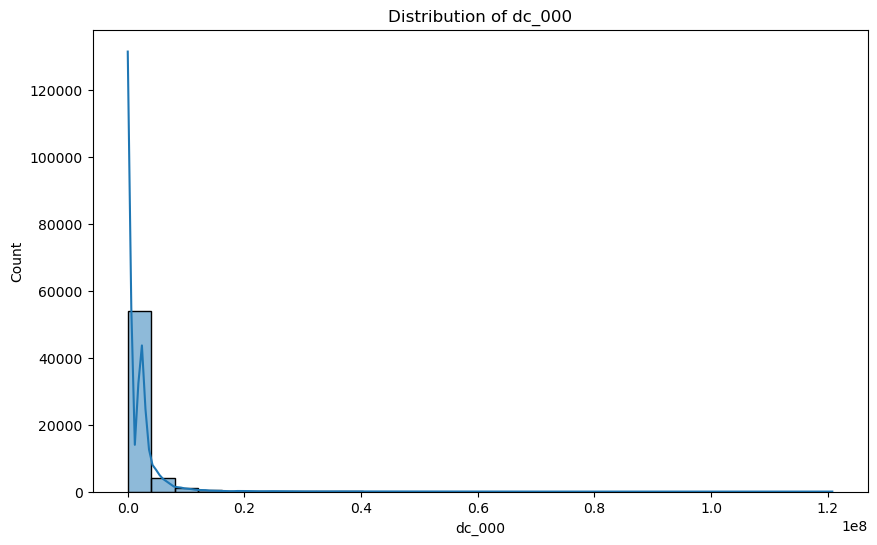

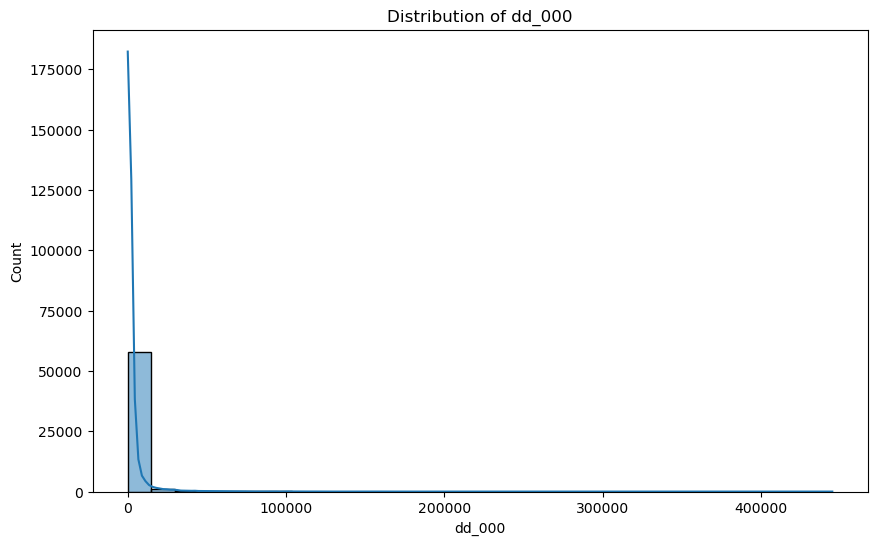

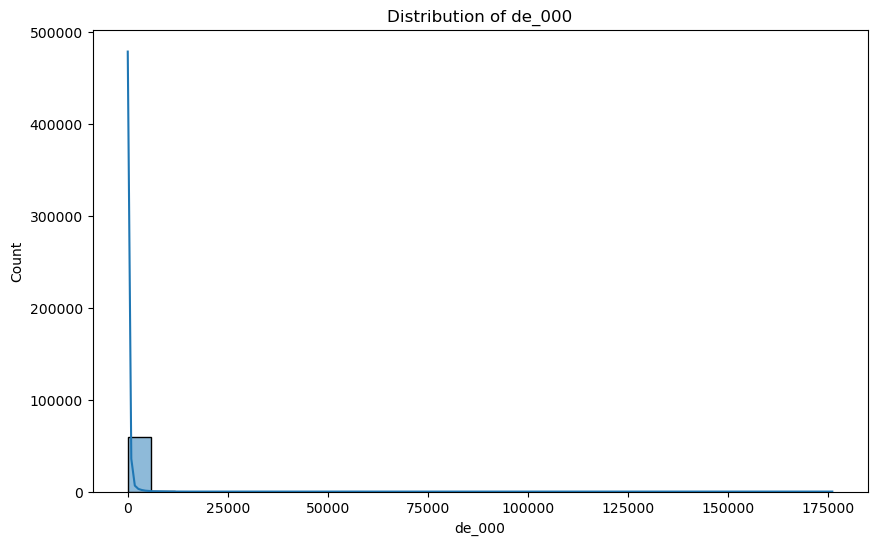

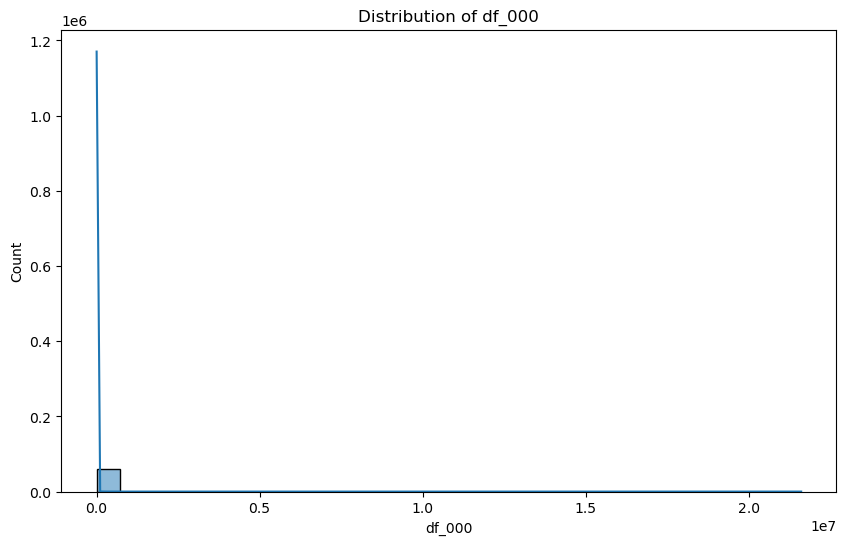

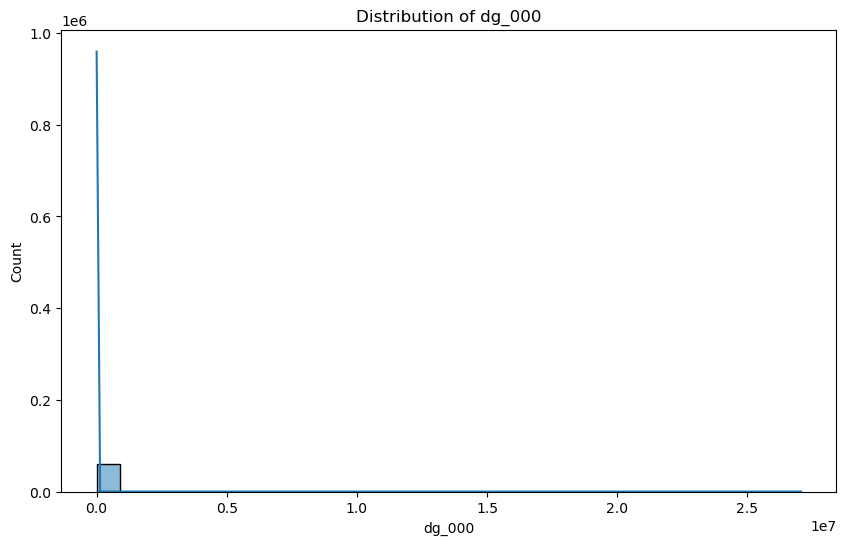

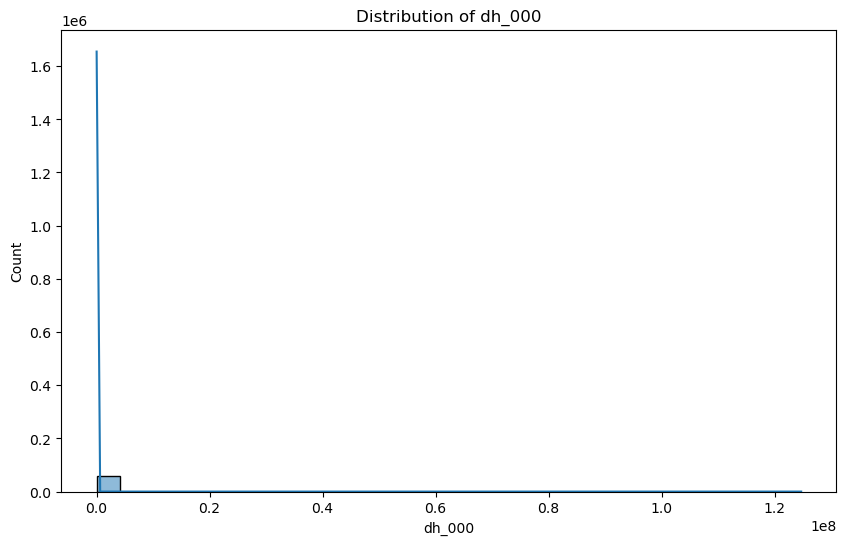

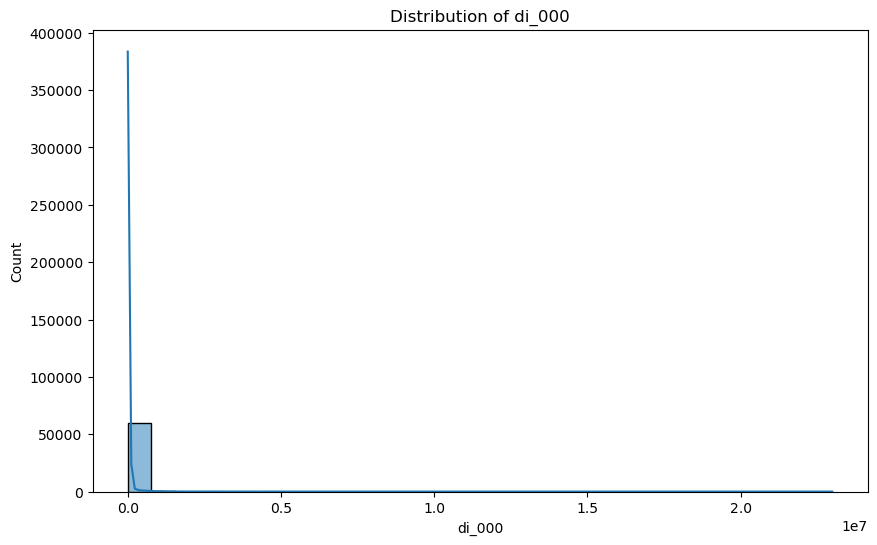

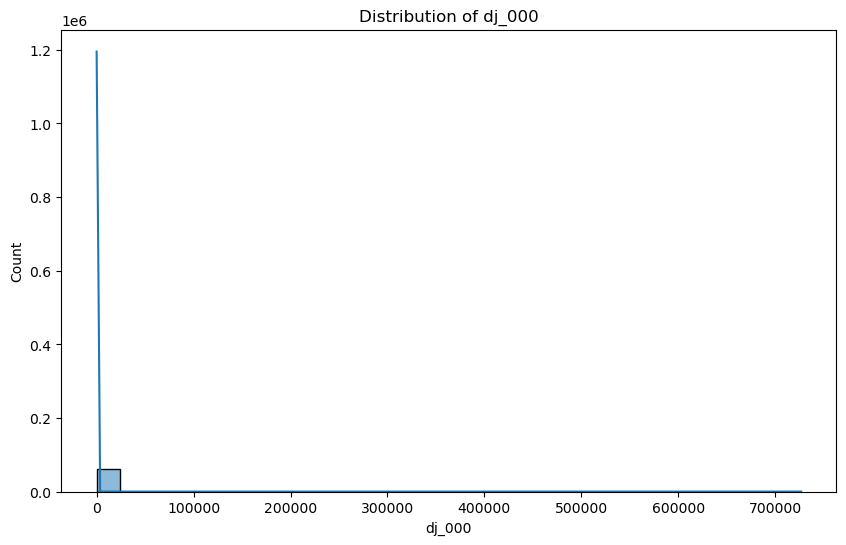

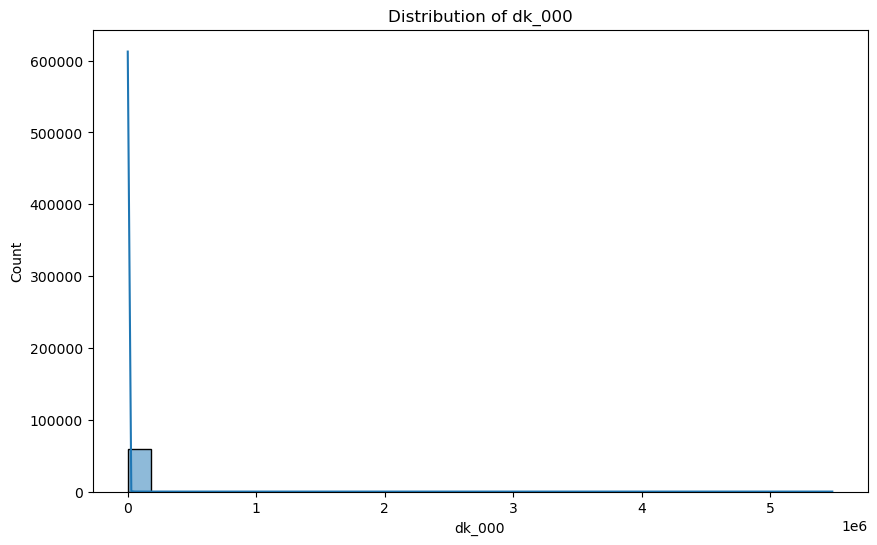

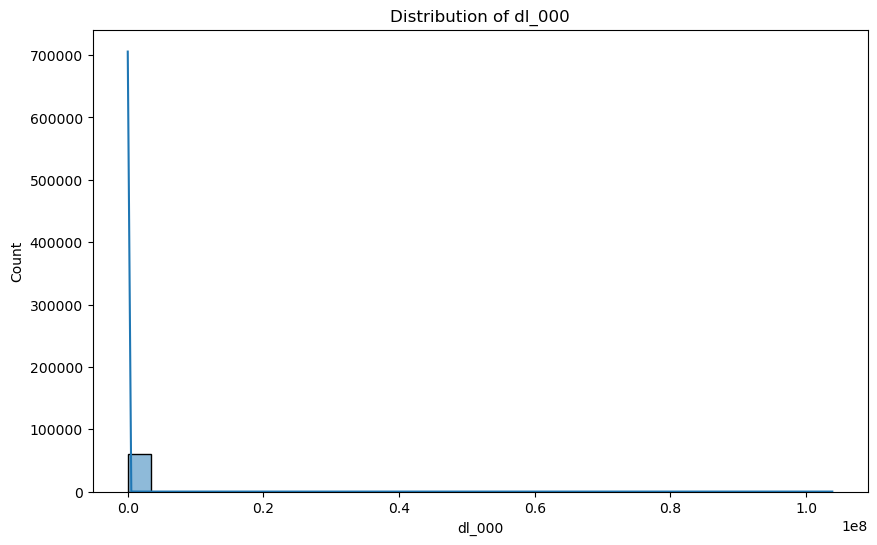

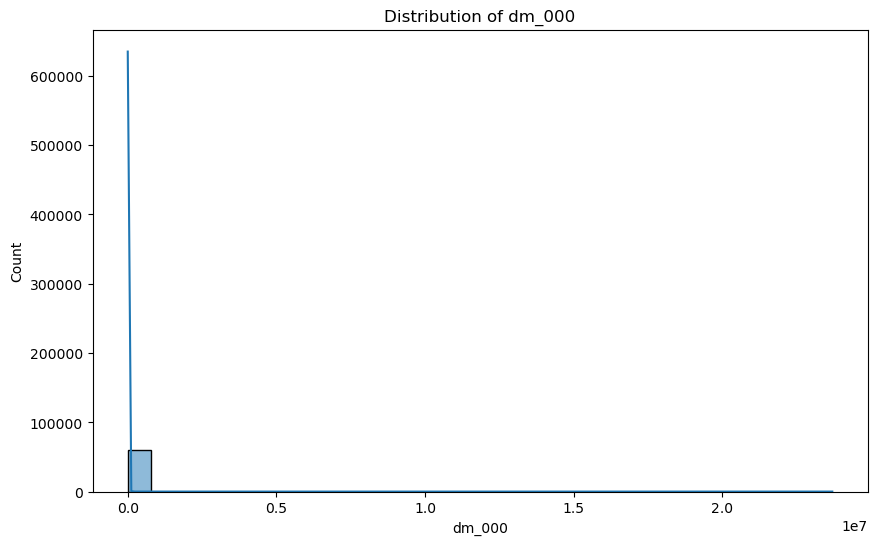

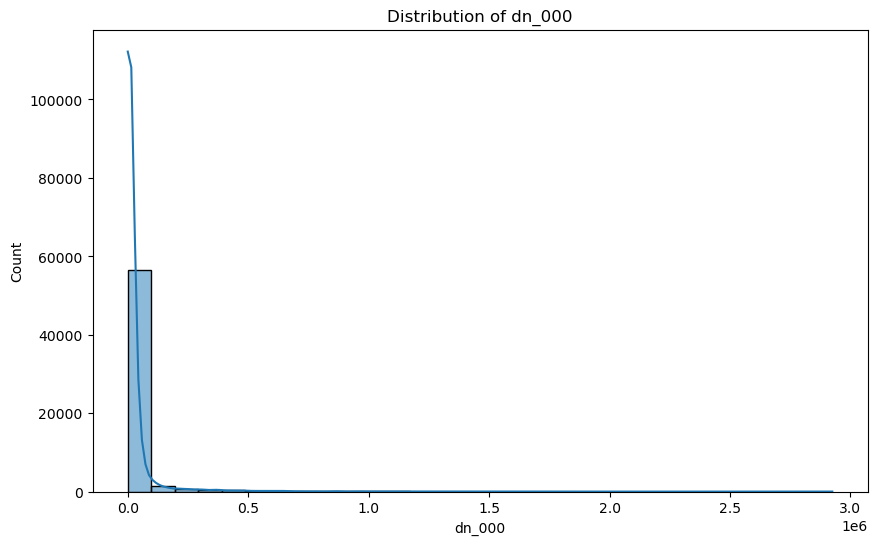

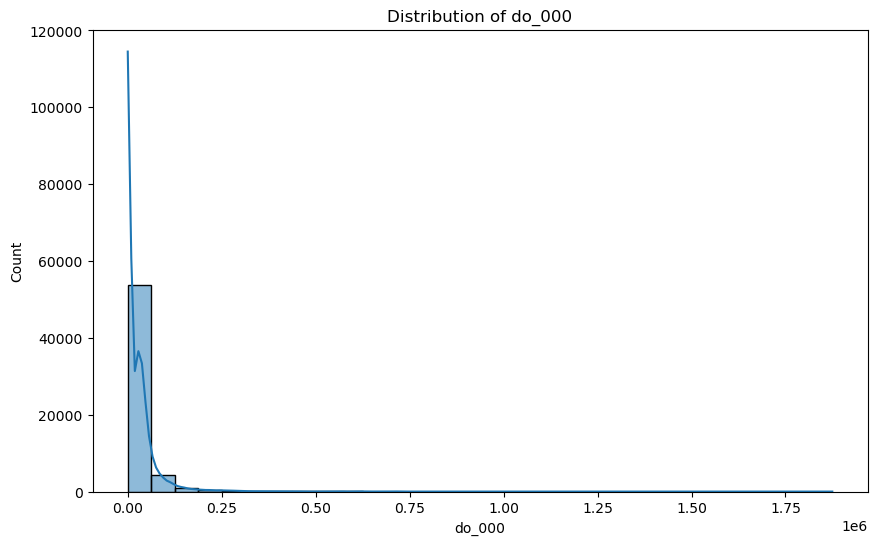

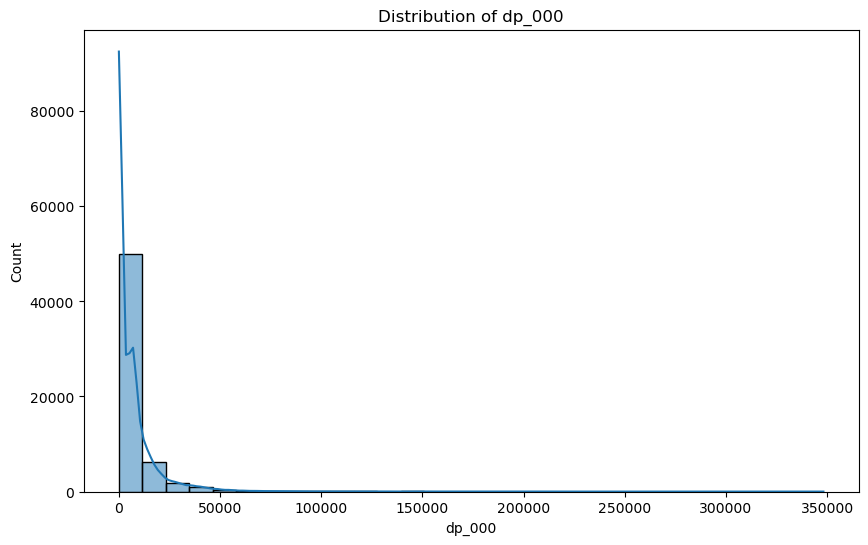

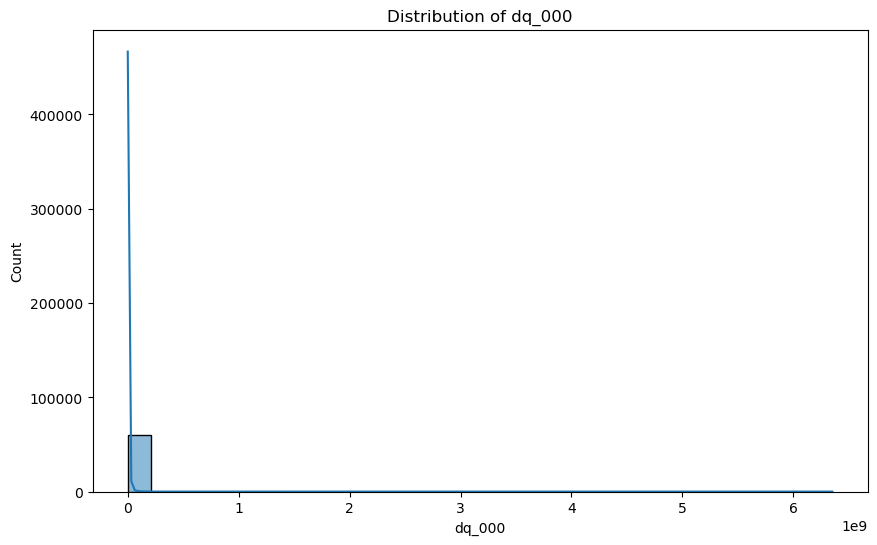

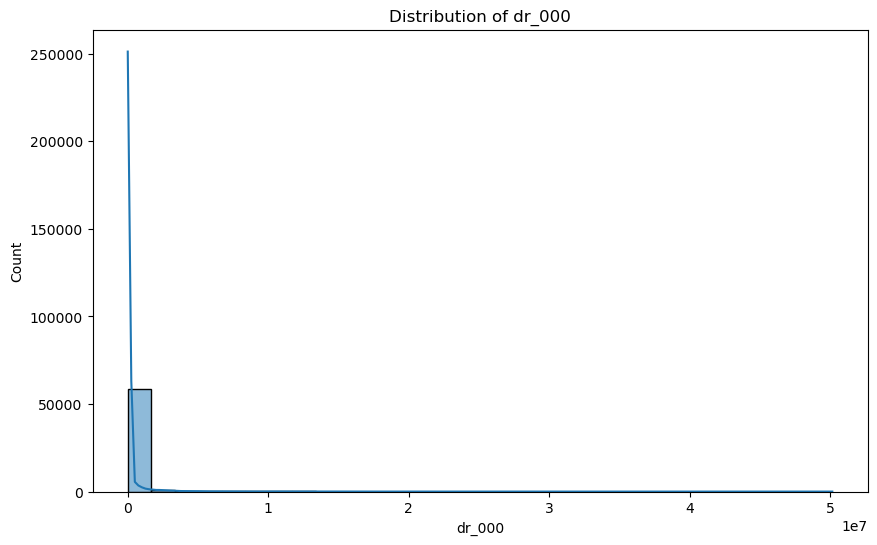

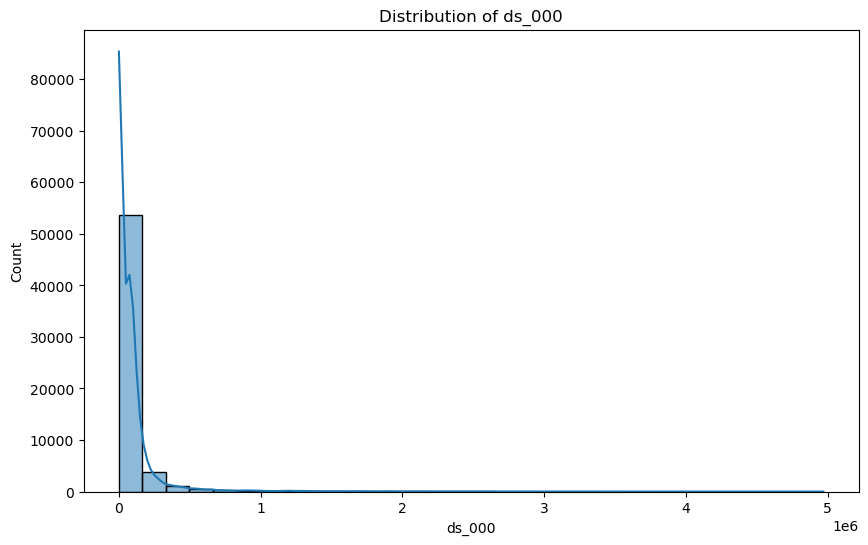

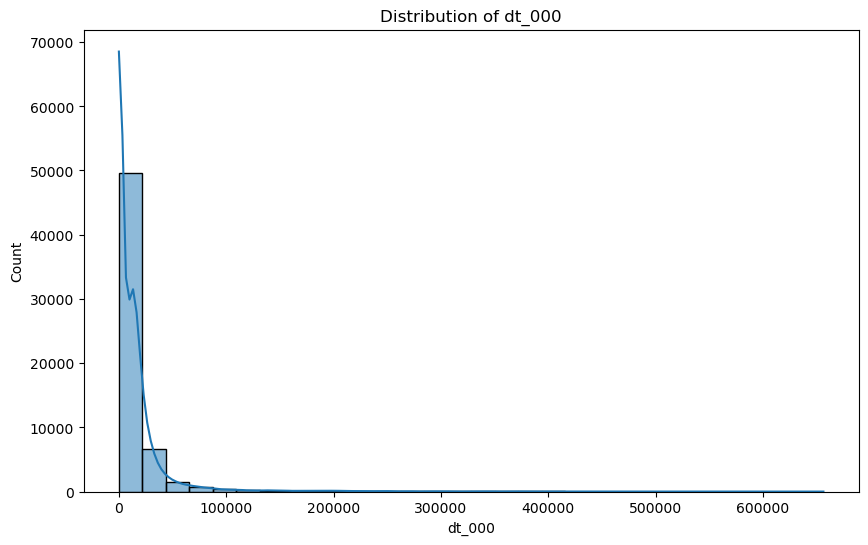

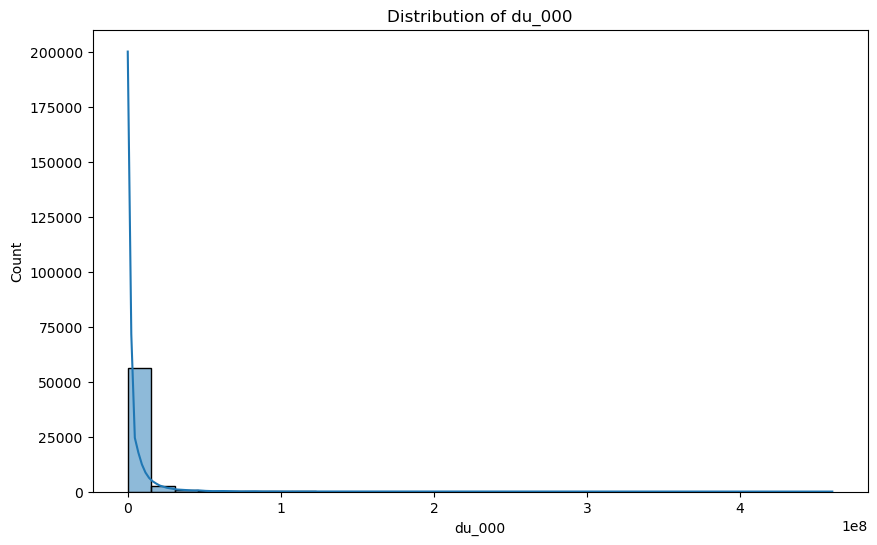

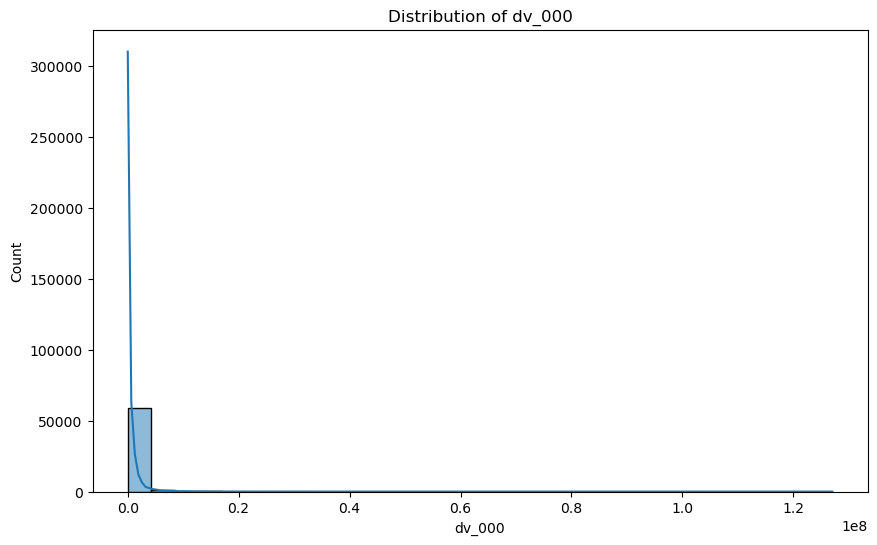

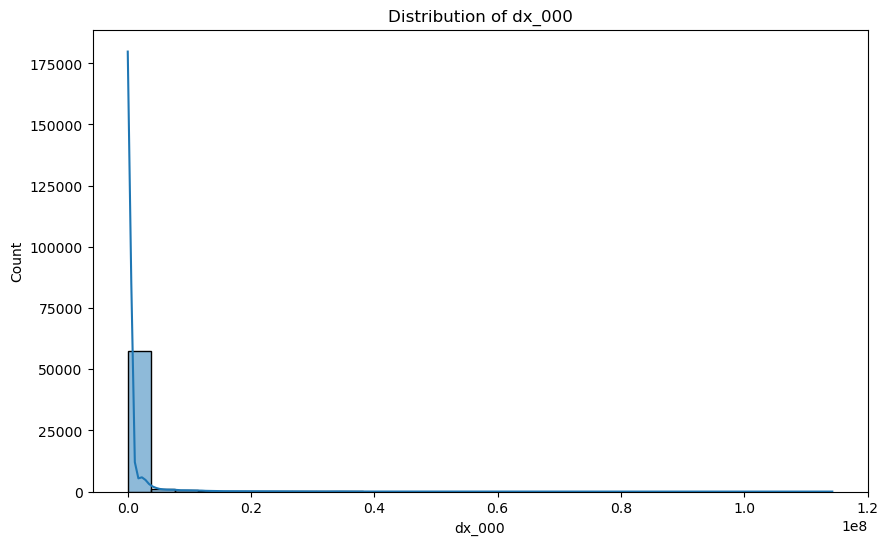

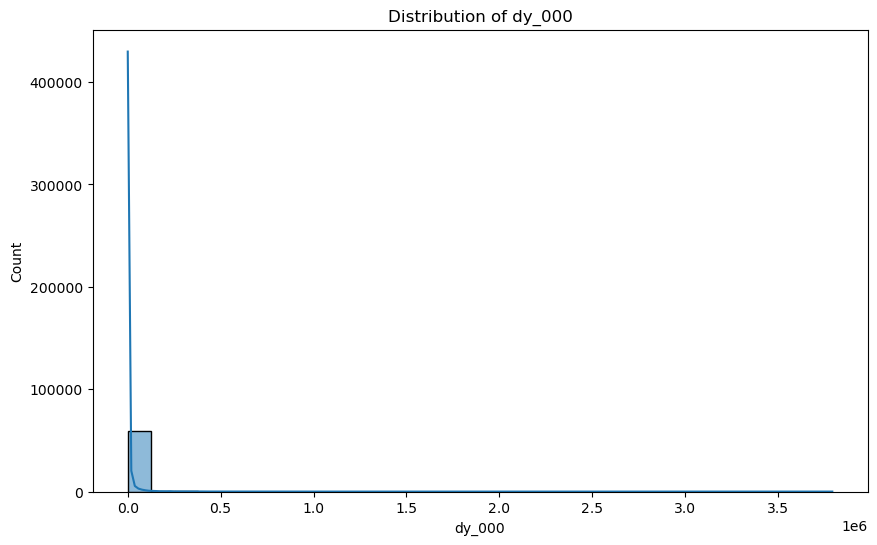

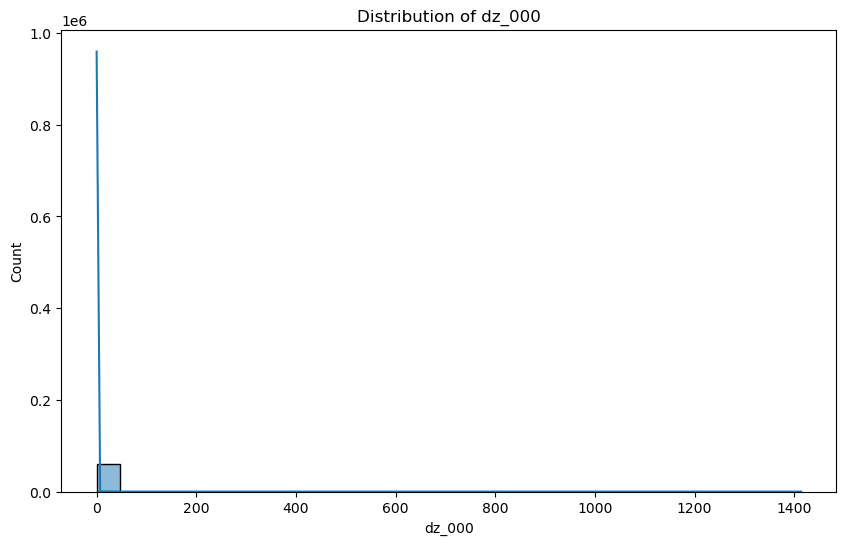

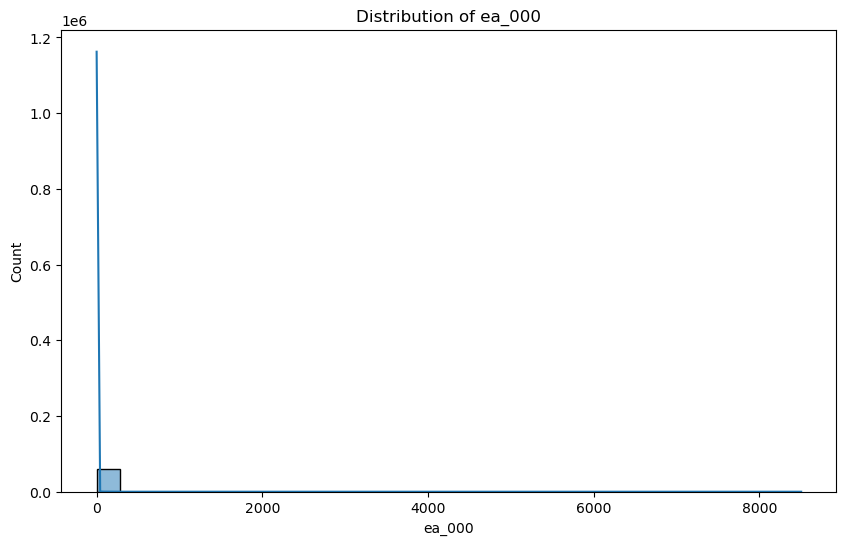

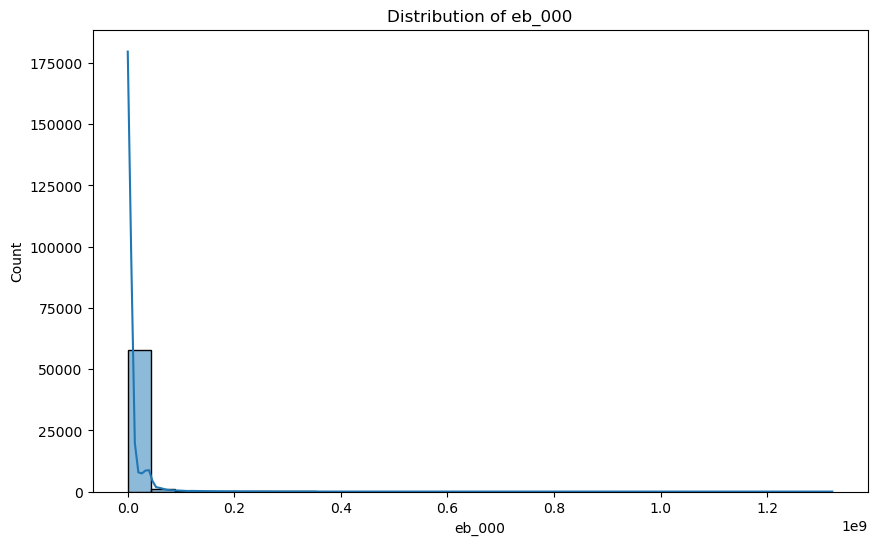

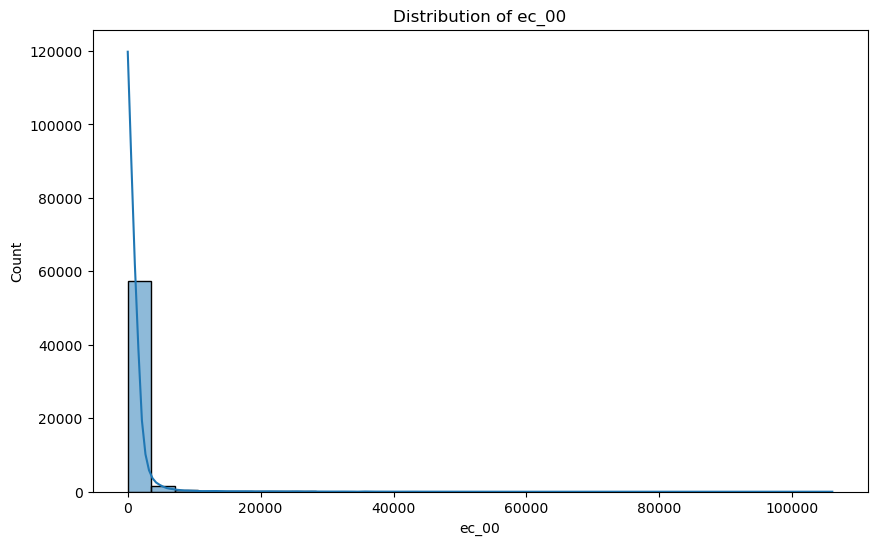

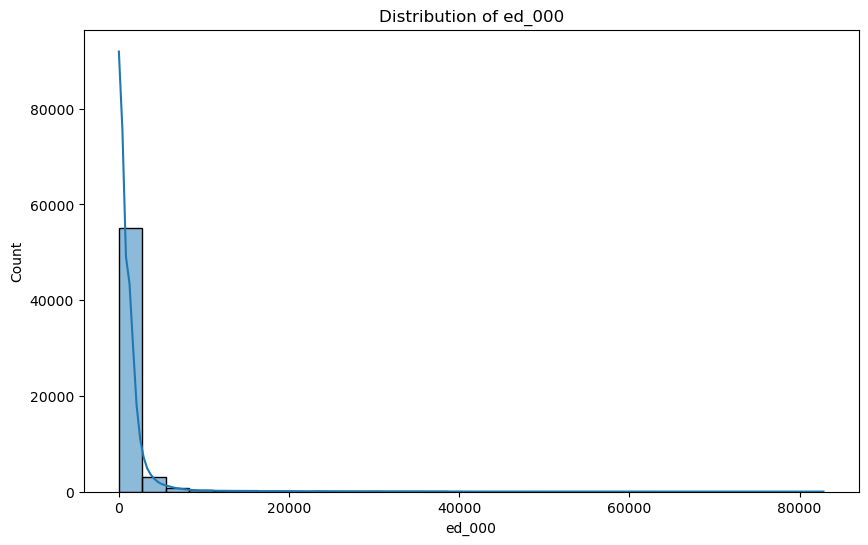

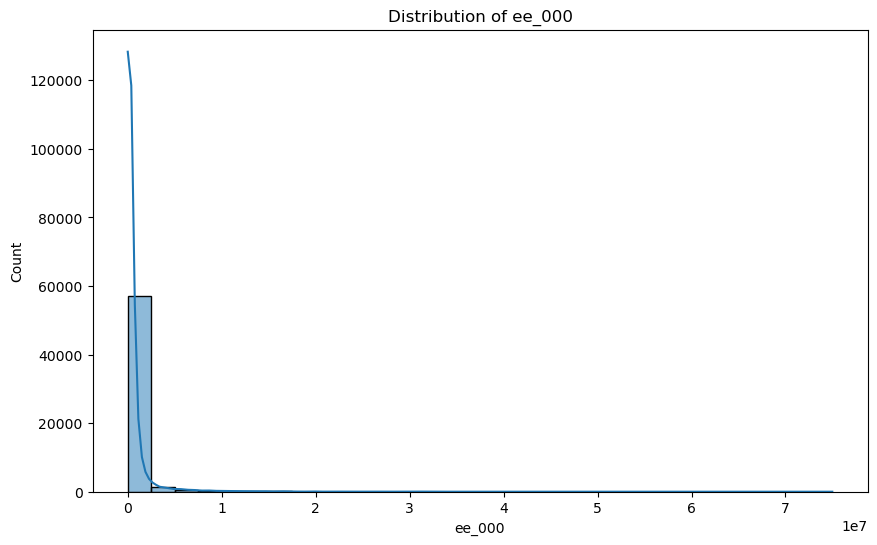

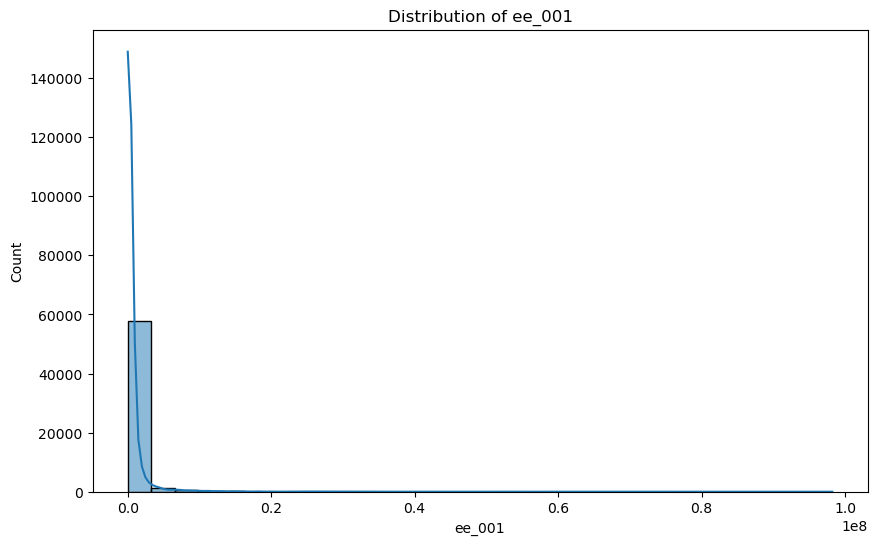

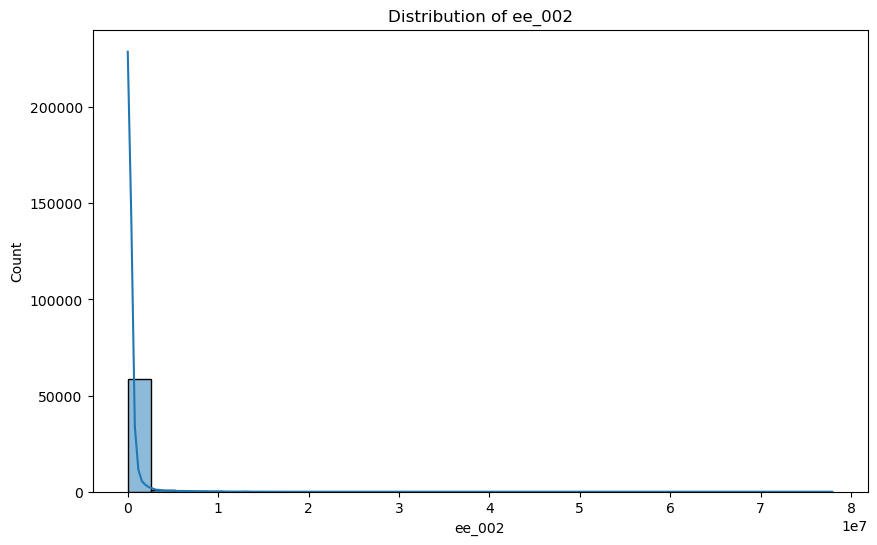

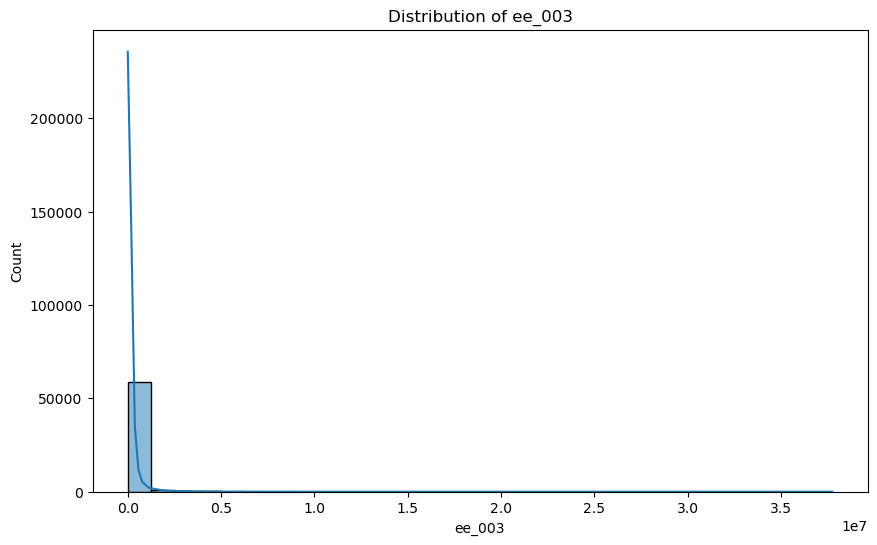

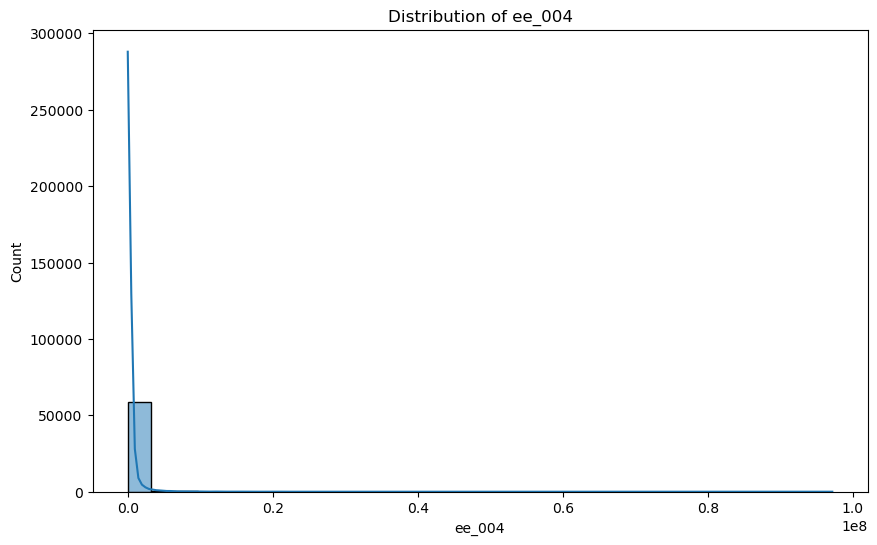

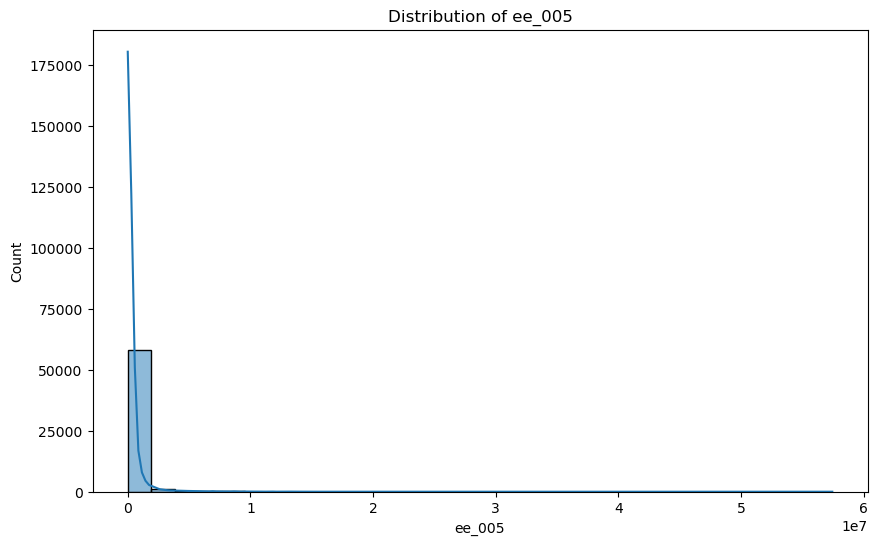

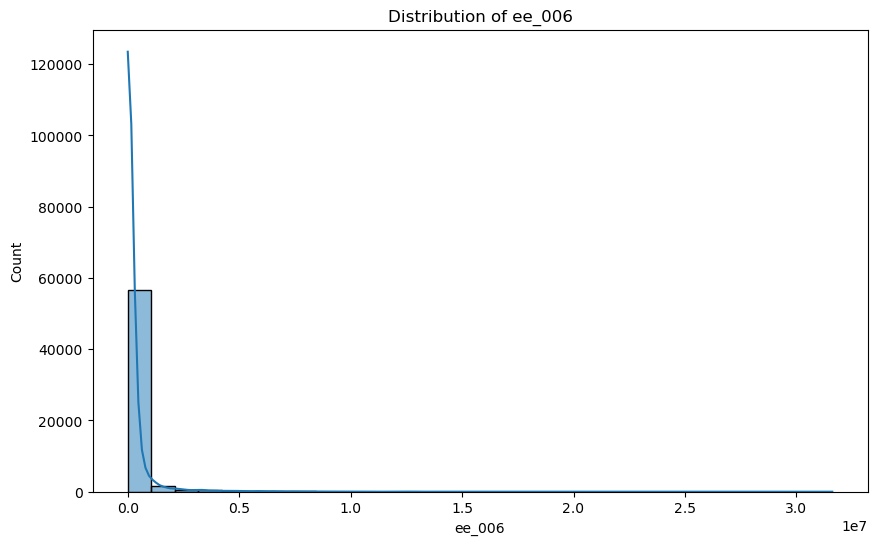

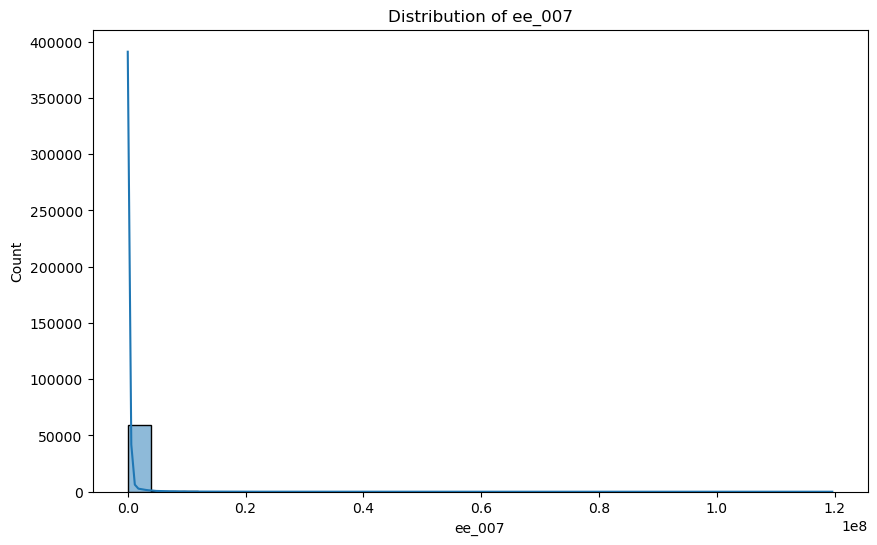

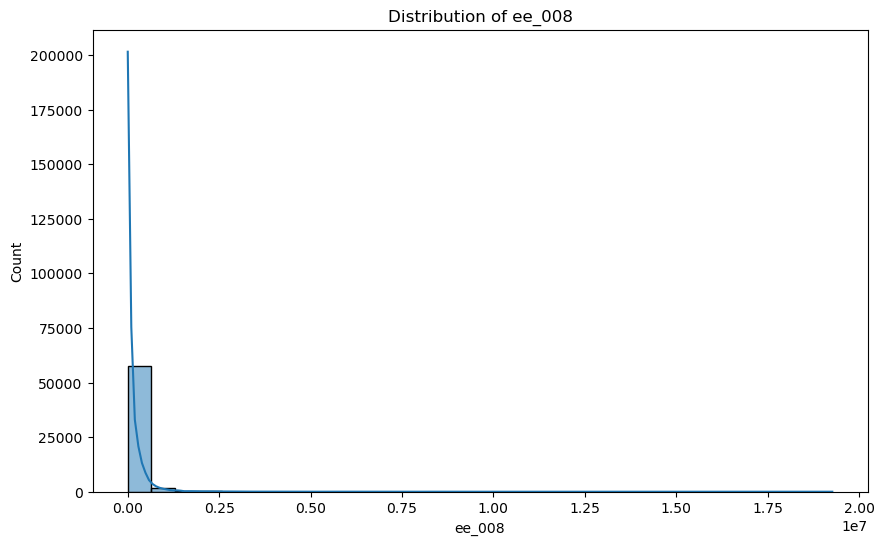

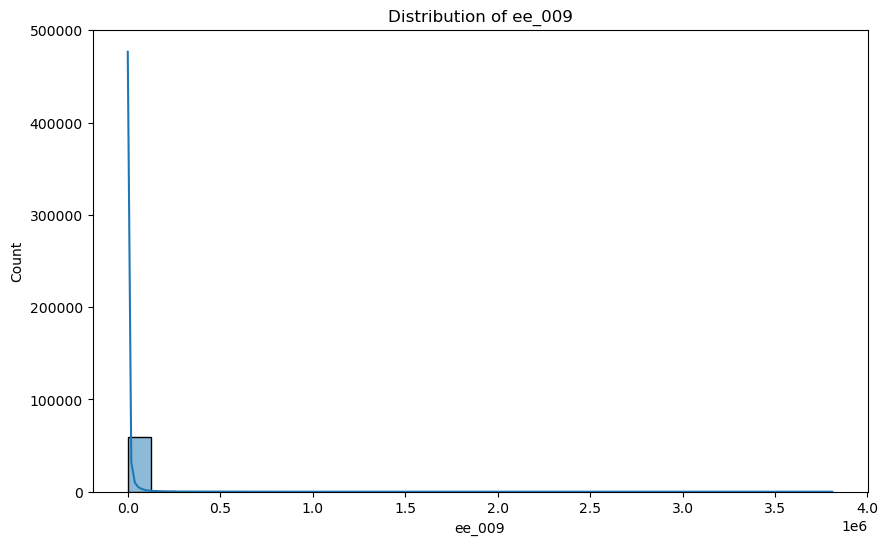

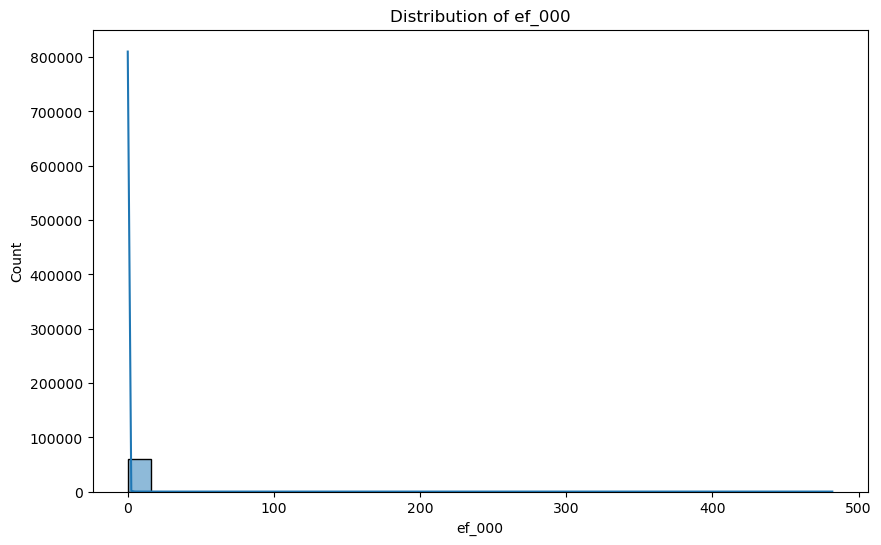

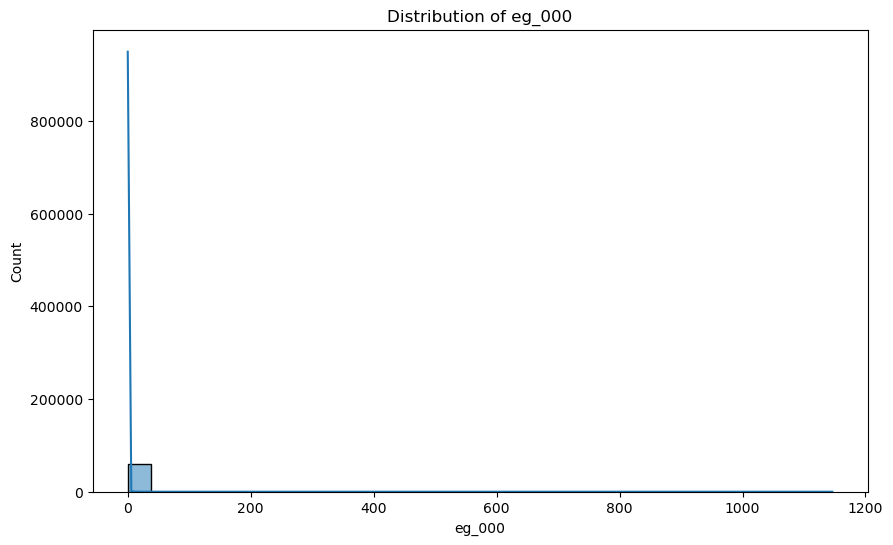

In [18]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Displaying the variance in a chart:

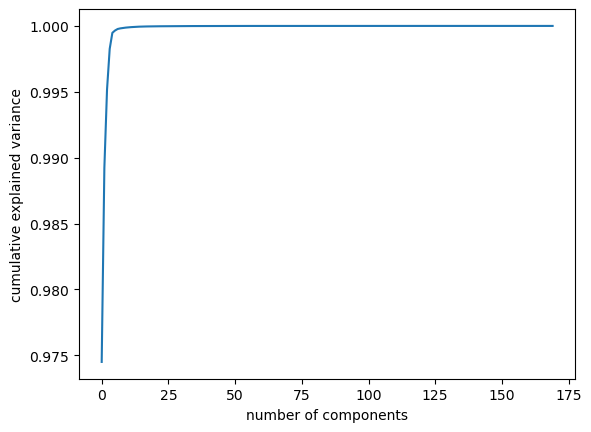

In [19]:
aps_no_label = df.drop(columns=["class"])
pca = PCA().fit(aps_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');  

### Step 3 - Implementing the PCA to Establish Minimum Number of Features

In [20]:
pca = PCA(10)
projected = pca.fit_transform(aps_no_label)

In [21]:
projected.shape

(60000, 10)

Note that: After apply PCA, the columns are reduced from 171 to 10

In [22]:
newaps_df= pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'])

Above I rename all the old columns in the dataset

In [23]:
newaps_df.head()

C1            C2             C3            C4            C5  \
0  1.794496e+09  3.211523e+05  -13914.100755  3.221798e+06  1.246086e+07   
1 -3.361937e+08 -5.375804e+06 -284084.983413 -6.810371e+06 -1.193847e+05   
2 -3.361927e+08 -5.608250e+06 -277150.003557 -1.020018e+07 -1.375904e+06   
3 -3.361710e+08 -6.252036e+06 -263685.285444 -1.471480e+07 -8.833286e+06   
4 -3.362444e+08 -4.891118e+06 -310272.149219  1.014545e+07 -5.099864e+06   

             C6            C7            C8            C9           C10  
0  5.302119e+06 -3.443515e+05  9.257056e+04 -1.213335e+06  2.904779e+06  
1  2.457512e+06 -2.267203e+05 -1.313286e+06  1.005464e+06 -8.059593e+05  
2 -1.456393e+06  8.431763e+05  1.618961e+05 -1.477105e+06  6.712679e+05  
3 -7.683078e+05  2.695536e+05 -2.691088e+05  5.879196e+05 -1.123004e+06  
4 -2.738365e+06  1.926148e+06  7.931166e+05 -6.081122e+04  1.631404e+06

In [24]:
newaps_df["class"] = df["class"]

Using the new old colum renamed to a new one - See the last column below in the right side.

In [25]:
newaps_df.head()

C1            C2             C3            C4            C5  \
0  1.794496e+09  3.211523e+05  -13914.100755  3.221798e+06  1.246086e+07   
1 -3.361937e+08 -5.375804e+06 -284084.983413 -6.810371e+06 -1.193847e+05   
2 -3.361927e+08 -5.608250e+06 -277150.003557 -1.020018e+07 -1.375904e+06   
3 -3.361710e+08 -6.252036e+06 -263685.285444 -1.471480e+07 -8.833286e+06   
4 -3.362444e+08 -4.891118e+06 -310272.149219  1.014545e+07 -5.099864e+06   

             C6            C7            C8            C9           C10 class  
0  5.302119e+06 -3.443515e+05  9.257056e+04 -1.213335e+06  2.904779e+06   neg  
1  2.457512e+06 -2.267203e+05 -1.313286e+06  1.005464e+06 -8.059593e+05   neg  
2 -1.456393e+06  8.431763e+05  1.618961e+05 -1.477105e+06  6.712679e+05   neg  
3 -7.683078e+05  2.695536e+05 -2.691088e+05  5.879196e+05 -1.123004e+06   neg  
4 -2.738365e+06  1.926148e+06  7.931166e+05 -6.081122e+04  1.631404e+06   neg

In [26]:
df_array= newaps_df.values

Array is used to renew all values

### Step 4 - Training and Testing the model

In [27]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score      
from sklearn.svm import SVC

In [28]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [29]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:10]
y = df_array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=84)

My test size is 20% of the dataset and my training size is 80%, random_state is 84 (I choose it randmoly, if you want the same result, you have to use the same number)

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.876521 (0.035545)
LDA: 0.980812 (0.001997)
KNN: 0.985083 (0.000717)
CART: 0.983479 (0.001619)
NB: 0.957188 (0.004608)


This is important to understand which model is more accuraccy and decide which one I will use next in my analysis.
Also the accuracy i all models is more than 95%, except of Logistic Regression

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Displayng the results

In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Applying the Confusion Matrix to see the true, false, true, false-true and false-false.

In [ ]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

###  Explanation - Curse of Dimensionality
The Curse of Dimensionality refers to the problems and challenges that arise when dealing with a high volume of data. As the number of data features and/or dimensions increases, the amount of work and processing required to support the analysis grows exponentially. This cost makes analyses and interpretations much more complex and demands greater machine resources.

Among the main issues, we can mention:

Computational Complexity: As algorithms need to work exponentially harder as the number of dimensions increases.
Increased Sparsity: As dimensions increase, data points become more distant from each other, reducing data density and creating more space between them within the dimensions.

Overfitting: The risk of a model capturing random noise as meaningful patterns, particularly when the number of features approaches or exceeds the number of observations.

Human Intuition: As the number of dimensions grows, the interpretation of variables becomes challenging and less effective for human understanding.